# **Install and Import**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 32.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [ ]:
import easyocr
reader = easyocr.Reader(['th','en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
!pip install python-Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 92.6 MB/s eta 0:00:00


In [ ]:
#---import---
import requests
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from io import BytesIO
import os
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow
import openpyxl
import pandas as pd
import re
import Levenshtein
import pickle

In [ ]:
# template
# image id card
id_card_path = "/content/drive/MyDrive/Project/template/Default_Id_Card.jpg"

# Open the local image file directly
id_card = Image.open(id_card_path)
id_card.save("Default_Id_Card.jpg")

# **Alignment Image**

FLANN

In [ ]:
import cv2
import numpy as np

def align_images(image_path1, image_path2, output_path):
    img1 = cv2.imread(image_path1, cv2.IMREAD_COLOR)
    img2 = cv2.imread(image_path2, cv2.IMREAD_COLOR)


    sift = cv2.SIFT_create()
    keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < 0.5 * n.distance:
            good_matches.append(m)

    src_points = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_points = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    transformation_matrix, _ = cv2.estimateAffinePartial2D(src_points, dst_points)

    transformation_matrix = np.vstack([transformation_matrix, [0, 0, 1]])

    # transformation_matrix, mask = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 6.0)
    #  transformation_matrix = np.delete(transformation_matrix, 2, axis=0)

    # aligned_image = cv2.warpAffine(img1, transformation_matrix, (img2.shape[1], img2.shape[0]))
    aligned_image = cv2.warpPerspective(img1, transformation_matrix, (img2.shape[1], img2.shape[0]))

    cv2.imwrite(output_path + '.jpg', aligned_image)


# directory_path = '/content/drive/MyDrive/Project/Dataset/Scenerio_0'
# output_directory = '/content/Scenerio11/'

# if not os.path.exists(output_directory):
#     os.makedirs(output_directory)

# # ดึงรายการของไฟล์ทั้งหมดในโฟลเดอร์ directory_path
# file_list = os.listdir(directory_path)

# for file_name in file_list:
#     if file_name.endswith('.jpg') or file_name.endswith('.png'):
#         image_path1 = os.path.join(directory_path, file_name)
#         image_path2 = "Default_Id_Card.jpg"

#         # สร้างชื่อไฟล์เอาไว้สำหรับบันทึกรูปภาพที่ปรับแต่ง
#         output_path = os.path.join(output_directory, f"aligned_{file_name}")

#         # เรียกใช้ฟังก์ชัน align_images เพื่อปรับแต่งรูปภาพ
#         align_images(image_path1, image_path2, output_path)

# print("การปรับแต่งรูปภาพเสร็จสิ้น")


# directory_path = '/content/drive/MyDrive/Project/Dataset'
directory_path = '/content/drive/MyDrive/Project/DatasetV2'
output_root_directory = '/content/'

# ลิสต์ของโฟลเดอร์ Scenerio0 - Scenerio6
# scenarios = ['Scenerio_0', 'Scenerio_1', 'Scenerio_2', 'Scenerio_3', 'Scenerio_4', 'Scenerio_5', 'Scenerio_6']
scenarios = ['Scenerio_1', 'Scenerio_2', 'Scenerio_3', 'Scenerio_4', 'Scenerio_5', 'Scenerio_6']

for scenario in scenarios:
    # สร้างโฟลเดอร์ Scenario ถ้ายังไม่มี
    output_directory = os.path.join(output_root_directory, scenario)
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # ดึงรายการของไฟล์ทั้งหมดในโฟลเดอร์ของแต่ละ Scenario
    scenario_path = os.path.join(directory_path, scenario)
    file_list = os.listdir(scenario_path)

    for file_name in file_list:
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            # ใช้ os.path.splitext() เพื่อแยกชื่อไฟล์และนามสกุลไฟล์
            file_name_without_extension, _ = os.path.splitext(file_name)
            image_path1 = os.path.join(scenario_path, file_name)
            image_path2 = "Default_Id_Card.jpg"

            # สร้างชื่อไฟล์เอาไว้สำหรับบันทึกรูปภาพที่ปรับแต่ง
            output_path = os.path.join(output_directory, file_name_without_extension)

            # เรียกใช้ฟังก์ชัน align_images เพื่อปรับแต่งรูปภาพ
            align_images(image_path1, image_path2, output_path)


print("การปรับแต่งรูปภาพเสร็จสิ้น")

การปรับแต่งรูปภาพเสร็จสิ้น


BFMatcher

In [ ]:
# import cv2
# import numpy as np

# def align_images(image_path1, image_path2, output_path):
#     img1 = cv2.imread(image_path1, cv2.IMREAD_COLOR)
#     img2 = cv2.imread(image_path2, cv2.IMREAD_COLOR)

#     sift = cv2.SIFT_create()
#     keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
#     keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

#     bf = cv2.BFMatcher()
#     matches = bf.knnMatch(descriptors1, descriptors2, k=2)

#     good_matches = []
#     for m, n in matches:
#         if m.distance < 0.5 * n.distance:
#             good_matches.append(m)

#     src_points = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
#     dst_points = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

#     # transformation_matrix, _ = cv2.estimateAffinePartial2D(src_points, dst_points)

#     # transformation_matrix = np.vstack([transformation_matrix, [0, 0, 1]])

#     transformation_matrix, mask = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 6.0)
#     transformation_matrix = np.delete(transformation_matrix, 2, axis=0)


#     aligned_image = cv2.warpAffine(img1, transformation_matrix, (img2.shape[1], img2.shape[0]))
#     # aligned_image = cv2.warpPerspective(img1, transformation_matrix, (img2.shape[1], img2.shape[0]))

#     cv2.imwrite(output_path + '.jpg', aligned_image)


# directory_path = '/content/drive/MyDrive/Project/DatasetV2'
# output_root_directory = '/content/'

# scenarios = ['Scenerio_1', 'Scenerio_2', 'Scenerio_3', 'Scenerio_4', 'Scenerio_5', 'Scenerio_6']

# for scenario in scenarios:
#     output_directory = os.path.join(output_root_directory, scenario)
#     if not os.path.exists(output_directory):
#         os.makedirs(output_directory)

#     scenario_path = os.path.join(directory_path, scenario)
#     file_list = os.listdir(scenario_path)

#     for file_name in file_list:
#         if file_name.endswith('.jpg') or file_name.endswith('.png'):
#             file_name_without_extension, _ = os.path.splitext(file_name)
#             image_path1 = os.path.join(scenario_path, file_name)
#             image_path2 = "Default_Id_Card.jpg"

#             output_path = os.path.join(output_directory, file_name_without_extension)

#             align_images(image_path1, image_path2, output_path)

# print("Image alignment completed.")

In [ ]:
# Create a dictionary to store all scenario dictionaries
# Scenerio0_dict = {}
Scenerio1_dict = {}
Scenerio2_dict = {}
Scenerio3_dict = {}
Scenerio4_dict = {}
Scenerio5_dict = {}
Scenerio6_dict = {}

# Loop through scenarios from Scenerio_0 to Scenerio_6
for scenario_num in range(1, 7):
    folder_path = f'/content/Scenerio_{scenario_num}'

    # Create a dictionary for the current scenario
    current_scenario_dict = {}

    # List all files in the folder with either .jpg or .png extensions
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png'))]

    # Loop through the image files for the current scenario
    for image_file in image_files:
        key = image_file
        file_path = os.path.join(folder_path, image_file)
        filename = Image.open(file_path)
        current_scenario_dict[key] = filename

    # Store the current scenario dictionary in the container
    globals()[f'Scenerio{scenario_num}_dict'] = current_scenario_dict
    with open(f'Scenerio{scenario_num}_dict.pickle', 'wb') as pickle_file:
        pickle.dump(current_scenario_dict, pickle_file)
    # files.download(f'Scenerio{scenario_num}_dict.pickle')

In [ ]:
Scenerio1_dict

{'scenerio1_95_พริมา.jpg': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=738x468>,
 'scenerio1_56_ธิดา.jpg': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=738x468>,
 'scenerio1_38_ญาดา.jpg': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=738x468>,
 'scenerio1_08_กาญจนี.jpg': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=738x468>,
 'scenerio1_27_จิราพร.jpg': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=738x468>,
 'scenerio1_33_ชมนาด.jpg': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=738x468>,
 'scenerio1_11_ กิรณา.jpg': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=738x468>,
 'scenerio1_31_ชนินี.jpg': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=738x468>,
 'scenerio1_65_นิชาภรณ์.jpg': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=738x468>,
 'scenerio1_42_ดรัลพร.jpg': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=738x468>,
 'scenerio1_81_ปวัญญา.jpg': <PIL.JpegImagePlugin.JpegImageFile image mode=R

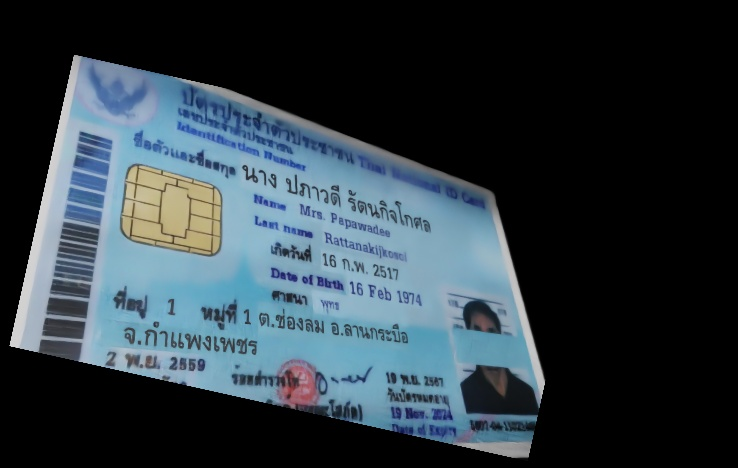

In [ ]:
Scenerio6_dict['Scenerio6_77_ปภาวดี.jpg']

# **EASYOCR**

In [ ]:
Ocr_Scenerio = {}
# Ocr_Scenerio0 = {}
Ocr_Scenerio1 = {}
Ocr_Scenerio2 = {}
Ocr_Scenerio3 = {}
Ocr_Scenerio4 = {}
Ocr_Scenerio5 = {}
Ocr_Scenerio6 = {}

In [ ]:
Coordinates_Scenerio = {}
# Coordinates_Scenerio0 = {}
Coordinates_Scenerio1 = {}
Coordinates_Scenerio2 = {}
Coordinates_Scenerio3 = {}
Coordinates_Scenerio4 = {}
Coordinates_Scenerio5 = {}
Coordinates_Scenerio6 = {}

In [ ]:
scenario_dicts = [Scenerio1_dict, Scenerio2_dict, Scenerio3_dict, Scenerio4_dict, Scenerio5_dict, Scenerio6_dict]

# สร้างลูปสำหรับแต่ละโครงกระดูก
for i, scenario_dict in enumerate(scenario_dicts):
    Ocr_Result = {}  # สร้างพจนานุกรมสำหรับเก็บข้อมูล OCR ของแต่ละโครงกระดูก
    Coordinates_Only = {}  # สร้างพจนานุกรมสำหรับเก็บข้อมูล Coordinates ของแต่ละโครงกระดูก

    for image_key, image_path in scenario_dict.items():
        bounds = reader.readtext(image_path)
        Ocr_Result[image_key] = bounds
        Coordinates_Only[image_key] = [bound[0] for bound in bounds]
        print(image_key)
    # ทำการเก็บข้อมูลลงในตัวแปรที่เกี่ยวข้อง (Ocr_Scenerio0 - Ocr_Scenerio6 และ Coordinates_Scenerio0 - Coordinates_Scenerio6)
    globals()[f'Ocr_Scenerio{i+1}'] = Ocr_Result
    globals()[f'Coordinates_Scenerio{i+1}'] = Coordinates_Only

    with open(f'Ocr_Scenerio{i+1}.pickle', 'wb') as ocr_pickle_file:
         pickle.dump(Ocr_Result, ocr_pickle_file)

    with open(f'Coordinates_Scenerio{i+1}.pickle', 'wb') as coordinates_pickle_file:
         pickle.dump(Coordinates_Only, coordinates_pickle_file)


scenerio1_95_พริมา.jpg
scenerio1_56_ธิดา.jpg
scenerio1_38_ญาดา.jpg
scenerio1_08_กาญจนี.jpg
scenerio1_27_จิราพร.jpg
scenerio1_33_ชมนาด.jpg
scenerio1_11_ กิรณา.jpg
scenerio1_31_ชนินี.jpg
scenerio1_65_นิชาภรณ์.jpg
scenerio1_42_ดรัลพร.jpg
scenerio1_81_ปวัญญา.jpg
scenerio1_10_ กิตติพร.jpg
scenerio1_43_ดลวา.jpg
scenerio1_58_ นวตา.jpg
scenerio1_22_จรรยา.jpg
scenerio1_60_นวรัตน์.jpg
scenerio1_26_จารวี.jpg
scenerio1_21_จรรยพร.jpg
scenerio1_66_นิตย์รดี.jpg
scenerio1_04_กรกฏ.jpg
scenerio1_46_เทวิกา.jpg
scenerio1_15_ขยานี.jpg
scenerio1_24_จันทรวิภา.jpg
scenerio1_12_ กุลนิดา.jpg
scenerio1_89_ปาริยา.jpg
scenerio1_36_ชามา.jpg
scenerio1_74_ปฐมพร.jpg
scenerio1_29_ชญานี.jpg
scenerio1_97_พัทธมน.jpg
scenerio1_09_กิตติญา.jpg
scenerio1_69_นิษฐา.jpg
scenerio1_25_จันทราภา.jpg
scenerio1_20_ครองขวัญ.jpg
scenerio1_63_นันท์นพิน.jpg
scenerio1_01_กนกจันทร์.jpg
scenerio1_76_ปภาดา.jpg
scenerio1_88_ปาณิศา.jpg
scenerio1_48_ธนารีย์.jpg
scenerio1_50_ธนิสร.jpg
scenerio1_79_ ปรียาวดี.jpg
scenerio1_75_ปฐมา.jpg
scenerio1_71_

In [ ]:
Ocr_Scenerio1['scenerio1_45_ทิษยา.jpg']

[([[247, 14], [362, 14], [362, 45], [247, 45]], 'กดาบระบ', 0.7008822547115563),
 ([[424, 20], [614, 20], [614, 50], [424, 50]],
  'thal matonal',
  0.6923013718715714),
 ([[664, 26], [732, 26], [732, 50], [664, 50]], 'เ', 0.09922512992624721),
 ([[123, 38], [304, 38], [304, 64], [123, 64]],
  'มอระกายาปชะยชน',
  0.025535086566248748),
 ([[178, 64], [321, 64], [321, 85], [178, 85]],
  'haatan ฝamuar',
  0.03161398132298054),
 ([[82, 91], [486, 91], [486, 148], [82, 148]],
  'กด้วยเะาแทฺุนาย ทิษยา บุญขาว',
  0.05002042976604685),
 ([[233, 143], [283, 143], [283, 161], [233, 161]],
  'hue',
  0.03538250390460114),
 ([[300, 136], [415, 136], [415, 167], [300, 167]],
  'mr., tisaya',
  0.3583136894524807),
 ([[231, 175], [323, 175], [323, 195], [231, 195]],
  'lan nnm',
  0.10511254432041651),
 ([[335, 173], [446, 173], [446, 202], [335, 202]],
  ' boonkaow',
  0.9631265946534537),
 ([[249, 201], [477, 201], [477, 239], [249, 239]],
  'มากันที่   28 พ.ค. 2482',
  0.11808250413345607),
 ([[2

In [ ]:
Coordinates_Scenerio3['scenerio3_01_กนกจันทร์.jpg']

[[[661, 24], [730, 24], [730, 52], [661, 52]],
 [[210, 96], [622, 96], [622, 144], [210, 144]],
 [[228, 139], [282, 139], [282, 163], [228, 163]],
 [[296, 137], [450, 137], [450, 167], [296, 167]],
 [[233, 177], [319, 177], [319, 193], [233, 193]],
 [[332, 171], [438, 171], [438, 204], [332, 204]],
 [[249, 197], [321, 197], [321, 233], [249, 233]],
 [[328, 208], [456, 208], [456, 238], [328, 238]],
 [[248, 240], [488, 240], [488, 272], [248, 272]],
 [[249, 271], [303, 271], [303, 291], [249, 291]],
 [[321, 277], [353, 277], [353, 291], [321, 291]],
 [[69, 289], [113, 289], [113, 327], [69, 327]],
 [[158, 292], [442, 292], [442, 340], [158, 340]],
 [[82, 328], [154, 328], [154, 354], [82, 354]],
 [[84, 354], [172, 354], [172, 378], [84, 378]],
 [[194, 364], [262, 364], [262, 390], [194, 390]],
 [[411, 365], [471, 365], [471, 383], [411, 383]],
 [[477, 369], [509, 369], [509, 385], [477, 385]],
 [[68, 374], [152, 374], [152, 398], [68, 398]],
 [[441, 393], [505, 393], [505, 407], [441, 4

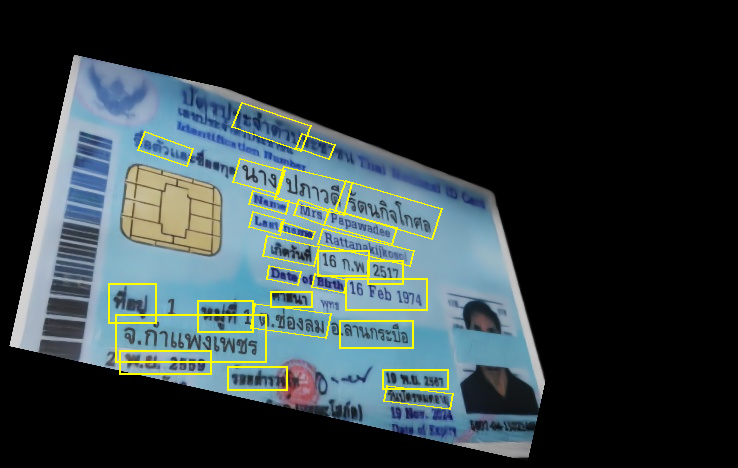

In [ ]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

result = draw_boxes(Scenerio6_dict['Scenerio6_77_ปภาวดี.jpg'], Ocr_Scenerio6['Scenerio6_77_ปภาวดี.jpg'])
result.save("bounding_box.jpg")
result

# **Pickle**

In [ ]:
import pickle

for i in range(1,7):
    # Load Ocr_Result for a specific scenario
    with open(f'/content/drive/MyDrive/Project/DatasetV2/Ocr_Scenerio{i}.pickle', 'rb') as ocr_pickle_file:
        globals()[f'Ocr_Scenerio{i}'] = pickle.load(ocr_pickle_file)

    # Load Coordinates_Only for a specific scenario
    with open(f'/content/drive/MyDrive/Project/DatasetV2/Coordinates_Scenerio{i}.pickle', 'rb') as coordinates_pickle_file:
        globals()[f'Coordinates_Scenerio{i}'] = pickle.load(coordinates_pickle_file)

    with open(f'/content/drive/MyDrive/Project/DatasetV2/Scenerio{i}_dict.pickle', 'rb') as Scenerio_dict:
        globals()[f'Scenerio{i}_dict'] = pickle.load(Scenerio_dict)

# **Tagging bounding box(Overlap area)**

In [ ]:
import openpyxl
import pandas as pd
from google.colab import files


# Create a new Excel workbook and add a worksheet
workbook = openpyxl.Workbook()
worksheet = workbook.active

# Add headers to the Excel worksheet
worksheet['A1'] = "Scenerio"
worksheet['B1'] = "Image"
worksheet['C1'] = "Name"
worksheet['D1'] = "Surname"
worksheet['E1'] = "Name_ENG"
worksheet['F1'] = "Surname_ENG"
worksheet['G1'] = "Birthday"
worksheet['H1'] = "Birthday_ENG"
worksheet['I1'] = "Address1"
# worksheet['J1'] = "Address2"
# Initialize the row number to start writing data
row_num = 2
results = []
def calculate_overlap_area(box1, box2):
    x1_1, y1_1 = box1[0]
    x2_1, y2_1 = box1[2]
    x1_2, y1_2 = box2[0]
    x2_2, y2_2 = box2[2]

    area_box1 = (x2_1 - x1_1) * (y2_1 - y1_1)

    x_overlap = max(0, min(x2_1, x2_2) - max(x1_1, x1_2))
    y_overlap = max(0, min(y2_1, y2_2) - max(y1_1, y1_2))

    overlap_area = x_overlap * y_overlap

    if area_box1 != 0:
        overlap_percentage = (overlap_area / area_box1) * 100
    else:
        overlap_percentage = 0

    return overlap_percentage

# พิกัดที่ได้จากการ OCR
for scenario_num in range(1,7):  # Assuming you have scenarios from 1 to 6
    Coordinates = globals()["Coordinates_Scenerio" + str(scenario_num)]  # Access Coordinates_Scenerio0, Coordinates_Scenerio1, etc.

    # Your existing code here, but replace all occurrences of "Coordinates_Scenerio0" with "Coordinates"
    for img_key in Coordinates:
        ocr_bbox = Coordinates[img_key]

        # พิกัดของ bounding box ที่กำหนด
                              #topleft    topright  bottomright  bottomleft
        defined_name_bbox = [[77, 94], [670, 94], [670, 144], [77, 144]]
        defined_surname_bbox = [[77, 94], [670, 94], [670, 144], [77, 144]]
        defined_name_eng_bbox = [[294, 132], [558, 132], [558, 162], [294, 162]]
        defined_surname_eng_bbox =[[330, 166], [558, 166], [558, 196], [330, 196]]
        defined_birth_date_bbox =  [[220, 202], [558, 202], [558, 230], [220, 230]]
        defined_birth_date_eng_bbox =  [[220, 235], [558, 235], [558, 268], [220, 267]]
        defined_address1_bbox = [[120, 295], [540, 295], [540, 325], [120, 325]]
        defined_address2_bbox = [[77, 331], [540, 330], [540, 362], [80, 357]]

        # กำหนดเกณฑ์ของพื้นที่ทับซ้อนที่ต้องการ
        name_overlap_threshold = 50
        surname_overlap_threshold = 50
        name_eng_overlap_threshold = 50
        surname_eng_overlap_threshold = 50
        birth_date_overlap_threshold = 50
        birth_date_eng_overlap_threshold = 50
        address1_overlap_threshold = 50
        address2_overlap_threshold = 50

        max_name_overlap_area = 0
        max_name_overlap_index = None
        name_values = []
        name_texts = []

        max_surname_overlap_area = 0
        max_surname_overlap_index = None
        surname_values = []
        surname_texts = []

        max_name_eng_overlap_area = 0
        max_name_eng_overlap_index = None
        nameeng_values = []
        nameeng_texts = []

        max_surname_eng_overlap_area = 0
        max_surname_eng_overlap_index = None
        surnameeng_values = []
        surnameeng_texts = []

        max_birth_date_overlap_area = 0
        max_birth_date_overlap_index = None
        birthday_values = []
        birthday_texts = []

        max_birth_date_eng_overlap_area = 0
        max_birth_date_eng_overlap_index = None
        birthdayeng_values = []
        birthdayeng_texts = []

        max_address1_overlap_area = 0
        max_address1_overlap_index = None
        address1_values = []
        address1_texts= []

        max_address2_overlap_area = 0
        max_address2_overlap_index = None
        address2_values = []
        address2_texts= []

        OCR_Result = globals()["Ocr_Scenerio" + str(scenario_num)]

        for i, ocr_box in enumerate(ocr_bbox):
            name_overlap_area = calculate_overlap_area(ocr_box, defined_name_bbox)
            surname_overlap_area = calculate_overlap_area(ocr_box, defined_surname_bbox)
            name_eng_overlap_area =calculate_overlap_area(ocr_box, defined_name_eng_bbox)
            surname_eng_overlap_area = calculate_overlap_area(ocr_box, defined_surname_eng_bbox)
            birth_date_overlap_area = calculate_overlap_area(ocr_box, defined_birth_date_bbox)
            birth_date_eng_overlap_area = calculate_overlap_area(ocr_box, defined_birth_date_eng_bbox)
            address1_overlap_area = calculate_overlap_area(ocr_box, defined_address1_bbox)
            address2_overlap_area = calculate_overlap_area(ocr_box, defined_address2_bbox)
            if name_overlap_area > name_overlap_threshold:
                max_name_overlap_area = name_overlap_area
                max_name_overlap_index = i
                name_values.append(OCR_Result[img_key][i][0][1][0])
                name_texts.append(OCR_Result[img_key][i][1])

            if surname_overlap_area > surname_overlap_threshold:
                max_surname_overlap_area = surname_overlap_area
                max_surname_overlap_index = i
                surname_values.append(OCR_Result[img_key][i][0][1][0])
                surname_texts.append(OCR_Result[img_key][i][1])

            if name_eng_overlap_area > name_eng_overlap_threshold:
                max_name_eng_overlap_area = name_eng_overlap_area
                max_name_eng_overlap_index = i
                nameeng_values.append(OCR_Result[img_key][i][0][1][0])
                nameeng_texts.append(OCR_Result[img_key][i][1])

            if surname_eng_overlap_area > surname_eng_overlap_threshold:
                max_surname_eng_overlap_area = surname_eng_overlap_area
                max_surname_eng_overlap_index = i
                surnameeng_values.append(OCR_Result[img_key][i][0][1][0])
                surnameeng_texts.append(OCR_Result[img_key][i][1])

            if birth_date_overlap_area > birth_date_overlap_threshold:
                max_birth_date_overlap_area = birth_date_overlap_area
                max_birth_date_overlap_index = i
                birthday_values.append(OCR_Result[img_key][i][0][1][0])
                birthday_texts.append(OCR_Result[img_key][i][1])

            if birth_date_eng_overlap_area > birth_date_eng_overlap_threshold:
                max_birth_date_eng_overlap_area = birth_date_eng_overlap_area
                max_birth_date_eng_overlap_index = i
                birthdayeng_values.append(OCR_Result[img_key][i][0][1][0])
                birthdayeng_texts.append(OCR_Result[img_key][i][1])

            if address1_overlap_area > address1_overlap_threshold:
               max_address1_overlap_area = address1_overlap_area
               max_address1_overlap_index = i
               address1_values.append(OCR_Result[img_key][i][0][1][0])
               address1_texts.append(OCR_Result[img_key][i][1])

            if address2_overlap_area > address2_overlap_threshold:
                max_address2_overlap_area = address2_overlap_area
                max_address2_overlap_index = i
                address2_values.append(OCR_Result[img_key][i][0][1][0])
                address2_texts.append(OCR_Result[img_key][i][1])

        worksheet[f'A{row_num}'] = "Scenerio_" + str(scenario_num)
        #Name
        if name_values:
           sorted_name_texts = [text for _, text in sorted(zip(name_values, name_texts))]
           name = ' '.join(sorted_name_texts)
           worksheet[f'B{row_num}'] = img_key
           worksheet[f'C{row_num}'] = name
        else:
           worksheet[f'B{row_num}'] = img_key
           worksheet[f'C{row_num}'] = ""
        #Surname
        if surname_values:
           sorted_surname_texts = [text for _, text in sorted(zip(surname_values, surname_texts))]
           surname = ' '.join(sorted_surname_texts)
           worksheet[f'D{row_num}'] = surname
        else:
           worksheet[f'D{row_num}'] = ""
        #NameEng
        if nameeng_values:
           sorted_nameeng_texts = [text for _, text in sorted(zip(nameeng_values, nameeng_texts))]
           nameeng = ' '.join(sorted_nameeng_texts)
           worksheet[f'E{row_num}'] = nameeng
        else:
           worksheet[f'E{row_num}'] = ""
        #SurnameEng
        if surnameeng_values:
           sorted_surnameeng_texts = [text for _, text in sorted(zip(surnameeng_values, surnameeng_texts))]
           surnameeng = ' '.join(sorted_surnameeng_texts)
           worksheet[f'F{row_num}'] = surnameeng
        else:
           worksheet[f'F{row_num}'] = ""
        #Birthday
        if birthday_values:
           sorted_birthday_texts = [text for _, text in sorted(zip(birthday_values, birthday_texts))]
           birthday = ' '.join(sorted_birthday_texts)
           worksheet[f'G{row_num}'] = birthday
        else:
           worksheet[f'G{row_num}'] = ""
        #BirthdayEng
        if birthdayeng_values:
           sorted_birthdayeng_texts = [text for _, text in sorted(zip(birthdayeng_values, birthdayeng_texts))]
           birthdayeng = ' '.join(sorted_birthdayeng_texts)
           worksheet[f'H{row_num}'] = birthdayeng
        else:
           worksheet[f'H{row_num}'] = ""
        #Address1
        if address1_values:
           sorted_address1_texts = [text for _, text in sorted(zip(address1_values, address1_texts))]
           address1 = ' '.join(sorted_address1_texts)
        else:
           address1 = ""
        #Address2
        if address2_values:
           sorted_address2_texts = [text for _, text in sorted(zip(address2_values, address2_texts))]
           address2 = ' '.join(sorted_address2_texts)
        else:
           address2 = ""

        full_address = address1 + ' ' + address2
        worksheet[f'I{row_num}'] = full_address

        row_num += 1
    workbook.save("scenario" + str(scenario_num)+".xlsx")
    row_num = 2

# **Text Correction**

## Capital Letter

In [ ]:
# ลูปผ่านทุก scenario (1-6)
for scenario_number in range(1, 7):
    # ระบุที่อยู่ของไฟล์ Excel
    excel_file_path = f'scenario{scenario_number}.xlsx'  # เปลี่ยนเป็นที่อยู่จริงของไฟล์ Excel ของคุณ

    # ใช้ pandas เพื่ออ่านข้อมูลจาก Excel เข้าสู่ DataFrame
    df = pd.read_excel(excel_file_path)

    # เลือกเฉพาะคอลัมน์ที่ต้องการแก้ไข
    selected_columns = ['Name_ENG', 'Surname_ENG', 'Birthday_ENG']

    # สร้างฟังก์ชันสำหรับการแก้ไขเงื่อนไข
    def capitalize_and_handle_empty(cell_value):
        if pd.notna(cell_value):
            return ' '.join([word.capitalize() for word in str(cell_value).split()])
        return cell_value

    # นำเงื่อนไขมาใช้กับทุก cell ในคอลัมน์ที่ต้องการแก้ไข
    for column in selected_columns:
        df[column] = df[column].apply(capitalize_and_handle_empty)

    # ใช้ fillna เพื่อกำหนดค่า NaN ใน cell ที่ว่างอยู่
    df = df.fillna('')

    # บันทึก DataFrame ที่ได้ลงไฟล์ Excel เดิม
    df.to_excel(excel_file_path, index=False)

    print(f'Processed: {excel_file_path}')

Processed: scenario1.xlsx
Processed: scenario2.xlsx
Processed: scenario3.xlsx
Processed: scenario4.xlsx
Processed: scenario5.xlsx
Processed: scenario6.xlsx


## text edit distance (Before TextEditing)

In [ ]:
# ลูปเรียกใช้โค้ดสำหรับแต่ละสถานการณ์
for scenario in range(1, 7):
    file_path = f'/content/scenario{scenario}.xlsx'

    # โหลดไฟล์ Excel
    df = pd.read_excel(file_path)

    # เรียงลำดับข้อมูลตามคอลัมน์ที่ต้องการ (ในที่นี้คอลัมน์ 'Image')
    df.sort_values(by='Image', inplace=True)

    # บันทึกไฟล์ Excel หลังจากเรียงลำดับ
    df.to_excel(f'scenario{scenario}.xlsx', index=False)

In [ ]:
excel_file_path = '/content/drive/MyDrive/Project/DatasetV2/dataset.xlsx'  # เปลี่ยนเป็นที่อยู่จริงของไฟล์ Excel ของคุณ

# ใช้ pandas เพื่ออ่านข้อมูลจาก Excel เข้าสู่ DataFrame
df = pd.read_excel(excel_file_path)
print(df)

       first_name_th     last_name_th  first_name_en      last_name_en  \
0   นางสาว กนกจันทร์         กลับเพชร  Miss Kanokjan         Klabpetch   
1     นางสาว กนกวรรณ          ก้องกิจ  Miss Kanokwan           Kongkij   
2         นาย กนิษฐา   ก้องเกษมทรัพย์    Mr. Kanitta      Gongkasemsab   
3           นาย กรกฏ        กาญจนอาคม    Mr. Korakot      Kanjanaarkom   
4       นาย กรรณสิกา       กิตติภัทรา    Mr. Kansika       Kittipattra   
..               ...              ...            ...               ...   
93        นาง ฝนแก้ว      วงศ์สวัสดิ์   Mrs. Fonkaew         Wongsawad   
94      นางสาว พริมา         วัฒนโกศล    Miss Parima      Wattanakosol   
95     นาย พัชญ์ธนัน  วัฒนศักดิ์มนตรี   Mr. Pantanan  Wattanasakmontri   
96        นาย พัทธมน       วิเชียรชาญ   Mr. Pattamon       Wichienchan   
97     นาย พิชญ์สินี        วิไลรัตน์    Mr. Pitsini          Wilairat   

    birth_date_th birth_date_en religion  first_address_th  second_address_th  \
0     4 ก.ค. 2475    4 Jul 193

In [ ]:
import pandas as pd
import Levenshtein

# อ่านไฟล์ Excel 2 ไฟล์เข้ามา
file1 = pd.read_excel('scenario1.xlsx')
file2 = pd.read_excel('/content/drive/MyDrive/Project/DatasetV2/dataset.xlsx')

# สร้างฟังก์ชันคำนวณระยะทางการแก้ไขข้อความ
def text_edit_distance(s1, s2):
    return Levenshtein.distance(s1, s2)

# เลือกระว่าง Row 2 ของ Scenario1 และ Row 2 ของ Dataset
row_scenario1 = file1.iloc[1]
row_dataset = file2.iloc[1]

# คำนวณระยะทางการแก้ไขข้อความ
distance = text_edit_distance(str(row_scenario1['Birthday']), str(row_dataset['birth_date_th']))
print(str(row_scenario1['Birthday']))
print((str(row_dataset['birth_date_th'])))

# แสดงผลลัพธ์
print(f"Text Edit Distance between Row  of Scenario1 and Row 2 of Dataset: {distance}")

เทaานที่ 2 ธ.ค. 2495
2 ธ.ค. 2495
Text Edit Distance between Row  of Scenario1 and Row 2 of Dataset: 9


In [ ]:
import Levenshtein
import warnings

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def text_edit_distance(s1, s2):
    return Levenshtein.distance(s1, s2)

# Create an empty list to store the average values for each column
average_name_distances = []
average_surname_distances = []
average_nameeng_distances = []
average_surnameeng_distances = []
average_birthday_distances = []
average_birthdayeng_distances = []
# average_religion_distances = []
average_address1_distances = []
# average_address2_distances = []
average_scenario_distance = []

# Create variables to store counts of text edit distances equal to 0 for each column
count_name_0 = 0
count_surname_0 = 0
count_nameeng_0 = 0
count_surnameeng_0 = 0
count_birthday_0 = 0
count_birthdayeng_0 = 0
# count_religion_0 = 0
count_address1_0 = 0
# count_address2_0 = 0

scenario_count_name_0 = 0
scenario_count_surname_0 = 0
scenario_count_nameeng_0 = 0
scenario_count_surnameeng_0 = 0
scenario_count_birthday_0 = 0
scenario_count_birthdayeng_0 = 0
scenario_count_address1_0 = 0
# scenario_count_address2_0 = 0

# วนลูป scenario1 - scenario6
for scenario_num in range(1,7):
    # อ่านไฟล์ Excel ของ scenario และ dataset
    file1 = pd.read_excel(f'scenario{scenario_num}.xlsx')
    file2 = pd.read_excel('/content/drive/MyDrive/Project/DatasetV2/dataset.xlsx')
    #file2 = pd.read_excel('dataset.xlsx')

    # สร้าง DataFrame เพื่อเก็บระยะทางการแก้ไขข้อความ
    edit_distances = pd.DataFrame()

    # เพิ่ม Column 'Column' และ A2 เป็น "Name" และ A3 เป็น "Surname"
    edit_distances['Column'] = ['Name', 'Surname', 'NameEng', 'SurnameEng', 'Birthday', 'BirthdayEng', 'Address1']

    # วนลูปผ่านแถวตั้งแต่ Row 2 ถึง Row 99
    for index in range(0, 98):  # ให้ใช้ความยาวที่มีอยู่จริง
        # เลือกระว่าง Row ที่กำลังจะเปรียบเทียบ
        row_scenario1 = file1.iloc[index]
        row_dataset = file2.iloc[index]

        # Name
        distance_name = text_edit_distance(str(row_scenario1['Name']), str(row_dataset['first_name_th']))
        if distance_name == 0:
            count_name_0 += 1
            scenario_count_name_0 += 1

        # Surname
        distance_surname = text_edit_distance(str(row_scenario1['Surname']), str(row_dataset['last_name_th']))
        if distance_surname == 0:
            count_surname_0 += 1
            scenario_count_surname_0 += 1

        # NameEng
        distance_nameeng = text_edit_distance(str(row_scenario1['Name_ENG']), str(row_dataset['first_name_en']))
        if distance_nameeng == 0:
            count_nameeng_0 += 1
            scenario_count_nameeng_0 += 1

        # SurnameEng
        distance_surnameeng = text_edit_distance(str(row_scenario1['Surname_ENG']), str(row_dataset['last_name_en']))
        if distance_surnameeng == 0:
            count_surnameeng_0 += 1
            scenario_count_surnameeng_0 += 1

        # Birthday
        distance_birthday = text_edit_distance(str(row_scenario1['Birthday']), str(row_dataset['birth_date_th']))
        if distance_birthday == 0:
            count_birthday_0 += 1
            scenario_count_birthday_0 += 1

        # BirthdayEng
        distance_birthdayeng = text_edit_distance(str(row_scenario1['Birthday_ENG']), str(row_dataset['birth_date_en']))
        if distance_birthdayeng == 0:
            count_birthdayeng_0 += 1
            scenario_count_birthdayeng_0 += 1

        # Religion
        # distance_religion = text_edit_distance(str(row_scenario1['Religion']), str(row_dataset['religion']))
        # if distance_religion == 0:
        #     count_religion_0 += 1

        # Address1
        distance_address1 = text_edit_distance(str(row_scenario1['Address1']), str(row_dataset['third_address_th']))
        if distance_address1 == 0:
            count_address1_0 += 1
            scenario_count_address1_0 += 1

        # Address2
        # distance_address2 = text_edit_distance(str(row_scenario1['Address2']), str(row_dataset['forth_address_th']))
        # if distance_address2 == 0:
        #     count_address2_0 += 1
        #     scenario_count_address2_0 += 1

        # เพิ่มข้อมูลลงใน DataFrame
        edit_distances[f'Row {index+2}'] = [distance_name, distance_surname, distance_nameeng, distance_surnameeng, distance_birthday, distance_birthdayeng, distance_address1]
        sum_count0 = scenario_count_name_0 + scenario_count_surname_0 + scenario_count_nameeng_0 + scenario_count_surnameeng_0 + scenario_count_birthday_0 + scenario_count_birthdayeng_0 + scenario_count_address1_0
        Avg_count0 = (sum_count0 / (98*7))*100
        Column_name_0 = (scenario_count_name_0/98)*100
        Column_surname_0 = (scenario_count_surname_0/98)*100
        Column_nameeng_0 = (scenario_count_nameeng_0/98)*100
        Column_surnameeng_0 = (scenario_count_surnameeng_0/98)*100
        Column_birthday_0 = (scenario_count_birthday_0/98)*100
        Column_birthdayeng_0 = (scenario_count_birthdayeng_0/98)*100
        Column_address1_0 = (scenario_count_address1_0/98)*100
        # Column_address2_0 = (scenario_count_address2_0/98)*100

    workbook = openpyxl.Workbook()
    worksheet = workbook.active
    worksheet['A1'] = "Column"
    worksheet['B1'] = "Overall Accuracy"

    print(f'scenario{scenario_num}_sum_count0 : {sum_count0}')
    print(f'scenario{scenario_num}_Field_Accuracy : {Avg_count0}')
    print(f'scenario{scenario_num}_Field-Accuracy_name : {Column_name_0}')
    worksheet[f'A2'] = "Name"
    worksheet[f'B2'] = Column_name_0
    print(f'scenario{scenario_num}_Field-Accuracy_surname : {Column_surname_0}')
    worksheet[f'A3'] = "Surname"
    worksheet[f'B3'] = Column_surname_0
    print(f'scenario{scenario_num}_Field-Accuracy_nameeng : {Column_nameeng_0}')
    worksheet[f'A4'] = "Nameeng"
    worksheet[f'B4'] = Column_nameeng_0
    print(f'scenario{scenario_num}_Field-Accuracy_surnameeng : {Column_surnameeng_0}')
    worksheet[f'A5'] = "Surnameeng"
    worksheet[f'B5'] = Column_surnameeng_0
    print(f'scenario{scenario_num}_Field-Accuracy_birthday : {Column_birthday_0}')
    worksheet[f'A6'] = "Birthday"
    worksheet[f'B6'] = Column_birthday_0
    print(f'scenario{scenario_num}_Field-Accuracy_birthdayeng : {Column_birthdayeng_0}')
    worksheet[f'A7'] = "Birthdayeng"
    worksheet[f'B7'] = Column_birthdayeng_0
    print(f'scenario{scenario_num}_Field-Accuracy_address1 : {Column_address1_0}')
    worksheet[f'A8'] = "Address"
    worksheet[f'B8'] = Column_address1_0
    workbook.save("Accuracy" + str(scenario_num)+".xlsx")
    # print(f'scenario{scenario_num}_Field-Accuracy_address2 : {Column_address2_0}')

    scenario_count_name_0 = 0
    scenario_count_surname_0 = 0
    scenario_count_nameeng_0 = 0
    scenario_count_surnameeng_0 = 0
    scenario_count_birthday_0 = 0
    scenario_count_birthdayeng_0 = 0
    scenario_count_address1_0 = 0
    # scenario_count_address2_0 = 0

    # หาค่าเฉลี่ยของแต่ละแถว
    numeric_columns = edit_distances.select_dtypes(include=[np.number]).columns
    average_values_per_row = edit_distances[numeric_columns].mean(axis=1)
    # average_values_per_row = edit_distances.mean(axis=1)
    # เพิ่ม Column 'Average' และเพิ่มข้อมูลลงใน DataFrame
    edit_distances['Average'] = average_values_per_row

    name_average = edit_distances.loc[edit_distances['Column'] == 'Name', 'Average']
    surname_average = edit_distances.loc[edit_distances['Column'] == 'Surname', 'Average']
    nameeng_average = edit_distances.loc[edit_distances['Column'] == 'NameEng', 'Average']
    surnameeng_average = edit_distances.loc[edit_distances['Column'] == 'SurnameEng', 'Average']
    birthday_average = edit_distances.loc[edit_distances['Column'] == 'Birthday', 'Average']
    birthdayeng_average = edit_distances.loc[edit_distances['Column'] == 'BirthdayEng', 'Average']
    address1_average = edit_distances.loc[edit_distances['Column'] == 'Address1', 'Average']
    # address2_average = edit_distances.loc[edit_distances['Column'] == 'Address2', 'Average']

    print(f"scenario{scenario_num}_Text_Edit_distance_Column_Name : {name_average.to_string(index=False)}")
    print(f"scenario{scenario_num}_Text_Edit_distance_Column_Surname : {surname_average.to_string(index=False)}")
    print(f"scenario{scenario_num}_Text_Edit_distance_Column_NameEng : {nameeng_average.to_string(index=False)}")
    print(f"scenario{scenario_num}_Text_Edit_distance_Column_SurameEng : {surnameeng_average.to_string(index=False)}")
    print(f"scenario{scenario_num}_Text_Edit_distance_Column_Birthday : {birthday_average.to_string(index=False)}")
    print(f"scenario{scenario_num}_Text_Edit_distance_Column_BirthdayEng : {birthdayeng_average.to_string(index=False)}")
    print(f"scenario{scenario_num}_Text_Edit_distance_Column_Address1 : {address1_average.to_string(index=False)}")
    # print(f"scenario{scenario_num}_Text_Edit_distance_Column_Address2 : {address2_average.to_string(index=False)}")

    edit_distances.to_excel(f'Text_Edit_Distance_Scenario{scenario_num}.xlsx', index=False)

    # เพิ่มค่าเฉลี่ยของ "Name" column ใน scenario นั้นๆ ลงใน list
    average_name_distances.append(edit_distances[edit_distances['Column'] == 'Name']['Average'].mean())
    average_surname_distances.append(edit_distances[edit_distances['Column'] == 'Surname']['Average'].mean())
    average_nameeng_distances.append(edit_distances[edit_distances['Column'] == 'NameEng']['Average'].mean())
    average_surnameeng_distances.append(edit_distances[edit_distances['Column'] == 'SurnameEng']['Average'].mean())
    average_birthday_distances.append(edit_distances[edit_distances['Column'] == 'Birthday']['Average'].mean())
    average_birthdayeng_distances.append(edit_distances[edit_distances['Column'] == 'BirthdayEng']['Average'].mean())
    # average_religion_distances.append(edit_distances[edit_distances['Column'] == 'Religion']['Average'].mean())
    average_address1_distances.append(edit_distances[edit_distances['Column'] == 'Address1']['Average'].mean())
    # average_address2_distances.append(edit_distances[edit_distances['Column'] == 'Address2']['Average'].mean())

    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'Name']['Average'].mean())
    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'Surname']['Average'].mean())
    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'NameEng']['Average'].mean())
    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'SurnameEng']['Average'].mean())
    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'Birthday']['Average'].mean())
    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'BirthdayEng']['Average'].mean())
    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'Address1']['Average'].mean())
    # average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'Address2']['Average'].mean())
    overall_scenario_distance = sum(average_scenario_distance) / len(average_scenario_distance)

    print(f'scenario{scenario_num}_Text_Edit_distance : {overall_scenario_distance}')
    average_scenario_distance = []
    print('')
# Calculate the overall average for each column across all scenarios
overall_average_name_distance = sum(average_name_distances) / len(average_name_distances)
overall_average_surname_distance = sum(average_surname_distances) / len(average_surname_distances)
overall_average_nameeng_distance = sum(average_nameeng_distances) / len(average_nameeng_distances)
overall_average_surnameeng_distance = sum(average_surnameeng_distances) / len(average_surnameeng_distances)
overall_average_birthday_distance = sum(average_birthday_distances) / len(average_birthday_distances)
overall_average_birthdayeng_distance = sum(average_birthdayeng_distances) / len(average_birthdayeng_distances)
# overall_average_religion_distance = sum(average_religion_distances) / len(average_religion_distances)
overall_average_address1_distance = sum(average_address1_distances) / len(average_address1_distances)
# overall_average_address2_distance = sum(average_address2_distances) / len(average_address2_distances)

overall_allscenario_distance = (overall_average_name_distance + overall_average_surname_distance + overall_average_nameeng_distance + overall_average_surnameeng_distance + overall_average_birthday_distance + overall_average_birthdayeng_distance + overall_average_address1_distance)/7
Field_Accuracy = ((count_name_0 + count_surname_0 + count_nameeng_0 + count_surnameeng_0 + count_birthday_0 + count_birthdayeng_0 + count_address1_0)/(7*98*6))*100

print(f'ALLScenario_Field_Accuracy : {Field_Accuracy}')
print(f'ALLScenario_Text_Edit distance : {overall_allscenario_distance}')
# Create a DataFrame to store the overall averages
overall_average_df = pd.DataFrame({
    'Column': ['Name', 'Surname', 'NameEng', 'SurnameEng', 'Birthday', 'BirthdayEng', 'Address1'],
    'Overall Average': [overall_average_name_distance, overall_average_surname_distance, overall_average_nameeng_distance,
                         overall_average_surnameeng_distance, overall_average_birthday_distance, overall_average_birthdayeng_distance,
                         overall_average_address1_distance],
    'Count 0': [count_name_0, count_surname_0, count_nameeng_0, count_surnameeng_0, count_birthday_0, count_birthdayeng_0
                    , count_address1_0]
})

# Save the overall averages to an Excel file
overall_average_df.to_excel('Overall_Averages_Counts_scenario1-6.xlsx', index=False)

scenario1_sum_count0 : 142
scenario1_Field_Accuracy : 20.699708454810494
scenario1_Field-Accuracy_name : 0.0
scenario1_Field-Accuracy_surname : 0.0
scenario1_Field-Accuracy_nameeng : 59.183673469387756
scenario1_Field-Accuracy_surnameeng : 85.71428571428571
scenario1_Field-Accuracy_birthday : 0.0
scenario1_Field-Accuracy_birthdayeng : 0.0
scenario1_Field-Accuracy_address1 : 0.0
scenario1_Text_Edit_distance_Column_Name : 23.357143
scenario1_Text_Edit_distance_Column_Surname : 25.234694
scenario1_Text_Edit_distance_Column_NameEng : 0.469388
scenario1_Text_Edit_distance_Column_SurameEng : 0.153061
scenario1_Text_Edit_distance_Column_Birthday : 9.336735
scenario1_Text_Edit_distance_Column_BirthdayEng : 12.520408
scenario1_Text_Edit_distance_Column_Address1 : 9.44898
scenario1_Text_Edit_distance : 11.502915451895044

scenario2_sum_count0 : 188
scenario2_Field_Accuracy : 27.405247813411076
scenario2_Field-Accuracy_name : 0.0
scenario2_Field-Accuracy_surname : 0.0
scenario2_Field-Accuracy_nam

In [ ]:
import Levenshtein
import warnings

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def text_edit_distance(s1, s2):
    return Levenshtein.distance(s1, s2)

# Create an empty list to store the average values for each column
average_name_distances = []
average_surname_distances = []
average_nameeng_distances = []
average_surnameeng_distances = []
average_birthday_distances = []
average_birthdayeng_distances = []
# average_religion_distances = []
average_address1_distances = []
# average_address2_distances = []
average_scenario_distance = []

# Create variables to store counts of text edit distances equal to 0 for each column
count_name_0 = 0
count_surname_0 = 0
count_nameeng_0 = 0
count_surnameeng_0 = 0
count_birthday_0 = 0
count_birthdayeng_0 = 0
# count_religion_0 = 0
count_address1_0 = 0
# count_address2_0 = 0

scenario_count_name_0 = 0
scenario_count_surname_0 = 0
scenario_count_nameeng_0 = 0
scenario_count_surnameeng_0 = 0
scenario_count_birthday_0 = 0
scenario_count_birthdayeng_0 = 0
scenario_count_address1_0 = 0
# scenario_count_address2_0 = 0

workbook = openpyxl.Workbook()
worksheet = workbook.active
worksheet['A1'] = "Scenario"
worksheet['B1'] = "Overall_Accuracy"
worksheet['C1'] = "Name"
worksheet['D1'] = "Surname"
worksheet['E1'] = "Name_ENG"
worksheet['F1'] = "Surname_ENG"
worksheet['G1'] = "Birthday"
worksheet['H1'] = "Birthday_ENG"
worksheet['I1'] = "Address"
worksheet['A2'] = "Scenario1"
worksheet['A3'] = "Scenario2"
worksheet['A4'] = "Scenario3"
worksheet['A5'] = "Scenario4"
worksheet['A6'] = "Scenario5"
worksheet['A7'] = "Scenario6"
row_num = 2

# วนลูป scenario1 - scenario6
for scenario_num in range(1,7):
    # อ่านไฟล์ Excel ของ scenario และ dataset
    file1 = pd.read_excel(f'scenario{scenario_num}.xlsx')
    file2 = pd.read_excel('/content/drive/MyDrive/Project/DatasetV2/dataset.xlsx')
    #file2 = pd.read_excel('dataset.xlsx')

    # สร้าง DataFrame เพื่อเก็บระยะทางการแก้ไขข้อความ
    edit_distances = pd.DataFrame()

    # เพิ่ม Column 'Column' และ A2 เป็น "Name" และ A3 เป็น "Surname"
    edit_distances['Column'] = ['Name', 'Surname', 'NameEng', 'SurnameEng', 'Birthday', 'BirthdayEng', 'Address1']

    # วนลูปผ่านแถวตั้งแต่ Row 2 ถึง Row 99
    for index in range(0, 98):  # ให้ใช้ความยาวที่มีอยู่จริง
        # เลือกระว่าง Row ที่กำลังจะเปรียบเทียบ
        row_scenario1 = file1.iloc[index]
        row_dataset = file2.iloc[index]

        # Name
        distance_name = text_edit_distance(str(row_scenario1['Name']), str(row_dataset['first_name_th']))
        if distance_name == 0:
            count_name_0 += 1
            scenario_count_name_0 += 1

        # Surname
        distance_surname = text_edit_distance(str(row_scenario1['Surname']), str(row_dataset['last_name_th']))
        if distance_surname == 0:
            count_surname_0 += 1
            scenario_count_surname_0 += 1

        # NameEng
        distance_nameeng = text_edit_distance(str(row_scenario1['Name_ENG']), str(row_dataset['first_name_en']))
        if distance_nameeng == 0:
            count_nameeng_0 += 1
            scenario_count_nameeng_0 += 1

        # SurnameEng
        distance_surnameeng = text_edit_distance(str(row_scenario1['Surname_ENG']), str(row_dataset['last_name_en']))
        if distance_surnameeng == 0:
            count_surnameeng_0 += 1
            scenario_count_surnameeng_0 += 1

        # Birthday
        distance_birthday = text_edit_distance(str(row_scenario1['Birthday']), str(row_dataset['birth_date_th']))
        if distance_birthday == 0:
            count_birthday_0 += 1
            scenario_count_birthday_0 += 1

        # BirthdayEng
        distance_birthdayeng = text_edit_distance(str(row_scenario1['Birthday_ENG']), str(row_dataset['birth_date_en']))
        if distance_birthdayeng == 0:
            count_birthdayeng_0 += 1
            scenario_count_birthdayeng_0 += 1

        # Religion
        # distance_religion = text_edit_distance(str(row_scenario1['Religion']), str(row_dataset['religion']))
        # if distance_religion == 0:
        #     count_religion_0 += 1

        # Address1
        distance_address1 = text_edit_distance(str(row_scenario1['Address1']), str(row_dataset['third_address_th']))
        if distance_address1 == 0:
            count_address1_0 += 1
            scenario_count_address1_0 += 1

        # Address2
        # distance_address2 = text_edit_distance(str(row_scenario1['Address2']), str(row_dataset['forth_address_th']))
        # if distance_address2 == 0:
        #     count_address2_0 += 1
        #     scenario_count_address2_0 += 1

        # เพิ่มข้อมูลลงใน DataFrame
        edit_distances[f'Row {index+2}'] = [distance_name, distance_surname, distance_nameeng, distance_surnameeng, distance_birthday, distance_birthdayeng, distance_address1]
        sum_count0 = scenario_count_name_0 + scenario_count_surname_0 + scenario_count_nameeng_0 + scenario_count_surnameeng_0 + scenario_count_birthday_0 + scenario_count_birthdayeng_0 + scenario_count_address1_0
        Avg_count0 = (sum_count0 / (98*7))*100
        Column_name_0 = (scenario_count_name_0/98)*100
        Column_surname_0 = (scenario_count_surname_0/98)*100
        Column_nameeng_0 = (scenario_count_nameeng_0/98)*100
        Column_surnameeng_0 = (scenario_count_surnameeng_0/98)*100
        Column_birthday_0 = (scenario_count_birthday_0/98)*100
        Column_birthdayeng_0 = (scenario_count_birthdayeng_0/98)*100
        Column_address1_0 = (scenario_count_address1_0/98)*100
        # Column_address2_0 = (scenario_count_address2_0/98)*100

    print(f'scenario{scenario_num}_sum_count0 : {sum_count0}')
    print(f'scenario{scenario_num}_Field_Accuracy : {Avg_count0}')
    worksheet[f'B{row_num}'] = Avg_count0
    print(f'scenario{scenario_num}_Field-Accuracy_name : {Column_name_0}')
    worksheet[f'C{row_num}'] = Column_name_0
    print(f'scenario{scenario_num}_Field-Accuracy_surname : {Column_surname_0}')
    worksheet[f'D{row_num}'] = Column_surname_0
    print(f'scenario{scenario_num}_Field-Accuracy_nameeng : {Column_nameeng_0}')
    worksheet[f'E{row_num}'] = Column_nameeng_0
    print(f'scenario{scenario_num}_Field-Accuracy_surnameeng : {Column_surnameeng_0}')
    worksheet[f'F{row_num}'] = Column_surnameeng_0
    print(f'scenario{scenario_num}_Field-Accuracy_birthday : {Column_birthday_0}')
    worksheet[f'G{row_num}'] = Column_birthday_0
    print(f'scenario{scenario_num}_Field-Accuracy_birthdayeng : {Column_birthdayeng_0}')
    worksheet[f'H{row_num}'] = Column_birthdayeng_0
    print(f'scenario{scenario_num}_Field-Accuracy_address1 : {Column_address1_0}')
    worksheet[f'I{row_num}'] = Column_address1_0
    # print(f'scenario{scenario_num}_Field-Accuracy_address2 : {Column_address2_0}')
    scenario_count_name_0 = 0
    scenario_count_surname_0 = 0
    scenario_count_nameeng_0 = 0
    scenario_count_surnameeng_0 = 0
    scenario_count_birthday_0 = 0
    scenario_count_birthdayeng_0 = 0
    scenario_count_address1_0 = 0
    # scenario_count_address2_0 = 0

    # หาค่าเฉลี่ยของแต่ละแถว
    numeric_columns = edit_distances.select_dtypes(include=[np.number]).columns
    average_values_per_row = edit_distances[numeric_columns].mean(axis=1)
    # average_values_per_row = edit_distances.mean(axis=1)
    # เพิ่ม Column 'Average' และเพิ่มข้อมูลลงใน DataFrame
    edit_distances['Average'] = average_values_per_row

    name_average = edit_distances.loc[edit_distances['Column'] == 'Name', 'Average']
    surname_average = edit_distances.loc[edit_distances['Column'] == 'Surname', 'Average']
    nameeng_average = edit_distances.loc[edit_distances['Column'] == 'NameEng', 'Average']
    surnameeng_average = edit_distances.loc[edit_distances['Column'] == 'SurnameEng', 'Average']
    birthday_average = edit_distances.loc[edit_distances['Column'] == 'Birthday', 'Average']
    birthdayeng_average = edit_distances.loc[edit_distances['Column'] == 'BirthdayEng', 'Average']
    address1_average = edit_distances.loc[edit_distances['Column'] == 'Address1', 'Average']
    # address2_average = edit_distances.loc[edit_distances['Column'] == 'Address2', 'Average']

    print(f"scenario{scenario_num}_Text_Edit_distance_Column_Name : {name_average.to_string(index=False)}")
    print(f"scenario{scenario_num}_Text_Edit_distance_Column_Surname : {surname_average.to_string(index=False)}")
    print(f"scenario{scenario_num}_Text_Edit_distance_Column_NameEng : {nameeng_average.to_string(index=False)}")
    print(f"scenario{scenario_num}_Text_Edit_distance_Column_SurameEng : {surnameeng_average.to_string(index=False)}")
    print(f"scenario{scenario_num}_Text_Edit_distance_Column_Birthday : {birthday_average.to_string(index=False)}")
    print(f"scenario{scenario_num}_Text_Edit_distance_Column_BirthdayEng : {birthdayeng_average.to_string(index=False)}")
    print(f"scenario{scenario_num}_Text_Edit_distance_Column_Address1 : {address1_average.to_string(index=False)}")
    # print(f"scenario{scenario_num}_Text_Edit_distance_Column_Address2 : {address2_average.to_string(index=False)}")

    edit_distances.to_excel(f'Text_Edit_Distance_Scenario{scenario_num}.xlsx', index=False)

    # เพิ่มค่าเฉลี่ยของ "Name" column ใน scenario นั้นๆ ลงใน list
    average_name_distances.append(edit_distances[edit_distances['Column'] == 'Name']['Average'].mean())
    average_surname_distances.append(edit_distances[edit_distances['Column'] == 'Surname']['Average'].mean())
    average_nameeng_distances.append(edit_distances[edit_distances['Column'] == 'NameEng']['Average'].mean())
    average_surnameeng_distances.append(edit_distances[edit_distances['Column'] == 'SurnameEng']['Average'].mean())
    average_birthday_distances.append(edit_distances[edit_distances['Column'] == 'Birthday']['Average'].mean())
    average_birthdayeng_distances.append(edit_distances[edit_distances['Column'] == 'BirthdayEng']['Average'].mean())
    # average_religion_distances.append(edit_distances[edit_distances['Column'] == 'Religion']['Average'].mean())
    average_address1_distances.append(edit_distances[edit_distances['Column'] == 'Address1']['Average'].mean())
    # average_address2_distances.append(edit_distances[edit_distances['Column'] == 'Address2']['Average'].mean())

    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'Name']['Average'].mean())
    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'Surname']['Average'].mean())
    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'NameEng']['Average'].mean())
    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'SurnameEng']['Average'].mean())
    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'Birthday']['Average'].mean())
    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'BirthdayEng']['Average'].mean())
    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'Address1']['Average'].mean())
    # average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'Address2']['Average'].mean())
    overall_scenario_distance = sum(average_scenario_distance) / len(average_scenario_distance)

    print(f'scenario{scenario_num}_Text_Edit_distance : {overall_scenario_distance}')
    average_scenario_distance = []
    print('')
    row_num += 1
workbook.save("Accuracy.xlsx")
# Calculate the overall average for each column across all scenarios
overall_average_name_distance = sum(average_name_distances) / len(average_name_distances)
overall_average_surname_distance = sum(average_surname_distances) / len(average_surname_distances)
overall_average_nameeng_distance = sum(average_nameeng_distances) / len(average_nameeng_distances)
overall_average_surnameeng_distance = sum(average_surnameeng_distances) / len(average_surnameeng_distances)
overall_average_birthday_distance = sum(average_birthday_distances) / len(average_birthday_distances)
overall_average_birthdayeng_distance = sum(average_birthdayeng_distances) / len(average_birthdayeng_distances)
# overall_average_religion_distance = sum(average_religion_distances) / len(average_religion_distances)
overall_average_address1_distance = sum(average_address1_distances) / len(average_address1_distances)
# overall_average_address2_distance = sum(average_address2_distances) / len(average_address2_distances)

overall_allscenario_distance = (overall_average_name_distance + overall_average_surname_distance + overall_average_nameeng_distance + overall_average_surnameeng_distance + overall_average_birthday_distance + overall_average_birthdayeng_distance + overall_average_address1_distance)/7
Field_Accuracy = ((count_name_0 + count_surname_0 + count_nameeng_0 + count_surnameeng_0 + count_birthday_0 + count_birthdayeng_0 + count_address1_0)/(7*98*6))*100

print(f'ALLScenario_Field_Accuracy : {Field_Accuracy}')
print(f'ALLScenario_Text_Edit distance : {overall_allscenario_distance}')
# Create a DataFrame to store the overall averages
overall_average_df = pd.DataFrame({
    'Column': ['Name', 'Surname', 'NameEng', 'SurnameEng', 'Birthday', 'BirthdayEng', 'Address1'],
    'Overall Average': [overall_average_name_distance, overall_average_surname_distance, overall_average_nameeng_distance,
                         overall_average_surnameeng_distance, overall_average_birthday_distance, overall_average_birthdayeng_distance,
                         overall_average_address1_distance],
    'Count 0': [count_name_0, count_surname_0, count_nameeng_0, count_surnameeng_0, count_birthday_0, count_birthdayeng_0
                    , count_address1_0]
})

# Save the overall averages to an Excel file
overall_average_df.to_excel('Overall_Averages_Counts_scenario1-6.xlsx', index=False)

scenario1_sum_count0 : 142
scenario1_Field_Accuracy : 20.699708454810494
scenario1_Field-Accuracy_name : 0.0
scenario1_Field-Accuracy_surname : 0.0
scenario1_Field-Accuracy_nameeng : 59.183673469387756
scenario1_Field-Accuracy_surnameeng : 85.71428571428571
scenario1_Field-Accuracy_birthday : 0.0
scenario1_Field-Accuracy_birthdayeng : 0.0
scenario1_Field-Accuracy_address1 : 0.0
scenario1_Text_Edit_distance_Column_Name : 23.357143
scenario1_Text_Edit_distance_Column_Surname : 25.234694
scenario1_Text_Edit_distance_Column_NameEng : 0.469388
scenario1_Text_Edit_distance_Column_SurameEng : 0.153061
scenario1_Text_Edit_distance_Column_Birthday : 9.336735
scenario1_Text_Edit_distance_Column_BirthdayEng : 12.520408
scenario1_Text_Edit_distance_Column_Address1 : 9.44898
scenario1_Text_Edit_distance : 11.502915451895044

scenario2_sum_count0 : 188
scenario2_Field_Accuracy : 27.405247813411076
scenario2_Field-Accuracy_name : 0.0
scenario2_Field-Accuracy_surname : 0.0
scenario2_Field-Accuracy_nam

## Graph Before

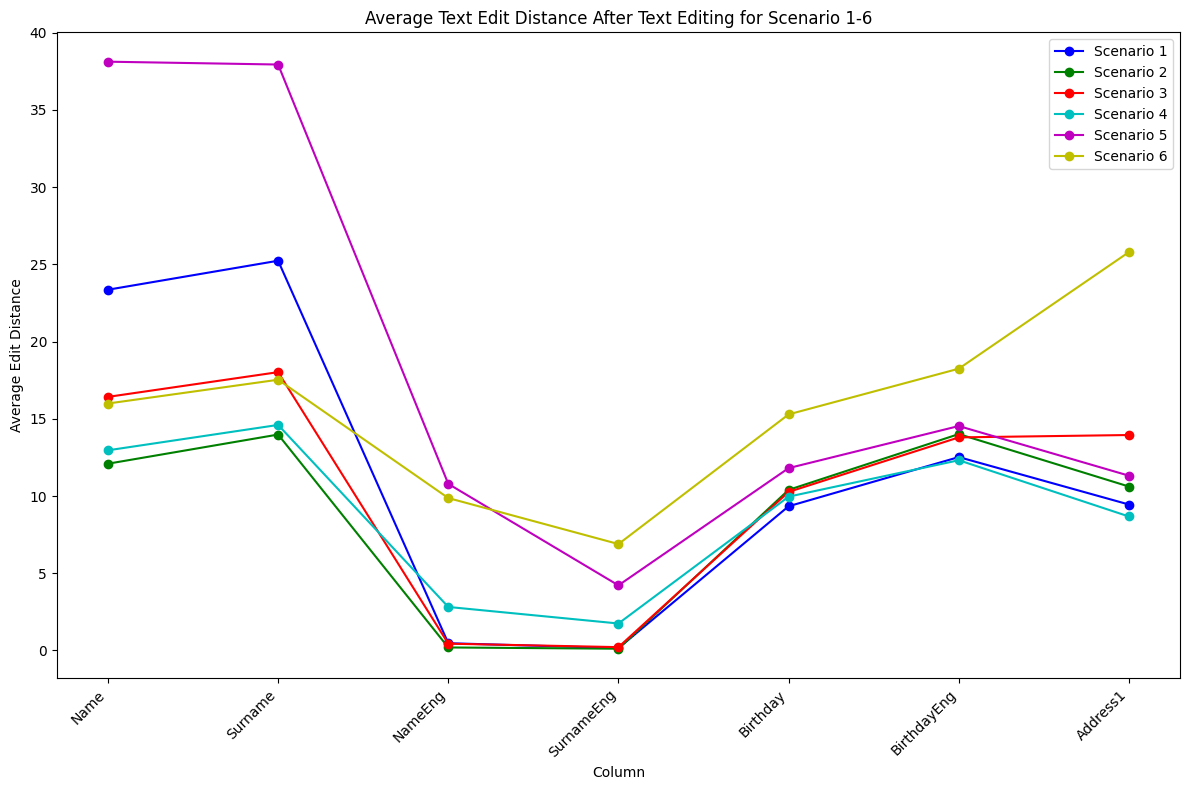

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# สร้าง DataFrame เพื่อรวมข้อมูลจากทั้งหก scenario
all_edit_distances = pd.DataFrame()

# วนลูป scenario1 - scenario6
for scenario_num in range(1, 7):
    # อ่านไฟล์ Excel
    file_path = f'Text_Edit_Distance_Scenario{scenario_num}.xlsx'
    edit_distances = pd.read_excel(file_path)

    # เพิ่มคอลัมน์ 'Scenario' เพื่อระบุ scenario ที่ข้อมูลนี้มาจาก
    edit_distances['Scenario'] = f'Scenario {scenario_num}'

    # รวมข้อมูลลงใน DataFrame ที่สร้างขึ้น
    all_edit_distances = pd.concat([all_edit_distances, edit_distances])

# พล็อตกราฟเส้น
plt.figure(figsize=(12, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y']  # สีของแต่ละ scenario
for scenario_num, color in zip(range(1, 7), colors):
    scenario_data = all_edit_distances[all_edit_distances['Scenario'] == f'Scenario {scenario_num}']
    plt.plot(scenario_data['Column'], scenario_data['Average'], marker='o', linestyle='-', color=color, label=f'Scenario {scenario_num}')

plt.title('Average Text Edit Distance After Text Editing for Scenario 1-6')
plt.xlabel('Column')
plt.ylabel('Average Edit Distance')
plt.xticks(rotation=45, ha='right')  # หมุนแกน x 45 องศา
plt.legend()  # เพิ่มป้ายชื่อ scenario
plt.tight_layout()

# แสดงกราฟ
plt.show()


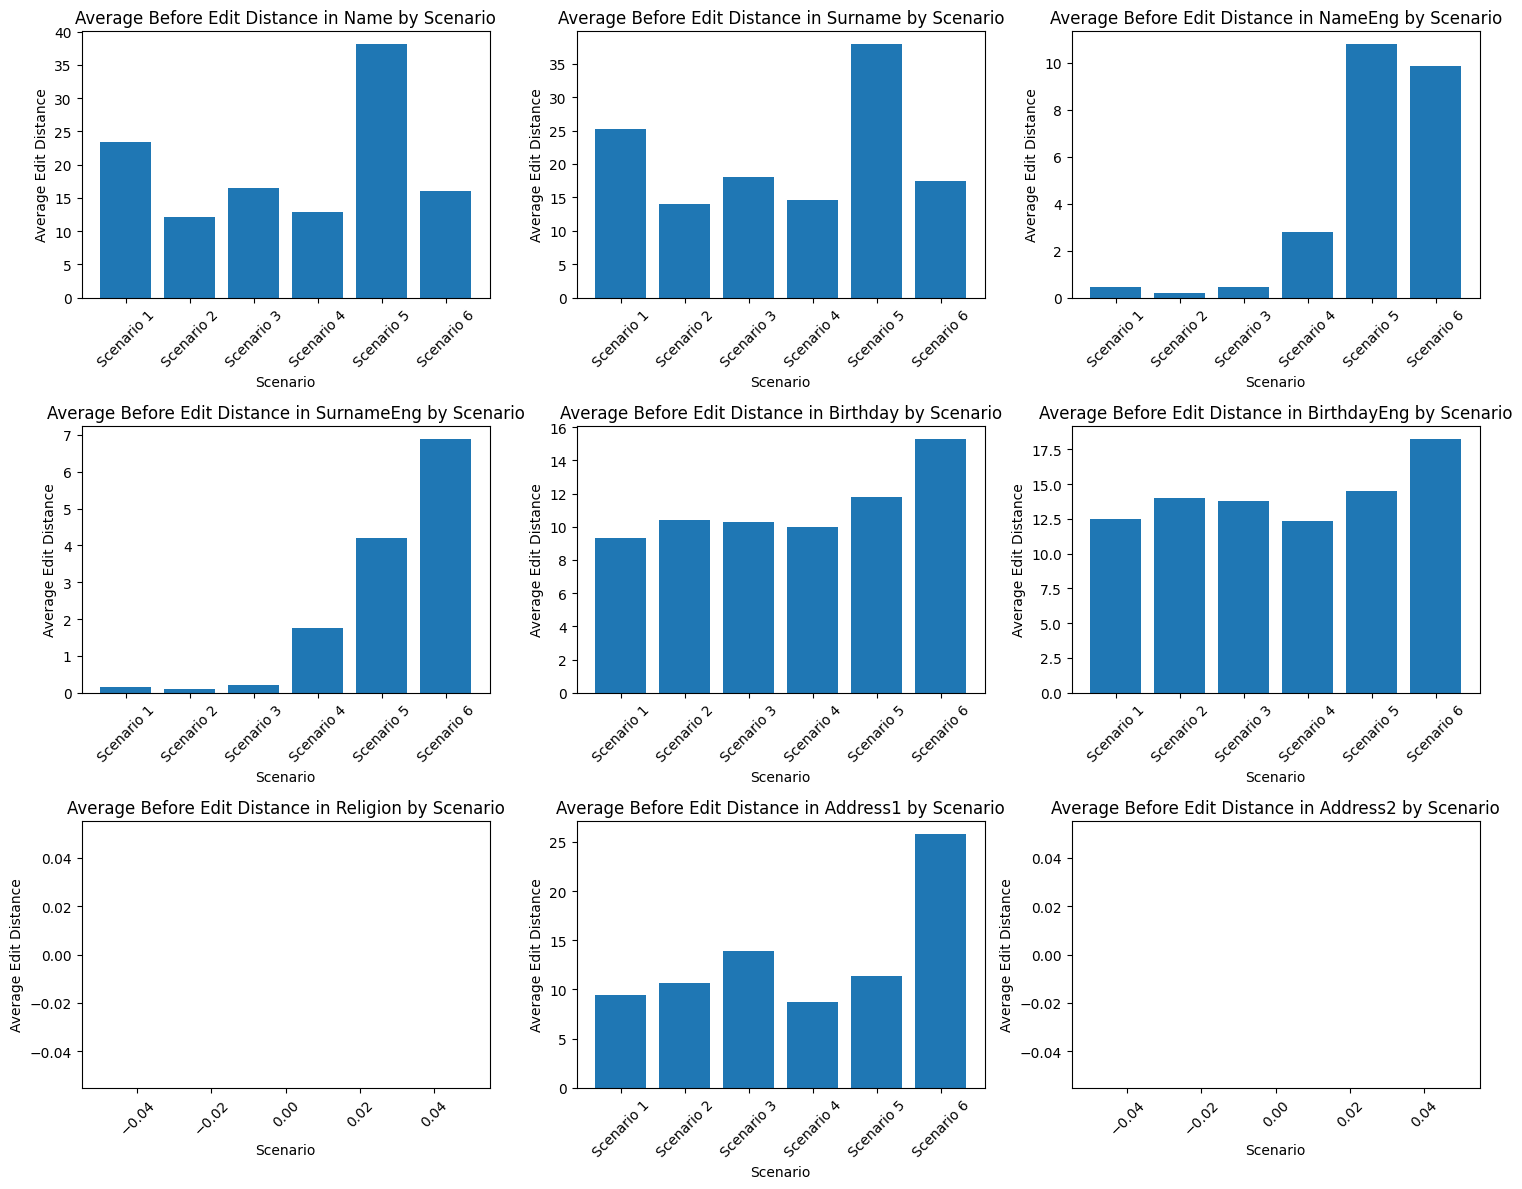

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# สร้าง DataFrame เพื่อรวมข้อมูลจากทั้งหก scenario
all_edit_distances = pd.DataFrame()

# วนลูป scenario1 - scenario6
for scenario_num in range(1, 7):
    # อ่านไฟล์ Excel
    file_path = f'Text_Edit_Distance_Scenario{scenario_num}.xlsx'
    edit_distances = pd.read_excel(file_path)

    # เลือกข้อมูลที่เป็น 'Name' เท่านั้น
    name_edit_distances = edit_distances[edit_distances['Column'].isin(['Name', 'Surname', 'NameEng', 'SurnameEng', 'Birthday', 'BirthdayEng', 'Religion', 'Address1', 'Address2'])]

    # เพิ่มคอลัมน์ 'Scenario' เพื่อระบุ scenario ที่ข้อมูลนี้มาจาก
    name_edit_distances['Scenario'] = f'Scenario {scenario_num}'

    # รวมข้อมูลลงใน DataFrame ที่สร้างขึ้น
    all_edit_distances = pd.concat([all_edit_distances, name_edit_distances])

# พล็อตกราฟแท่งสำหรับแต่ละ Column
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12), sharex=False)

columns = ['Name', 'Surname', 'NameEng', 'SurnameEng', 'Birthday', 'BirthdayEng', 'Religion', 'Address1', 'Address2']
for ax, column in zip(axes.flatten(), columns):
    ax.bar(all_edit_distances[all_edit_distances['Column'] == column]['Scenario'], all_edit_distances[all_edit_distances['Column'] == column]['Average'])
    ax.set_title(f'Average Before Edit Distance in {column} by Scenario')
    ax.set_xlabel('Scenario')
    ax.set_ylabel('Average Edit Distance')
    ax.tick_params(axis='x', rotation=45)  # แกน x หมุน 45 องศา

plt.tight_layout()
plt.show()


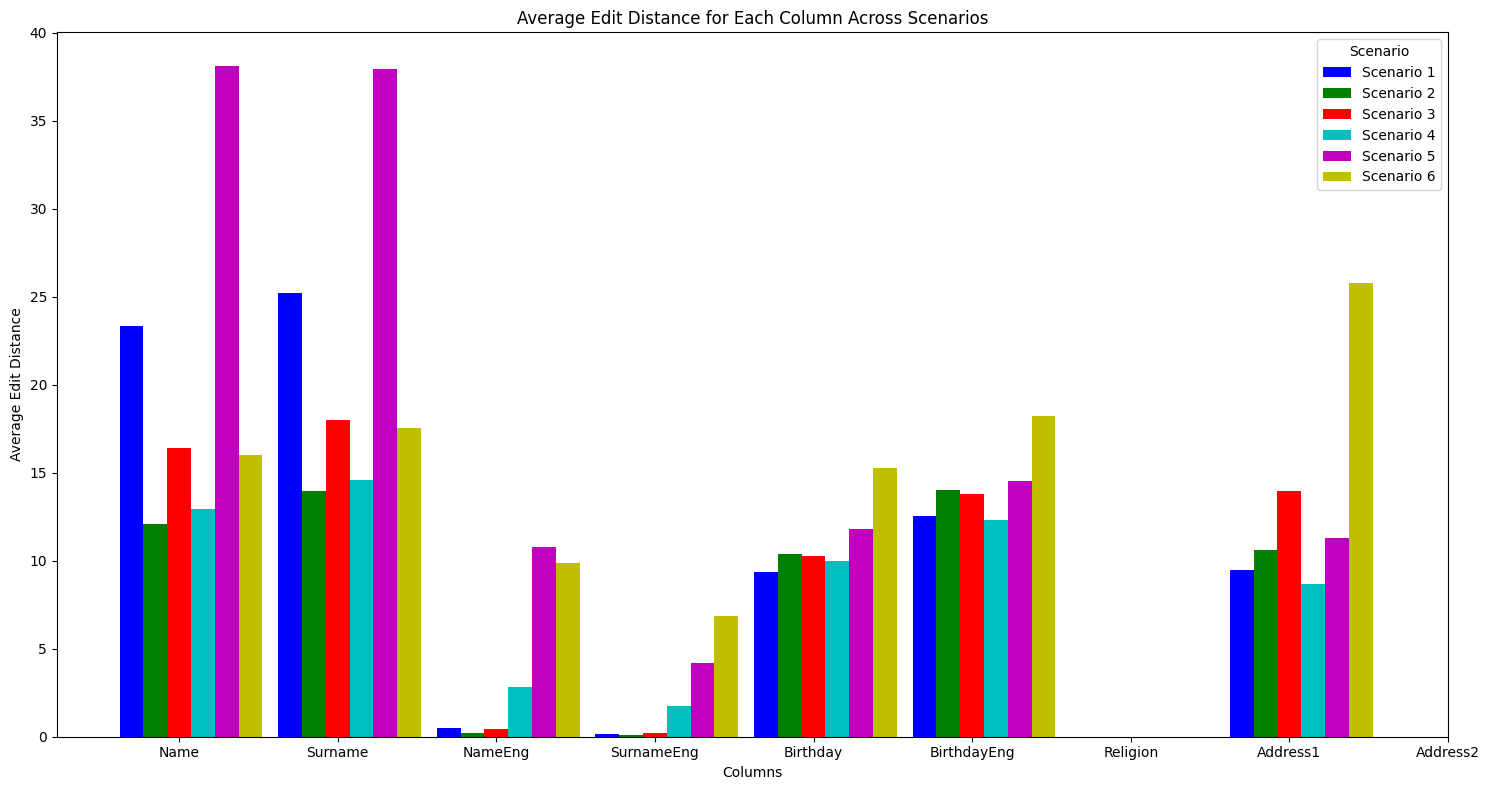

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame to combine data from all six scenarios
all_edit_distances = pd.DataFrame()

# Loop through scenario1 - scenario6
for scenario_num in range(1, 7):
    # Read Excel file
    file_path = f'Text_Edit_Distance_Scenario{scenario_num}.xlsx'
    edit_distances = pd.read_excel(file_path)

    # Select data for 'Name' only
    name_edit_distances = edit_distances[edit_distances['Column'].isin(['Name', 'Surname', 'NameEng', 'SurnameEng', 'Birthday', 'BirthdayEng', 'Religion', 'Address1'])]

    # Add 'Scenario' column to specify the scenario from which this data comes
    name_edit_distances['Scenario'] = f'Scenario {scenario_num}'

    # Concatenate data into the created DataFrame
    all_edit_distances = pd.concat([all_edit_distances, name_edit_distances])

# Plot a single column chart for all columns
fig, ax = plt.subplots(figsize=(15, 8))

# Set color for each scenario
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Plot columns for each scenario
for j, scenario in enumerate(all_edit_distances['Scenario'].unique()):
    for i, column in enumerate(columns):
        scenario_data = all_edit_distances[(all_edit_distances['Column'] == column) & (all_edit_distances['Scenario'] == scenario)]
        ax.bar(x=i + j * 0.15, height=scenario_data['Average'], width=0.15, color=colors[j], label=f'{scenario}' if i == 0 else '')

# Set plot labels and title
ax.set_xticks([i + 0.3 for i in range(len(columns))])
ax.set_xticklabels(columns)
ax.set_xlabel('Columns')
ax.set_ylabel('Average Edit Distance')
ax.set_title('Average Edit Distance for Each Column Across Scenarios')
ax.legend(title='Scenario')

plt.tight_layout()
plt.show()

<ipython-input-18-e84dc0a89233>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_edit_distances['Scenario'] = f'Scenario {scenario_num}'
<ipython-input-18-e84dc0a89233>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_edit_distances['Scenario'] = f'Scenario {scenario_num}'
<ipython-input-18-e84dc0a89233>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

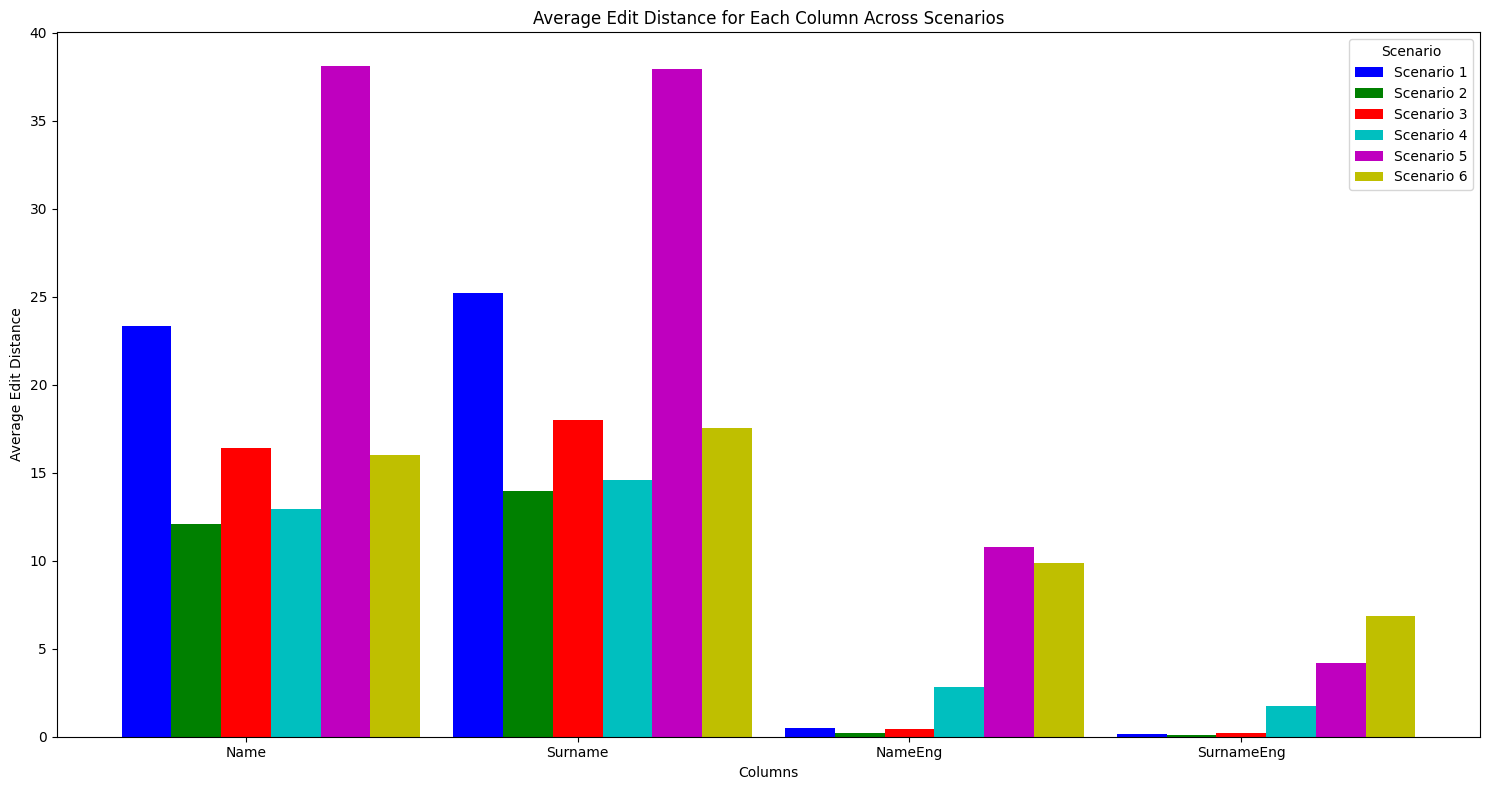

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame to combine data from all six scenarios
all_edit_distances = pd.DataFrame()

# Loop through scenario1 - scenario6
for scenario_num in range(1, 7):
    # Read Excel file
    file_path = f'Text_Edit_Distance_Scenario{scenario_num}.xlsx'
    edit_distances = pd.read_excel(file_path)

    # Select data for 'Name' only
    name_edit_distances = edit_distances[edit_distances['Column'].isin(['Name', 'Surname', 'NameEng', 'SurnameEng'])]

    # Add 'Scenario' column to specify the scenario from which this data comes
    name_edit_distances['Scenario'] = f'Scenario {scenario_num}'

    # Concatenate data into the created DataFrame
    all_edit_distances = pd.concat([all_edit_distances, name_edit_distances])

# Define columns based on unique values in the 'Column' column
columns = all_edit_distances['Column'].unique()

# Plot a grouped bar chart for each column
fig, ax = plt.subplots(figsize=(15, 8))

# Set color for each scenario
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Plot columns for each scenario
for j, scenario in enumerate(all_edit_distances['Scenario'].unique()):
    for i, column in enumerate(columns):
        scenario_data = all_edit_distances[(all_edit_distances['Column'] == column) & (all_edit_distances['Scenario'] == scenario)]
        ax.bar(x=i + j * 0.15, height=scenario_data['Average'], width=0.15, color=colors[j], label=f'{scenario}' if i == 0 else '')

# Set plot labels and title
ax.set_xticks([i + 0.3 for i in range(len(columns))])
ax.set_xticklabels(columns)
ax.set_xlabel('Columns')
ax.set_ylabel('Average Edit Distance')
ax.set_title('Average Edit Distance for Each Column Across Scenarios')
ax.legend(title='Scenario')

plt.tight_layout()
plt.show()

<ipython-input-19-26b63a331b86>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_edit_distances['Scenario'] = f'Scenario {scenario_num}'
<ipython-input-19-26b63a331b86>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_edit_distances['Scenario'] = f'Scenario {scenario_num}'
<ipython-input-19-26b63a331b86>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

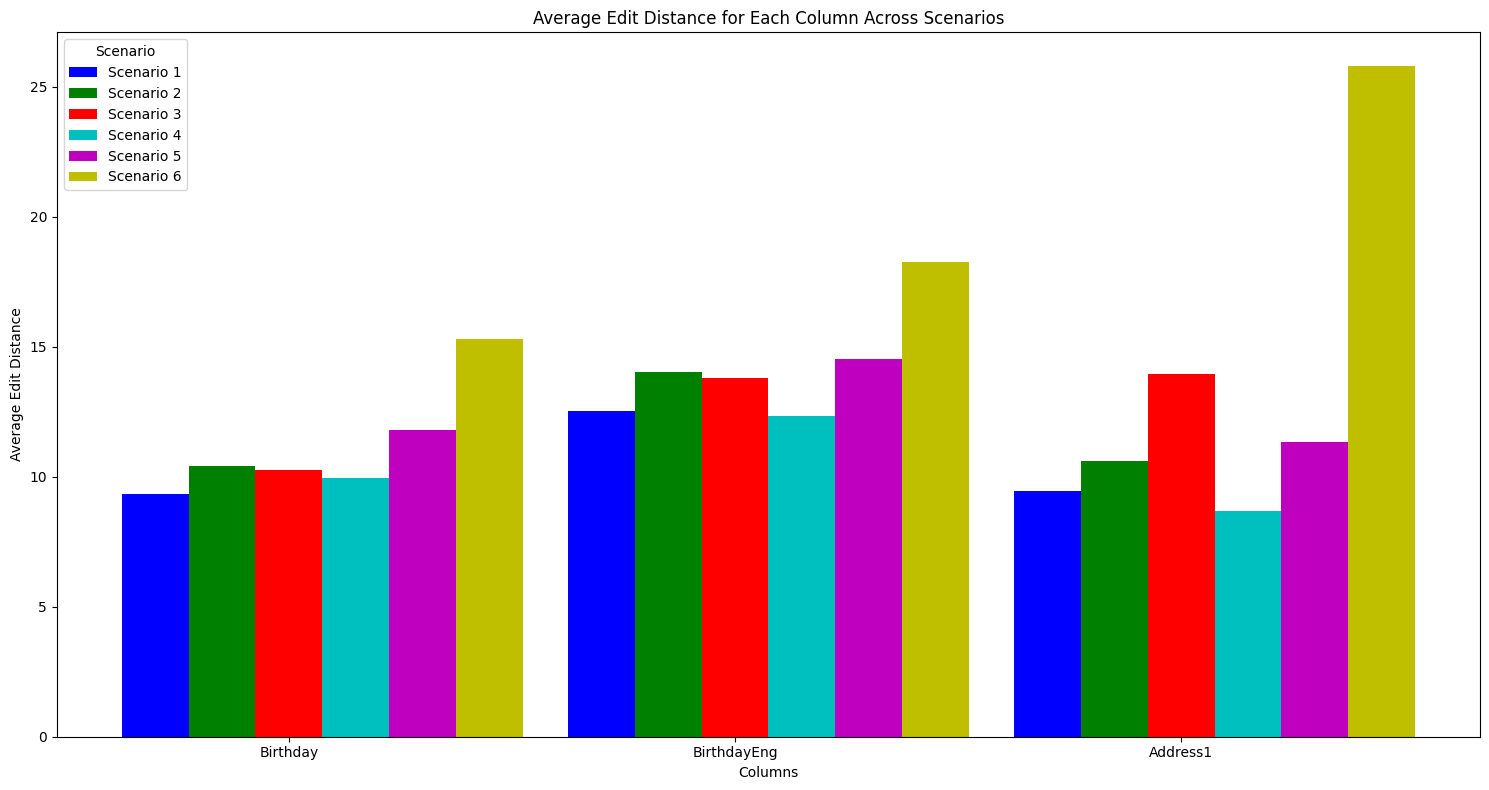

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame to combine data from all six scenarios
all_edit_distances = pd.DataFrame()

# Loop through scenario1 - scenario6
for scenario_num in range(1, 7):
    # Read Excel file
    file_path = f'Text_Edit_Distance_Scenario{scenario_num}.xlsx'
    edit_distances = pd.read_excel(file_path)

    # Select data for 'Name' only
    name_edit_distances = edit_distances[edit_distances['Column'].isin(['Birthday', 'BirthdayEng', 'Address1'])]

    # Add 'Scenario' column to specify the scenario from which this data comes
    name_edit_distances['Scenario'] = f'Scenario {scenario_num}'

    # Concatenate data into the created DataFrame
    all_edit_distances = pd.concat([all_edit_distances, name_edit_distances])

# Define columns based on unique values in the 'Column' column
columns = all_edit_distances['Column'].unique()

# Plot a grouped bar chart for each column
fig, ax = plt.subplots(figsize=(15, 8))

# Set color for each scenario
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Plot columns for each scenario
for j, scenario in enumerate(all_edit_distances['Scenario'].unique()):
    for i, column in enumerate(columns):
        scenario_data = all_edit_distances[(all_edit_distances['Column'] == column) & (all_edit_distances['Scenario'] == scenario)]
        ax.bar(x=i + j * 0.15, height=scenario_data['Average'], width=0.15, color=colors[j], label=f'{scenario}' if i == 0 else '')

# Set plot labels and title
ax.set_xticks([i + 0.3 for i in range(len(columns))])
ax.set_xticklabels(columns)
ax.set_xlabel('Columns')
ax.set_ylabel('Average Edit Distance')
ax.set_title('Average Edit Distance for Each Column Across Scenarios')
ax.legend(title='Scenario')

plt.tight_layout()
plt.show()

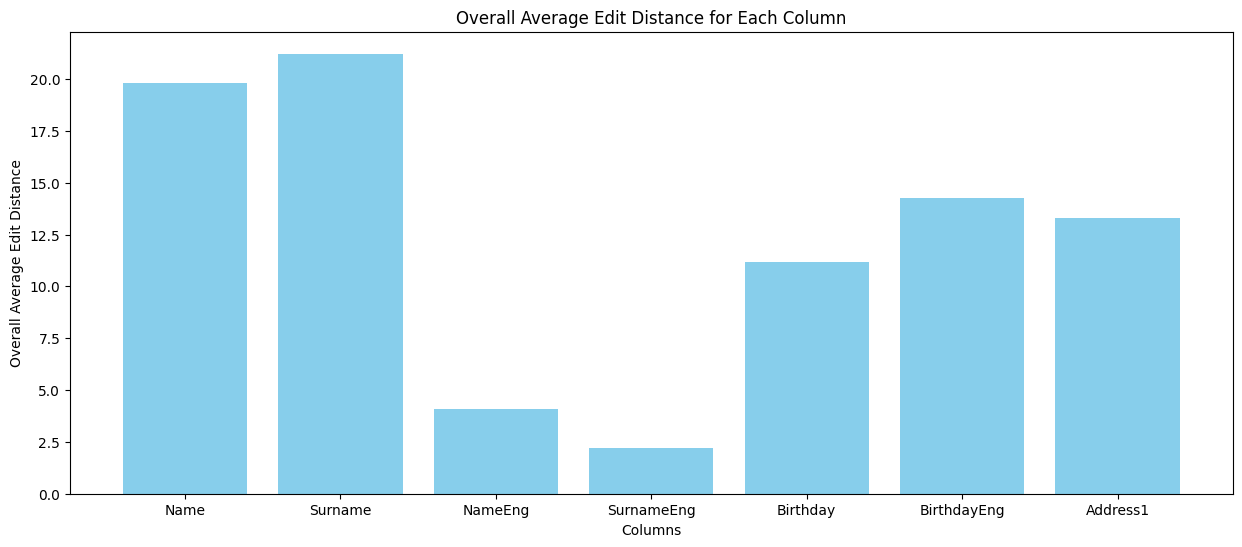

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the overall averages from the Excel file
overall_average_df = pd.read_excel('Overall_Averages_Counts_scenario1-6.xlsx')

# Plot a bar graph
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(overall_average_df['Column'], overall_average_df['Overall Average'], color='skyblue')
ax.set_ylabel('Overall Average Edit Distance')
ax.set_xlabel('Columns')
ax.set_title('Overall Average Edit Distance for Each Column')

plt.show()

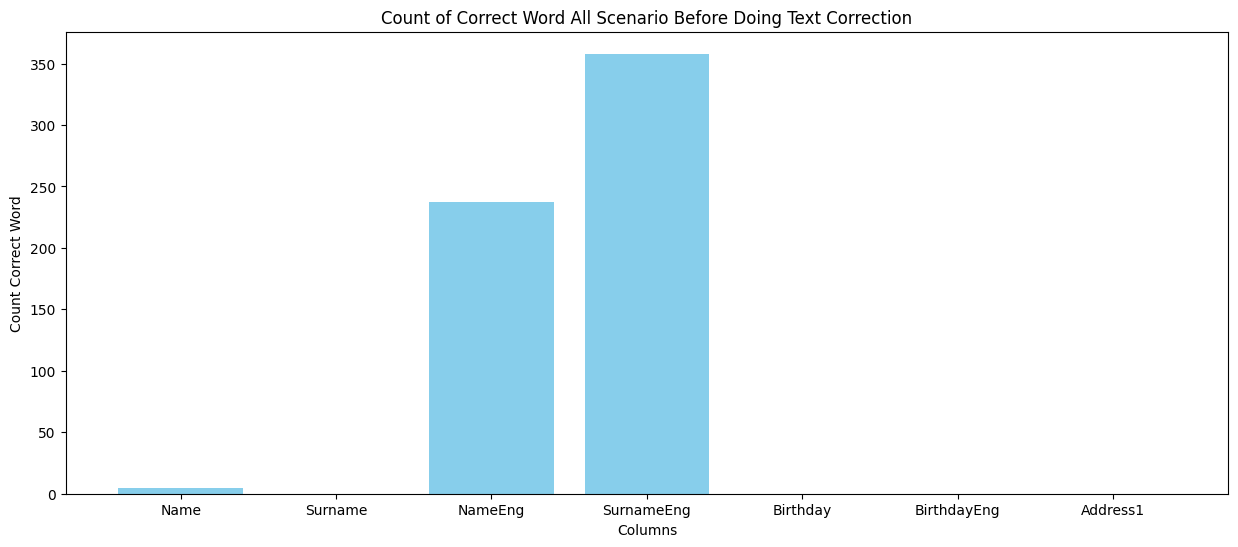

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the overall averages from the Excel file
overall_average_df = pd.read_excel('Overall_Averages_Counts_scenario1-6.xlsx')

# Plot a bar graph
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(overall_average_df['Column'], overall_average_df['Count 0'], color='skyblue')
ax.set_ylabel('Count Correct Word')
ax.set_xlabel('Columns')
ax.set_title('Count of Correct Word All Scenario Before Doing Text Correction')

plt.show()

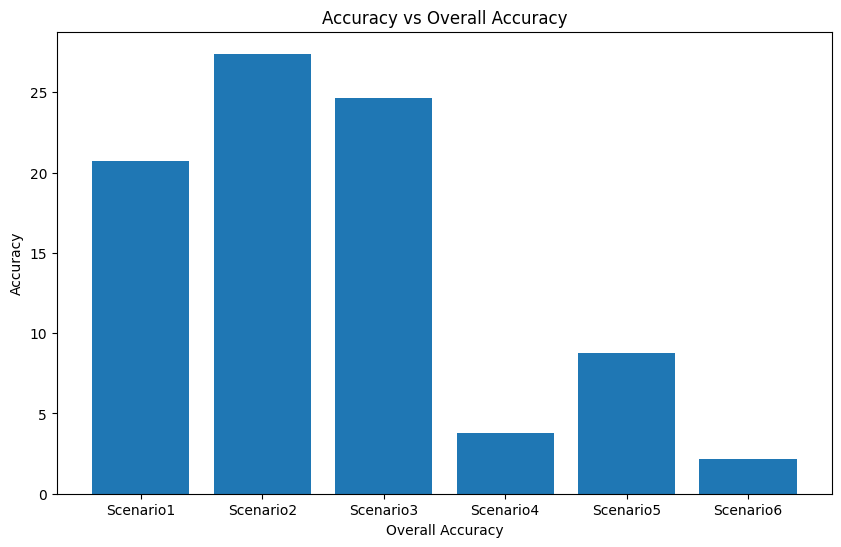

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดข้อมูลจาก Excel
df = pd.read_excel('Accuracy.xlsx')

# สร้างกราฟแท่ง
plt.figure(figsize=(10, 6))
plt.bar(df['Scenario'], df['Overall_Accuracy'])
plt.xlabel('Overall Accuracy')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Overall Accuracy')
plt.grid(False)
plt.show()


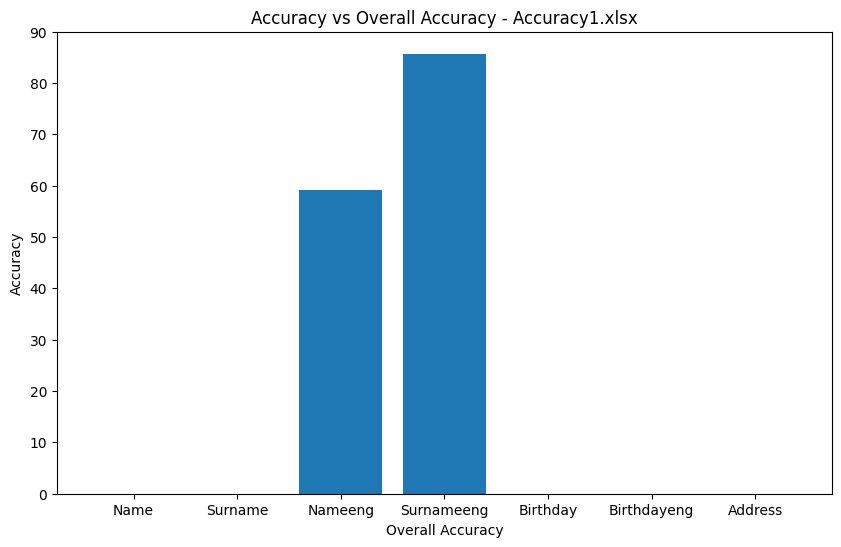

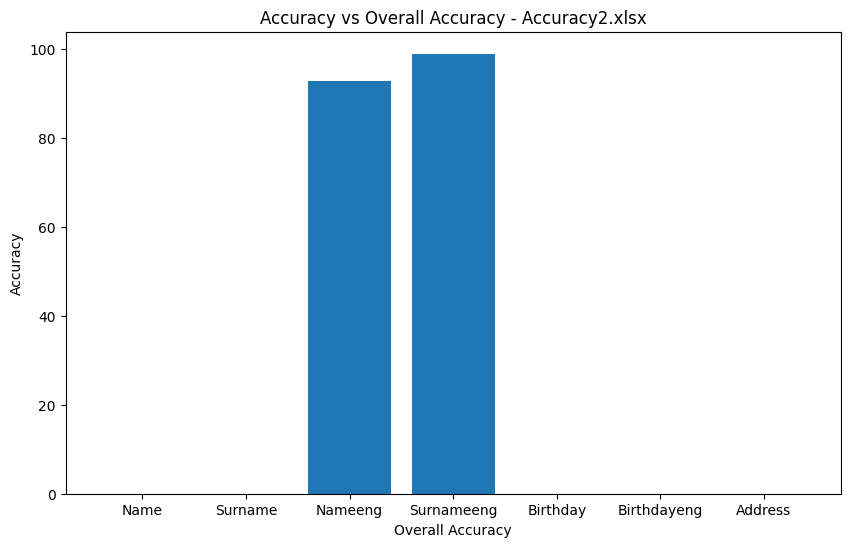

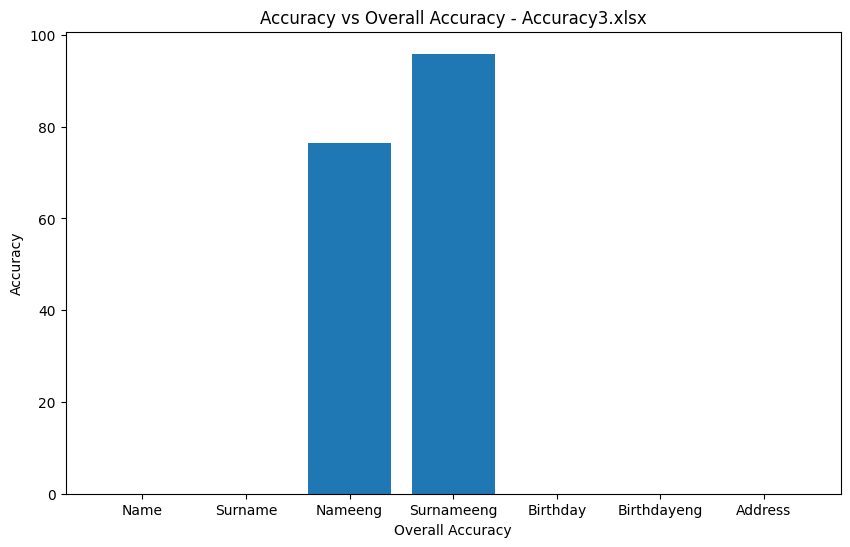

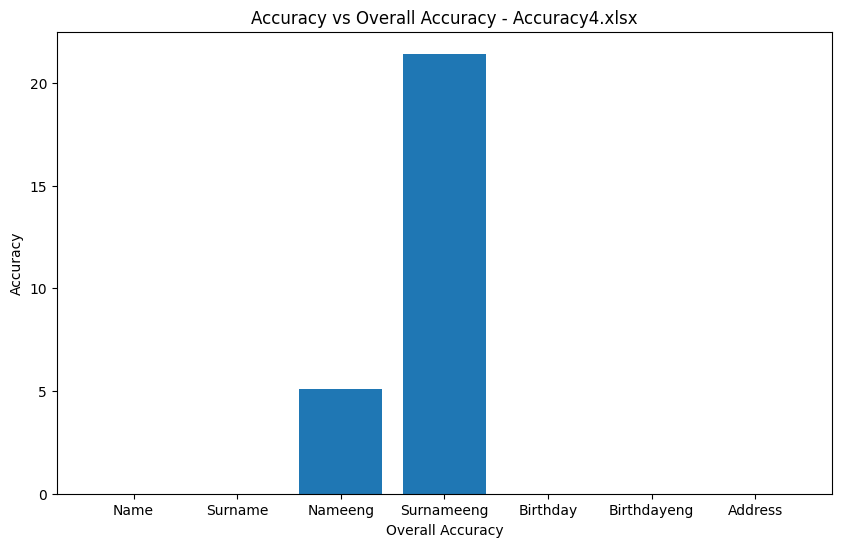

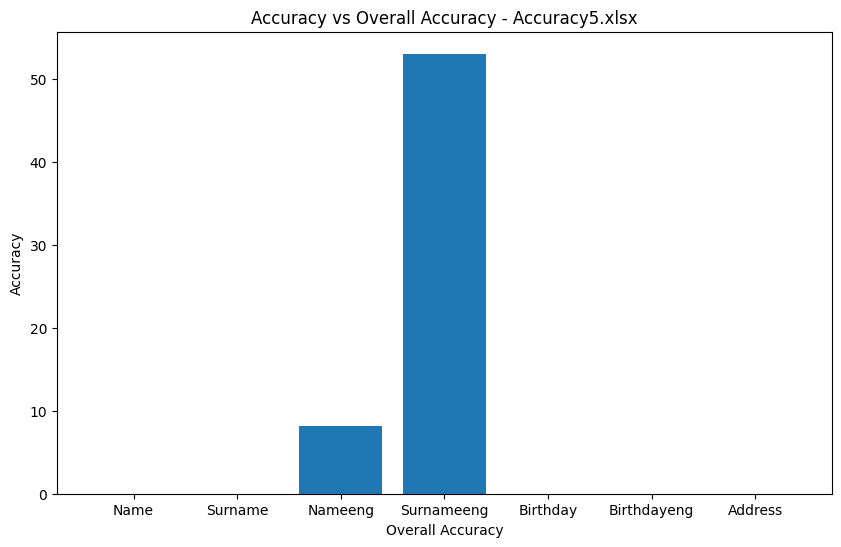

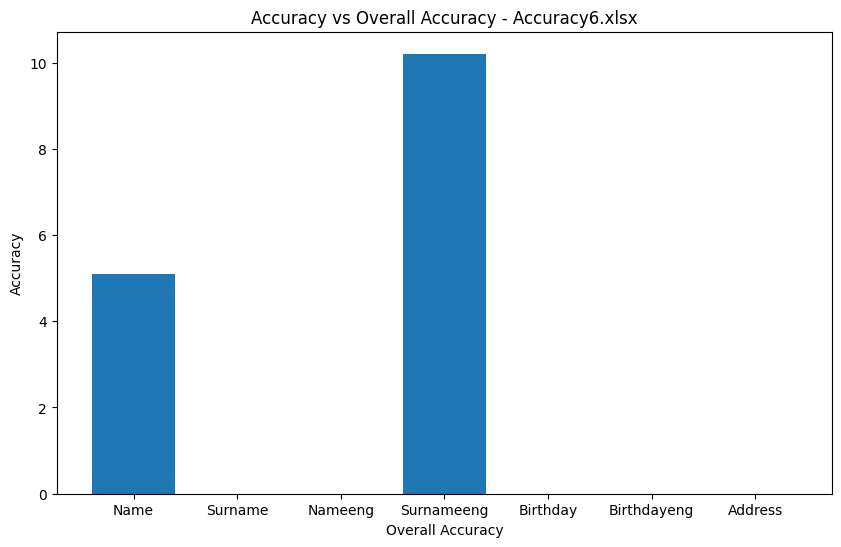

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

for i in range(1, 7):
    filename = f'Accuracy{i}.xlsx'
    df = pd.read_excel(filename)

    plt.figure(figsize=(10, 6))
    plt.bar(df['Column'], df['Overall Accuracy'])
    plt.xlabel('Overall Accuracy')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs Overall Accuracy - {filename}')
    plt.grid(False)
    plt.show()


## Text editing

### Column Birthday & BirthdayEng (Date and remvoe Date of birth)

In [ ]:
import openpyxl
import re

# Loop through scenario1 to scenario6
for scenario_num in range(1, 7):
    # Load the Excel file for the current scenario
    file_path = f'scenario{scenario_num}.xlsx'
    wb = openpyxl.load_workbook(file_path)

    # Select the sheet you want to work with
    sheet = wb['Sheet1']  # Replace 'Sheet1' with the name of your sheet

    # Define the regex pattern to identify words to delete
    pattern_to_delete = r'(เก|ว|ท)'  # Replace with your regex pattern
    pattern_to_keep = r'\b[ก-ฮ][ก-๙\d]+\d\b'

    # Iterate through Column G in the sheet
    for row in sheet.iter_rows(min_col=7, max_col=7):  # Column G is represented by column index 7
        for cell in row:
            if cell.value:
                # Split the cell value by space
                words = cell.value.split()
                # Use regex to find and delete words that match the pattern
                words = [word for word in words if not (re.search(pattern_to_delete, word, flags=re.IGNORECASE) and not re.search(pattern_to_keep, word, flags=re.IGNORECASE))]
                # Join the remaining words back into a sentence
                new_value = ' '.join(words)

                # Update the cell value
                cell.value = new_value

    # Save the modified Excel file
    wb.save(f'scenario{scenario_num}.xlsx')

    # Close the workbook
    wb.close()
#ติดปัญหาคิือ เกิดวันที่12 ocr อ่านได้  เก็บไว้ก่อน

In [ ]:
# Define the regex pattern to identify words to delete
pattern_to_delete = r'(of|i|da|bt|h|at|af|bu|al|ol|ot|{|arn)'  # Replace with your regex pattern
pattern_to_keep = r'\b[A-Za-z][A-Za-z\d]+\d\b'

# Loop through scenario1 to scenario6
for scenario_num in range(1, 7):
    # Load the Excel file for the current scenario
    file_path = f'scenario{scenario_num}.xlsx'
    wb = openpyxl.load_workbook(file_path)

    # Select the sheet you want to work with
    sheet = wb['Sheet1']  # Replace 'Sheet1' with the name of your sheet

    # Iterate through Column H in the sheet
    for row in sheet.iter_rows(min_col=8, max_col=8, min_row=2):  # Column H is represented by column index 8
        for cell in row:
            if cell.value:
                # Split the cell value by space
                words = cell.value.split()

                # Filter and modify words based on the conditions
                new_words = [word for word in words if not (re.search(pattern_to_delete, word, flags=re.IGNORECASE) and not re.search(pattern_to_keep, word, flags=re.IGNORECASE))]

                # Join the remaining words back into a sentence
                new_value = ' '.join(new_words)

                # Update the cell value
                cell.value = new_value

    # Save the modified Excel file
    wb.save(f'scenario{scenario_num}.xlsx')

    # Close the workbook
    wb.close()

In [ ]:
# Function to process and update a cell's value
def process_cell(cell_value):
    # Split the cell value into words
    words = cell_value.split()

    # Iterate through the words
    for i in range(len(words)):
        for j in range(31, 0, -1):  # Iterate from 31 to 1
            pattern = re.compile(rf'\b[ก-ฮ][ก-๙\d]+{j}\b', re.IGNORECASE)
            words[i] = pattern.sub(f'{j}', words[i])

    # Join the updated words back into a string
    updated_cell_value = ' '.join(words)

    return updated_cell_value

# Loop through scenario1 to scenario6
for scenario_num in range(1, 7):
    # Load the Excel workbook for the current scenario
    file_path = f'scenario{scenario_num}.xlsx'
    workbook = openpyxl.load_workbook(file_path)
    sheet = workbook.active

    # Iterate through column G starting from row 2
    for row in sheet.iter_rows(min_row=2, max_row=sheet.max_row, min_col=7, max_col=7):
        for cell in row:
            cell.value = process_cell(str(cell.value))

    # Save the modified workbook
    workbook.save(f'scenario{scenario_num}.xlsx')

    # Close the workbook
    workbook.close()
  #ทำการลบ เกิดวันที และเหลือ 12 ไว้

In [ ]:
# Function to process and update a cell's value
def process_cell(cell_value):
    # Split the cell value into words
    words = cell_value.split()

    # Iterate through the words
    for i in range(len(words)):
        for j in range(31, 0, -1):  # Iterate from 31 to 1m
            pattern = re.compile(rf'\b[A-za-z][A-za-z\d]+{j}\b', re.IGNORECASE)
            words[i] = pattern.sub(f'{j}', words[i])

    # Join the updated words back into a string
    updated_cell_value = ' '.join(words)

    return updated_cell_value

# Loop through scenario1 to scenario6
for scenario_num in range(1, 7):
    # Load the Excel workbook for the current scenario
    file_path = f'scenario{scenario_num}.xlsx'
    workbook = openpyxl.load_workbook(file_path)
    sheet = workbook.active

    # Iterate through column H starting from row 2
    for row in sheet.iter_rows(min_row=2, max_row=sheet.max_row, min_col=8, max_col=8):
        for cell in row:
            cell.value = process_cell(str(cell.value))

    # Save the modified workbook
    workbook.save(f'scenario{scenario_num}.xlsx')

    # Close the workbook
    workbook.close()

In [ ]:
# Define the regex pattern to identify words to delete
pattern_to_startwithB = r'\b[bB]\w*\b'

# Loop through scenario1 to scenario6
for scenario_num in range(1, 7):
    # Load the Excel file for the current scenario
    file_path = f'scenario{scenario_num}.xlsx'
    wb = openpyxl.load_workbook(file_path)

    # Select the sheet you want to work with
    sheet = wb['Sheet1']  # Replace 'Sheet1' with the name of your sheet

    # Iterate through Column H in the sheet
    for row in sheet.iter_rows(min_col=8, max_col=8, min_row=2):  # Column H is represented by column index 8
        for cell in row:
            if cell.value:
                # Split the cell value by space
                words = cell.value.split()

                # Filter and modify words based on the conditions
                new_words = [word for word in words if not re.search(pattern_to_startwithB, word, flags=re.IGNORECASE)]

                # Join the remaining words back into a sentence
                new_value = ' '.join(new_words)

                # Update the cell value
                cell.value = new_value

    # Save the modified Excel file
    wb.save(f'scenario{scenario_num}.xlsx')

    # Close the workbook
    wb.close()
#ของช่อง birtday eng ลบ b ทิ้ง คือโดน birth

### Column Birthday & BirthdayEng (Month)

In [ ]:
import re
import openpyxl

# Define the regular expression pattern
date_pattern = r'(ม.ค.|ก.พ.|มี.ค.|เม.ย.|พ.ค.|มิ.ย.|ก.ค.|ส.ค.|ก.ย.|ต.ค.|พ.ย.|ธ.ค.)'
# date_pattern = r'(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)'
# Iterate through scenarios 1 to 6
for scenario_num in range(1, 7):
    # Construct the file path for the current scenario
    file_path = f"scenario{scenario_num}.xlsx"

    # Open the Excel file for the current scenario
    workbook = openpyxl.load_workbook(file_path)

    # Select the worksheet where your data is located
    worksheet = workbook.active  # You can also specify a specific worksheet by name

    # Iterate through the rows of column H in the worksheet
    for row in worksheet.iter_rows(min_col=7, max_col=7, min_row=2, max_row=worksheet.max_row):
        for cell in row:
            if cell.value is not None and isinstance(cell.value, str):
                matches = re.findall(date_pattern, cell.value)
                if matches:
                    # Get the data from the left-hand column in the same row
                    left_column = worksheet.cell(row=cell.row, column=cell.column + 1)
                    # print(f"Scenario {scenario_num}:")
                    # print(f"Found pattern in Cell {cell.coordinate}: {cell.value}")
                    # print(f"Data in Left Column: {left_column.value}")
                    if 'ม.ค.' in cell.value:
                        left_column.value = re.sub(r'J[A-Za-z][A-Za-z]|[A-Za-z]a[A-Za-z]|[A-ZA-Za-z][A-Za-z]n', 'Jan', left_column.value)
                    if 'ก.พ.' in cell.value:
                        left_column.value = re.sub(r'F[A-Za-z][A-Za-z]|[A-Za-z]e[A-Za-z]|[A-ZA-Za-z][A-Za-z]b', 'Feb', left_column.value)
                    if 'มี.ค.' in cell.value:
                        left_column.value = re.sub(r'M[A-Za-z][A-Za-z]|[A-Za-z]a[A-Za-z]|[A-ZA-Za-z][A-Za-z]r', 'Mar', left_column.value)
                    if 'เม.ย.' in cell.value:
                        left_column.value = re.sub(r'A[A-Za-z][A-Za-z]|[A-Za-z]p[A-Za-z]|[A-ZA-Za-z][A-Za-z]l', 'Apr', left_column.value)
                    if 'พ.ค.' in cell.value:
                        left_column.value = re.sub(r'M[A-Za-z][A-Za-z]|[A-Za-z]a[A-Za-z]|[A-ZA-Za-z][A-Za-z]y', 'May', left_column.value)
                    if 'มิ.ย.' in cell.value:
                        left_column.value = re.sub(r'J[A-Za-z][A-Za-z]|[A-Za-z]u[A-Za-z]|[A-ZA-Za-z][A-Za-z]n', 'Jun', left_column.value)
                    if 'ก.ค.' in cell.value:
                        left_column.value = re.sub(r'J[A-Za-z][A-Za-z]|[A-Za-z]u[A-Za-z]|[A-ZA-Za-z][A-Za-z]y', 'Jul', left_column.value)
                    if 'ส.ค.' in cell.value:
                        left_column.value = re.sub(r'A[A-Za-z][A-Za-z]|[A-Za-z]u[A-Za-z]|[A-ZA-Za-z][A-Za-z]g', 'Aug', left_column.value)
                    if 'ก.ย.' in cell.value:
                        # left_column.value = re.sub(r'S[A-Za-z][A-Za-z]|[A-Za-z]e[A-Za-z]|[A-ZA-Za-z][A-Za-z]p', 'Sep', left_column.value)
                        left_column.value = re.sub(r'S[A-Za-z][A-Za-z][A-Za-z]|[A-Za-z]e[A-Za-z][A-Za-z]|[A-ZA-Za-z][A-Za-z]p[A-Za-z]|[A-ZA-Za-z][A-Za-z][A-Za-z]t', 'Sept', left_column.value)
                    if 'ต.ค.' in cell.value:
                        left_column.value = re.sub(r'0[A-Za-z][A-Za-z]|O[A-Za-z][A-Za-z]|[A-Za-z]c[A-Za-z]|[A-ZA-Za-z][A-Za-z]t', 'Oct', left_column.value)
                    if 'พ.ย.' in cell.value:
                        left_column.value = re.sub(r'N[A-Za-z][A-Za-z]|[A-Za-z]o[A-Za-z]|[A-ZA-Za-z][A-Za-z]v', 'Nov', left_column.value)
                    if 'ธ.ค.' in cell.value:
                        left_column.value = re.sub(r'D[A-Za-z][A-Za-z]|[A-Za-z]e[A-Za-z]|[A-ZA-Za-z][A-Za-z]c', 'Dec', left_column.value)
    # Save the modified workbook for the current scenario
    workbook.save(f"scenario{scenario_num}.xlsx")

    # Close the workbook for the current scenario
    workbook.close()

In [ ]:
import re
import openpyxl

month_patterns = {
    'Jan': r'(ม|ค)',
    'Feb': r'(ก|พ)',
    'Mar': r'(มี|ค)',
    'Apr': r'(เม|ย)',
    'May': r'(พ|ค)',
    'Jun': r'(มิ|ย)',
    'Jul': r'(ก|ค)',
    'Aug': r'(ส|ค)',
    'Sep': r'(ก|ย)',
    'Oct': r'(ต|ค)',
    'Nov': r'(พ|ย)',
    'Dec': r'(ธ|ค)'
}

# Define the regular expression pattern
# date_pattern = r'(ม.ค.|ก.พ.|มี.ค.|เม.ย.|พ.ค.|มิ.ย.|ก.ค.|ส.ค.|ก.ย.|ต.ค.|พ.ย.|ธ.ค.)'
date_pattern = r'(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)'
# Iterate through scenarios 1 to 6
for scenario_num in range(1, 7):
    # Construct the file path for the current scenario
    file_path = f"scenario{scenario_num}.xlsx"

    # Open the Excel file for the current scenario
    workbook = openpyxl.load_workbook(file_path)

    # Select the worksheet where your data is located
    worksheet = workbook.active  # You can also specify a specific worksheet by name

    # Iterate through the rows of column H in the worksheet
    for row in worksheet.iter_rows(min_col=8, max_col=8, min_row=2, max_row=worksheet.max_row):
        for cell in row:
            if cell.value is not None and isinstance(cell.value, str):
                matches = re.findall(date_pattern, cell.value)
                if matches:
                    # Get the data from the left-hand column in the same row
                    left_column = worksheet.cell(row=cell.row, column=cell.column - 1)
                    # print(f"Scenario {scenario_num}:")
                    # print(f"Found pattern in Cell {cell.coordinate}: {cell.value}")
                    # print(f"Data in Left Column: {left_column.value}")
                    for month, pattern in month_patterns.items():
                        if month in cell.value:
                            words = left_column.value.split()   #  2 ร.บ. 2545
                            words = [f'{"ม.ค." if month == "Jan" else "ก.พ." if month == "Feb" else "มี.ค." if month == "Mar" else "เม.ย." if month == "Apr" else "พ.ค." if month == "May" else "มิ.ย." if month == "Jun" else "ก.ค." if month == "Jul" else "ส.ค." if month == "Aug" else "ก.ย." if month == "Sep" else "ต.ค." if month == "Oct" else "พ.ย." if month == "Nov" else "ธ.ค."}' if re.search(pattern, word, flags=re.IGNORECASE) else word for word in words]
                            # Join the remaining words back into a sentence
                            left_column.value = ' '.join(words)
                            # print(left_column.value)

    # Save the modified workbook for the current scenario
    workbook.save(f"scenario{scenario_num}.xlsx")

    # Close the workbook for the current scenario
    workbook.close()

### Column Name & Surname (TH,ENG)

In [ ]:
# Function to process and update a cell's value
def process_cell(cell_value):
    # Split the cell value into words
    words = cell_value.split()

    # Define the patterns you want to match
    patterns = [
        (re.compile(r'\bนาย\b', re.IGNORECASE), "นาย"),
        (re.compile(r'\bนาง\b', re.IGNORECASE), "นาง"),
        (re.compile(r'\bนางสาว\b', re.IGNORECASE), "นางสาว"),
    ]

    # Iterate through the words and process them based on the patterns
    for i in range(len(words)):
        for pattern, replacement in patterns:
            if pattern.search(words[i]):
                words[i] = replacement

    # Join the updated words back into a string
    updated_cell_value = ' '.join(words)

    return updated_cell_value

# Loop through scenario1 to scenario6
for scenario_num in range(1, 7):
    # Load the Excel workbook for the current scenario
    file_path = f'scenario{scenario_num}.xlsx'
    workbook = openpyxl.load_workbook(file_path)
    sheet = workbook.active

    # Iterate through column C starting from row 2
    for row in sheet.iter_rows(min_row=2, max_row=sheet.max_row, min_col=3, max_col=4):
        for cell in row:
            cell.value = process_cell(str(cell.value))

    # Save the modified workbook
    workbook.save(f'scenario{scenario_num}.xlsx')

    # Close the workbook
    workbook.close()


In [ ]:
import openpyxl
import re

# Loop through scenario1 to scenario6
for scenario_num in range(1, 7):
    # Load the Excel file for the current scenario
    file_path = f'scenario{scenario_num}.xlsx'
    wb = openpyxl.load_workbook(file_path)

    # Select the sheet you want to work with
    sheet = wb['Sheet1']  # Replace 'Sheet1' with the name of your sheet

    # Define the regex pattern to identify words to delete
    pattern_to_delete = r'([A-Za-z])'  # Replace with your regex pattern

    # Iterate through Column G in the sheet
    for row in sheet.iter_rows(min_row=2, min_col=3, max_col=4):  # Column G is represented by column index 7
        for cell in row:
            if cell.value:
                # Split the cell value by space
                words = cell.value.split()
                # Use regex to find and delete words that match the pattern
                words = [word for word in words if not (re.search(pattern_to_delete, word, flags=re.IGNORECASE))]
                # Join the remaining words back into a sentence
                new_value = ' '.join(words)

                # Update the cell value
                cell.value = new_value

    # Save the modified Excel file
    wb.save(f'scenario{scenario_num}.xlsx')

    # Close the workbook
    wb.close()
#ติดปัญหาคิือ เกิดวันที่12 ocr อ่านได้  เก็บไว้ก่อน

In [ ]:
def parse_name(full_name):
    # แยกชื่อและนามสกุลโดยใช้ช่องว่างเป็นตัวแยก
    name_parts = full_name.split()
    # ถ้ามีชื่อและนามสกุล, ให้ return ทั้งคู่
    if len(name_parts) == 2:
        if name_parts[0] in ['นาง', 'นาย', 'นางสาว']:
           return full_name, full_name
        else:
           first_name = name_parts[0]
           last_name = name_parts[1]
           return first_name, last_name
    elif len(name_parts) == 3:
        first_name = name_parts[0] + ' ' + name_parts[1]
        last_name = ' '.join(name_parts[2:])
        return first_name, last_name
    elif len(name_parts) == 4:
        first_name = name_parts[1] + ' ' + name_parts[2]
        last_name = ' '.join(name_parts[3:])
        return first_name, last_name
    elif len(name_parts) == 5:
        first_name = name_parts[2] + ' ' + name_parts[3]
        last_name = ' '.join(name_parts[4:])
        return first_name, last_name
    else:
        return full_name, full_name

# ตัวอย่างการใช้งาน
full_name_input = "แแค้วนแราแทฺุ นาง ธยาดา ปรีชาวงศ์"
first_name, last_name = parse_name(full_name_input)

print("ชื่อ:", first_name)
print("นามสกุล:", last_name)

ชื่อ: นาง ธยาดา
นามสกุล: ปรีชาวงศ์


In [ ]:
import pandas as pd

def check_name_surname_equality(file_path):
    # โหลดข้อมูลจากไฟล์ Excel
    df = pd.read_excel(file_path)

    # ตรวจสอบว่ามี column 'Name' และ 'Surname' หรือไม่
    if 'Name' in df.columns and 'Surname' in df.columns:
        # ตรวจสอบค่าในแต่ละแถว
        equality_check = df['Name'] == df['Surname']

        # ถ้า equality เป็น True, ให้ทำการใช้ parse_name กับข้อมูลในแถวนั้น
        for index, row in df[equality_check].iterrows():
            full_name = row['Name']
            first_name, last_name = parse_name(full_name)

            # เขียนทับข้อมูลใน DataFrame
            df.at[index, 'Name'] = first_name
            df.at[index, 'Surname'] = last_name

    # บันทึก DataFrame ที่มีข้อมูลถูกทับลงไป
    df.to_excel(file_path, index=False)

file_paths = ['scenario1.xlsx', 'scenario2.xlsx', 'scenario3.xlsx', 'scenario4.xlsx', 'scenario5.xlsx', 'scenario6.xlsx']

# ลูปผ่านทุกไฟล์
for excel_file_path in file_paths:
    # เรียกใช้งานฟังก์ชันเพื่อทำการตรวจสอบและทับข้อมูล
    check_name_surname_equality(excel_file_path)

In [ ]:
# Function to process and update a cell's value
def process_cell(cell_value):
    # Split the cell value into words
    words = cell_value.split()

    # Define the patterns you want to match
    patterns = [
        (re.compile(r'\bMr\b', re.IGNORECASE), "Mr."),
        (re.compile(r'\bMrs\b', re.IGNORECASE), "Mrs."),
        (re.compile(r'\bMiss\b', re.IGNORECASE), "Miss"),
    ]

    # Iterate through the words and process them based on the patterns
    for i in range(len(words)):
        for pattern, replacement in patterns:
            if pattern.search(words[i]):
                words[i] = replacement

    # Join the updated words back into a string
    updated_cell_value = ' '.join(words)

    return updated_cell_value

# Loop through scenario1 to scenario6
for scenario_num in range(1, 7):
    # Load the Excel workbook for the current scenario
    file_path = f'scenario{scenario_num}.xlsx'
    workbook = openpyxl.load_workbook(file_path)
    sheet = workbook.active

    # Iterate through column C starting from row 2
    for row in sheet.iter_rows(min_row=2, max_row=sheet.max_row, min_col=5, max_col=5):
        for cell in row:
            cell.value = process_cell(str(cell.value))

    # Save the modified workbook
    workbook.save(f'scenario{scenario_num}.xlsx')

    # Close the workbook
    workbook.close()


### Column Address

In [ ]:
import re
import openpyxl
# Function to process and update a cell's value
def process_cell(cell_value):
    # Split the cell value into words
    words = cell_value.split()

    # Define the patterns you want to match
    patterns = [
        (re.compile(r'\bl\b', re.IGNORECASE), "1")
    ]

    # Iterate through the words and process them based on the patterns
    for i in range(len(words)):
        for pattern, replacement in patterns:
            if pattern.search(words[i]):
                words[i] = replacement

    # Join the updated words back into a string
    updated_cell_value = ' '.join(words)

    return updated_cell_value

# Loop through scenario1 to scenario6
for scenario_num in range(1, 7):
    # Load the Excel workbook for the current scenario
    file_path = f'scenario{scenario_num}.xlsx'
    workbook = openpyxl.load_workbook(file_path)
    sheet = workbook.active

    # Iterate through column C starting from row 2
    for row in sheet.iter_rows(min_row=2, max_row=sheet.max_row, min_col=9, max_col=9):
        for cell in row:
            cell.value = process_cell(str(cell.value))

    # Save the modified workbook
    workbook.save(f'scenario{scenario_num}.xlsx')

    # Close the workbook
    workbook.close()


In [ ]:
import re
import openpyxl

# Function to process and update a cell's value
def process_cell(cell_value):
    # Split the cell value into words
    words = cell_value.split()

    # Define the patterns you want to match
    patterns = [
        (re.compile(r'ที่$|ที$|ท$|ท[า-ูเ-โ-ใ-ไ][์็ุูึเแโใไ]?$|ทฺ$|ทํ$|ทํฺ$', re.IGNORECASE), "หมู่ที่")
    ]

    # Iterate through the words and process them based on the patterns
    for i in range(len(words)):
        for pattern, replacement in patterns:
            if pattern.search(words[i]):
                words[i] = replacement

    # Join the updated words back into a string
    updated_cell_value = ' '.join(words)

    return updated_cell_value

# Loop through scenario1 to scenario6
for scenario_num in range(1, 7):
    # Load the Excel workbook for the current scenario
    file_path = f'scenario{scenario_num}.xlsx'
    workbook = openpyxl.load_workbook(file_path)
    sheet = workbook.active

    # Iterate through column C starting from row 2
    for row in sheet.iter_rows(min_row=2, max_row=sheet.max_row, min_col=9, max_col=9):
        for cell in row:
            cell.value = process_cell(str(cell.value))

    # Save the modified workbook
    workbook.save(f'scenario{scenario_num}.xlsx')

    # Close the workbook
    workbook.close()


In [ ]:
import re
import openpyxl

# Function to process and update a cell's value
def process_cell(cell_value):
    # Split the cell value into words
    words = cell_value.split()

    # Iterate through the words
    for i in range(len(words)):
        for j in range(32, 0, -1):  # Iterate from 31 to 1
            # First pattern
            first_pattern = re.compile(rf'[ก-๙][ก-๙][ก-๙]ที่{j}$|[ก-๙][ก-๙][ก-๙]ที{j}$|[ก-๙][ก-๙][ก-๙]ท{j}$|\b[ก-๙][ก-๙][ก-๙]ท[า-ูเ-โ-ใ-ไ][์็ุูึเแโใไ]*{j}\b|\b[ก-๙][ก-๙][ก-๙]ทฺ*{j}\b|\b[ก-๙][ก-๙][ก-๙]ทํ*{j}\b|\b[ก-๙][ก-๙][ก-๙]ทํฺ*{j}\b', re.IGNORECASE)
            words[i] = first_pattern.sub(f'หมู่ที่ {j}', words[i])

            # Second pattern
            second_pattern = re.compile(rf'\b[ก-๙][ก-๙]ที่+{j}$\b|\b[ก-๙][ก-๙]ที+{j}$\b|\b[ก-๙][ก-๙]ท+{j}$\b|\b[ก-๙][ก-๙]ท[า-ูเ-โ-ใ-ไ][์็ุูึเแโใไ]*{j}\b|\b[ก-๙][ก-๙]ทฺ*{j}\b|\b[ก-๙][ก-๙]ทํ*{j}\b|\b[ก-๙][ก-๙]ทํฺ*{j}\b', re.IGNORECASE)
            words[i] = second_pattern.sub(f'หมู่ที่ {j}', words[i])

    # Join the updated words back into a string
    updated_cell_value = ' '.join(words)

    return updated_cell_value

# Loop through scenario1 to scenario6
for scenario_num in range(1, 7):
    # Load the Excel workbook for the current scenario
    file_path = f'scenario{scenario_num}.xlsx'
    workbook = openpyxl.load_workbook(file_path)
    sheet = workbook.active

    # Iterate through column G starting from row 2
    for row in sheet.iter_rows(min_row=2, max_row=sheet.max_row, min_col=9, max_col=9):
        for cell in row:
            cell.value = process_cell(str(cell.value))

    # Save the modified workbook
    workbook.save(f'scenario{scenario_num}.xlsx')

    # Close the workbook
    workbook.close()


In [ ]:
import pandas as pd
import re
import numpy as np

for i in range(1, 7):
    # อ่านข้อมูลจากไฟล์ Excel
    df = pd.read_excel(f'scenario{i}.xlsx')

    # แบ่งคำและลบคำที่ตรงกับ pattern ตามที่กำหนด
    patterns = ["ต.", "อ.", ".", "ด.", "ฮ."]
    def process_text(text):
        if isinstance(text, str):  # ตรวจสอบว่า text เป็น string หรือไม่
            words = text.split()
            filtered_words = [word for word in words if word not in patterns]
            return ' '.join(filtered_words)
        return text

    df['Address1'] = df['Address1'].apply(process_text)

    # บันทึกข้อมูลที่แก้ไขแล้วลงในไฟล์ Excel ใหม่
    df.to_excel(f'scenario{i}.xlsx', index=False)

In [ ]:
import pandas as pd
import Levenshtein
import re

def text_edit_distance(s1, s2):
    return Levenshtein.distance(s1, s2)

for scenario_num in range(1, 7):
    file1 = pd.read_excel(f'scenario{scenario_num}.xlsx')
    file2 = pd.read_excel('/content/drive/MyDrive/Project/DatasetV2/database_address.xlsx')

    min_distances = {}

    for index in range(len(file1)):
        row_scenario = file1.iloc[index]

        for index2, row_dataset in file2.iterrows():
            address1_words = str(row_scenario['Address1']).split()
            for word in address1_words:
                if word.isdigit() or word == 'หมู่ที่':
                    continue
                distance_address1 = text_edit_distance(word, str(row_dataset['data_address']))
                if distance_address1 <= 3 and (word not in min_distances or distance_address1 < min_distances[word]['distance']):
                    min_distances[word] = {'distance': distance_address1, 'similaraddress': str(row_dataset['data_address'])}

    for index, row in file1.iterrows():
        address1_words = str(row['Address1']).split()
        for i, word in enumerate(address1_words):
            if word.isdigit() or word == 'หมู่ที่':
                continue
            if word in min_distances:
                best_match = min_distances[word]['similaraddress']
                address1_words[i] = best_match
        file1.at[index, 'Address1'] = ' '.join(address1_words)

    file1.to_excel(f'scenario{scenario_num}.xlsx', index=False)


### Remove None

In [ ]:
import pandas as pd

# Loop through scenario1 to scenario6
for scenario_num in range(1, 7):
    # Load the Excel file into a DataFrame
    file_path = f'scenario{scenario_num}.xlsx'
    df = pd.read_excel(file_path)

    # Iterate through all cells in the DataFrame
    for col in df.columns:
        for i in range(len(df[col])):
            if df.at[i, col] == "None":
                df.loc[i, col] = ''

    # Save the modified DataFrame back to the Excel file
    df.to_excel(file_path, index=False)

    print(f'Modified and saved: {file_path}')

Modified and saved: scenario1.xlsx
Modified and saved: scenario2.xlsx
Modified and saved: scenario3.xlsx
Modified and saved: scenario4.xlsx
Modified and saved: scenario5.xlsx
Modified and saved: scenario6.xlsx


## text edit distance (After TextEditing)

In [ ]:
import Levenshtein
import warnings

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def text_edit_distance(s1, s2):
    return Levenshtein.distance(s1, s2)

# Create an empty list to store the average values for each column
average_name_distances = []
average_surname_distances = []
average_nameeng_distances = []
average_surnameeng_distances = []
average_birthday_distances = []
average_birthdayeng_distances = []
# average_religion_distances = []
average_address1_distances = []
# average_address2_distances = []
average_scenario_distance = []

# Create variables to store counts of text edit distances equal to 0 for each column
count_name_0 = 0
count_surname_0 = 0
count_nameeng_0 = 0
count_surnameeng_0 = 0
count_birthday_0 = 0
count_birthdayeng_0 = 0
# count_religion_0 = 0
count_address1_0 = 0
# count_address2_0 = 0

scenario_count_name_0 = 0
scenario_count_surname_0 = 0
scenario_count_nameeng_0 = 0
scenario_count_surnameeng_0 = 0
scenario_count_birthday_0 = 0
scenario_count_birthdayeng_0 = 0
scenario_count_address1_0 = 0
# scenario_count_address2_0 = 0

# วนลูป scenario1 - scenario6
for scenario_num in range(1,7):
    # อ่านไฟล์ Excel ของ scenario และ dataset
    file1 = pd.read_excel(f'scenario{scenario_num}.xlsx')
    file2 = pd.read_excel('/content/drive/MyDrive/Project/DatasetV2/dataset.xlsx')
    #file2 = pd.read_excel('dataset.xlsx')

    # สร้าง DataFrame เพื่อเก็บระยะทางการแก้ไขข้อความ
    edit_distances = pd.DataFrame()

    # เพิ่ม Column 'Column' และ A2 เป็น "Name" และ A3 เป็น "Surname"
    edit_distances['Column'] = ['Name', 'Surname', 'NameEng', 'SurnameEng', 'Birthday', 'BirthdayEng', 'Address1']

    # วนลูปผ่านแถวตั้งแต่ Row 2 ถึง Row 99
    for index in range(0, 98):  # ให้ใช้ความยาวที่มีอยู่จริง
        # เลือกระว่าง Row ที่กำลังจะเปรียบเทียบ
        row_scenario1 = file1.iloc[index]
        row_dataset = file2.iloc[index]

        # Name
        distance_name = text_edit_distance(str(row_scenario1['Name']), str(row_dataset['first_name_th']))
        if distance_name == 0:
            count_name_0 += 1
            scenario_count_name_0 += 1

        # Surname
        distance_surname = text_edit_distance(str(row_scenario1['Surname']), str(row_dataset['last_name_th']))
        if distance_surname == 0:
            count_surname_0 += 1
            scenario_count_surname_0 += 1

        # NameEng
        distance_nameeng = text_edit_distance(str(row_scenario1['Name_ENG']), str(row_dataset['first_name_en']))
        if distance_nameeng == 0:
            count_nameeng_0 += 1
            scenario_count_nameeng_0 += 1

        # SurnameEng
        distance_surnameeng = text_edit_distance(str(row_scenario1['Surname_ENG']), str(row_dataset['last_name_en']))
        if distance_surnameeng == 0:
            count_surnameeng_0 += 1
            scenario_count_surnameeng_0 += 1

        # Birthday
        distance_birthday = text_edit_distance(str(row_scenario1['Birthday']), str(row_dataset['birth_date_th']))
        if distance_birthday == 0:
            count_birthday_0 += 1
            scenario_count_birthday_0 += 1

        # BirthdayEng
        distance_birthdayeng = text_edit_distance(str(row_scenario1['Birthday_ENG']), str(row_dataset['birth_date_en']))
        if distance_birthdayeng == 0:
            count_birthdayeng_0 += 1
            scenario_count_birthdayeng_0 += 1

        # Religion
        # distance_religion = text_edit_distance(str(row_scenario1['Religion']), str(row_dataset['religion']))
        # if distance_religion == 0:
        #     count_religion_0 += 1

        # Address1
        distance_address1 = text_edit_distance(str(row_scenario1['Address1']), str(row_dataset['third_address_th']))
        if distance_address1 == 0:
            count_address1_0 += 1
            scenario_count_address1_0 += 1

        # Address2
        # distance_address2 = text_edit_distance(str(row_scenario1['Address2']), str(row_dataset['forth_address_th']))
        # if distance_address2 == 0:
        #     count_address2_0 += 1
        #     scenario_count_address2_0 += 1

        # เพิ่มข้อมูลลงใน DataFrame
        edit_distances[f'Row {index+2}'] = [distance_name, distance_surname, distance_nameeng, distance_surnameeng, distance_birthday, distance_birthdayeng, distance_address1]
        sum_count0 = scenario_count_name_0 + scenario_count_surname_0 + scenario_count_nameeng_0 + scenario_count_surnameeng_0 + scenario_count_birthday_0 + scenario_count_birthdayeng_0 + scenario_count_address1_0
        Avg_count0 = (sum_count0 / (98*7))*100
        Column_name_0 = (scenario_count_name_0/98)*100
        Column_surname_0 = (scenario_count_surname_0/98)*100
        Column_nameeng_0 = (scenario_count_nameeng_0/98)*100
        Column_surnameeng_0 = (scenario_count_surnameeng_0/98)*100
        Column_birthday_0 = (scenario_count_birthday_0/98)*100
        Column_birthdayeng_0 = (scenario_count_birthdayeng_0/98)*100
        Column_address1_0 = (scenario_count_address1_0/98)*100
        # Column_address2_0 = (scenario_count_address2_0/98)*100

    workbook = openpyxl.Workbook()
    worksheet = workbook.active
    worksheet['A1'] = "Column"
    worksheet['B1'] = "Overall Accuracy"

    print(f'scenario{scenario_num}_sum_count0 : {sum_count0}')
    print(f'scenario{scenario_num}_Field_Accuracy : {Avg_count0}')
    print(f'scenario{scenario_num}_Field-Accuracy_name : {Column_name_0}')
    worksheet[f'A2'] = "Name"
    worksheet[f'B2'] = Column_name_0
    print(f'scenario{scenario_num}_Field-Accuracy_surname : {Column_surname_0}')
    worksheet[f'A3'] = "Surname"
    worksheet[f'B3'] = Column_surname_0
    print(f'scenario{scenario_num}_Field-Accuracy_nameeng : {Column_nameeng_0}')
    worksheet[f'A4'] = "Nameeng"
    worksheet[f'B4'] = Column_nameeng_0
    print(f'scenario{scenario_num}_Field-Accuracy_surnameeng : {Column_surnameeng_0}')
    worksheet[f'A5'] = "Surnameeng"
    worksheet[f'B5'] = Column_surnameeng_0
    print(f'scenario{scenario_num}_Field-Accuracy_birthday : {Column_birthday_0}')
    worksheet[f'A6'] = "Birthday"
    worksheet[f'B6'] = Column_birthday_0
    print(f'scenario{scenario_num}_Field-Accuracy_birthdayeng : {Column_birthdayeng_0}')
    worksheet[f'A7'] = "Birthdayeng"
    worksheet[f'B7'] = Column_birthdayeng_0
    print(f'scenario{scenario_num}_Field-Accuracy_address1 : {Column_address1_0}')
    worksheet[f'A8'] = "Address"
    worksheet[f'B8'] = Column_address1_0
    workbook.save("(After)Accuracy" + str(scenario_num)+".xlsx")
    # print(f'scenario{scenario_num}_Field-Accuracy_address2 : {Column_address2_0}')

    scenario_count_name_0 = 0
    scenario_count_surname_0 = 0
    scenario_count_nameeng_0 = 0
    scenario_count_surnameeng_0 = 0
    scenario_count_birthday_0 = 0
    scenario_count_birthdayeng_0 = 0
    scenario_count_address1_0 = 0
    # scenario_count_address2_0 = 0

    # หาค่าเฉลี่ยของแต่ละแถว
    numeric_columns = edit_distances.select_dtypes(include=[np.number]).columns
    average_values_per_row = edit_distances[numeric_columns].mean(axis=1)
    # average_values_per_row = edit_distances.mean(axis=1)
    # เพิ่ม Column 'Average' และเพิ่มข้อมูลลงใน DataFrame
    edit_distances['Average'] = average_values_per_row

    name_average = edit_distances.loc[edit_distances['Column'] == 'Name', 'Average']
    surname_average = edit_distances.loc[edit_distances['Column'] == 'Surname', 'Average']
    nameeng_average = edit_distances.loc[edit_distances['Column'] == 'NameEng', 'Average']
    surnameeng_average = edit_distances.loc[edit_distances['Column'] == 'SurnameEng', 'Average']
    birthday_average = edit_distances.loc[edit_distances['Column'] == 'Birthday', 'Average']
    birthdayeng_average = edit_distances.loc[edit_distances['Column'] == 'BirthdayEng', 'Average']
    address1_average = edit_distances.loc[edit_distances['Column'] == 'Address1', 'Average']
    # address2_average = edit_distances.loc[edit_distances['Column'] == 'Address2', 'Average']

    print(f"scenario{scenario_num}_Text_Edit_distance_Column_Name : {name_average.to_string(index=False)}")
    print(f"scenario{scenario_num}_Text_Edit_distance_Column_Surname : {surname_average.to_string(index=False)}")
    print(f"scenario{scenario_num}_Text_Edit_distance_Column_NameEng : {nameeng_average.to_string(index=False)}")
    print(f"scenario{scenario_num}_Text_Edit_distance_Column_SurameEng : {surnameeng_average.to_string(index=False)}")
    print(f"scenario{scenario_num}_Text_Edit_distance_Column_Birthday : {birthday_average.to_string(index=False)}")
    print(f"scenario{scenario_num}_Text_Edit_distance_Column_BirthdayEng : {birthdayeng_average.to_string(index=False)}")
    print(f"scenario{scenario_num}_Text_Edit_distance_Column_Address1 : {address1_average.to_string(index=False)}")
    # print(f"scenario{scenario_num}_Text_Edit_distance_Column_Address2 : {address2_average.to_string(index=False)}")

    edit_distances.to_excel(f'(After)Text_Edit_Distance_Scenario{scenario_num}.xlsx', index=False)

    # เพิ่มค่าเฉลี่ยของ "Name" column ใน scenario นั้นๆ ลงใน list
    average_name_distances.append(edit_distances[edit_distances['Column'] == 'Name']['Average'].mean())
    average_surname_distances.append(edit_distances[edit_distances['Column'] == 'Surname']['Average'].mean())
    average_nameeng_distances.append(edit_distances[edit_distances['Column'] == 'NameEng']['Average'].mean())
    average_surnameeng_distances.append(edit_distances[edit_distances['Column'] == 'SurnameEng']['Average'].mean())
    average_birthday_distances.append(edit_distances[edit_distances['Column'] == 'Birthday']['Average'].mean())
    average_birthdayeng_distances.append(edit_distances[edit_distances['Column'] == 'BirthdayEng']['Average'].mean())
    # average_religion_distances.append(edit_distances[edit_distances['Column'] == 'Religion']['Average'].mean())
    average_address1_distances.append(edit_distances[edit_distances['Column'] == 'Address1']['Average'].mean())
    # average_address2_distances.append(edit_distances[edit_distances['Column'] == 'Address2']['Average'].mean())

    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'Name']['Average'].mean())
    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'Surname']['Average'].mean())
    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'NameEng']['Average'].mean())
    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'SurnameEng']['Average'].mean())
    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'Birthday']['Average'].mean())
    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'BirthdayEng']['Average'].mean())
    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'Address1']['Average'].mean())
    # average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'Address2']['Average'].mean())
    overall_scenario_distance = sum(average_scenario_distance) / len(average_scenario_distance)

    print(f'scenario{scenario_num}_Text_Edit_distance : {overall_scenario_distance}')
    average_scenario_distance = []
    print('')
# Calculate the overall average for each column across all scenarios
overall_average_name_distance = sum(average_name_distances) / len(average_name_distances)
overall_average_surname_distance = sum(average_surname_distances) / len(average_surname_distances)
overall_average_nameeng_distance = sum(average_nameeng_distances) / len(average_nameeng_distances)
overall_average_surnameeng_distance = sum(average_surnameeng_distances) / len(average_surnameeng_distances)
overall_average_birthday_distance = sum(average_birthday_distances) / len(average_birthday_distances)
overall_average_birthdayeng_distance = sum(average_birthdayeng_distances) / len(average_birthdayeng_distances)
# overall_average_religion_distance = sum(average_religion_distances) / len(average_religion_distances)
overall_average_address1_distance = sum(average_address1_distances) / len(average_address1_distances)
# overall_average_address2_distance = sum(average_address2_distances) / len(average_address2_distances)

overall_allscenario_distance = (overall_average_name_distance + overall_average_surname_distance + overall_average_nameeng_distance + overall_average_surnameeng_distance + overall_average_birthday_distance + overall_average_birthdayeng_distance + overall_average_address1_distance)/7
Field_Accuracy = ((count_name_0 + count_surname_0 + count_nameeng_0 + count_surnameeng_0 + count_birthday_0 + count_birthdayeng_0 + count_address1_0)/(7*98*6))*100

print(f'ALLScenario_Field_Accuracy : {Field_Accuracy}')
print(f'ALLScenario_Text_Edit distance : {overall_allscenario_distance}')
# Create a DataFrame to store the overall averages
overall_average_df = pd.DataFrame({
    'Column': ['Name', 'Surname', 'NameEng', 'SurnameEng', 'Birthday', 'BirthdayEng', 'Address1'],
    'Overall Average': [overall_average_name_distance, overall_average_surname_distance, overall_average_nameeng_distance,
                         overall_average_surnameeng_distance, overall_average_birthday_distance, overall_average_birthdayeng_distance,
                         overall_average_address1_distance],
    'Count 0': [count_name_0, count_surname_0, count_nameeng_0, count_surnameeng_0, count_birthday_0, count_birthdayeng_0
                    , count_address1_0]
})

# Save the overall averages to an Excel file
overall_average_df.to_excel('(After)Overall_Averages_Counts_scenario1-6.xlsx', index=False)

scenario1_sum_count0 : 476
scenario1_Field_Accuracy : 69.38775510204081
scenario1_Field-Accuracy_name : 73.46938775510205
scenario1_Field-Accuracy_surname : 82.6530612244898
scenario1_Field-Accuracy_nameeng : 89.79591836734694
scenario1_Field-Accuracy_surnameeng : 85.71428571428571
scenario1_Field-Accuracy_birthday : 80.61224489795919
scenario1_Field-Accuracy_birthdayeng : 69.38775510204081
scenario1_Field-Accuracy_address1 : 4.081632653061225
scenario1_Text_Edit_distance_Column_Name : 0.663265
scenario1_Text_Edit_distance_Column_Surname : 0.704082
scenario1_Text_Edit_distance_Column_NameEng : 0.132653
scenario1_Text_Edit_distance_Column_SurameEng : 0.153061
scenario1_Text_Edit_distance_Column_Birthday : 0.367347
scenario1_Text_Edit_distance_Column_BirthdayEng : 0.755102
scenario1_Text_Edit_distance_Column_Address1 : 4.132653
scenario1_Text_Edit_distance : 0.9868804664723033

scenario2_sum_count0 : 573
scenario2_Field_Accuracy : 83.52769679300292
scenario2_Field-Accuracy_name : 68.3673

In [ ]:
import Levenshtein
import warnings

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def text_edit_distance(s1, s2):
    return Levenshtein.distance(s1, s2)

# Create an empty list to store the average values for each column
average_name_distances = []
average_surname_distances = []
average_nameeng_distances = []
average_surnameeng_distances = []
average_birthday_distances = []
average_birthdayeng_distances = []
# average_religion_distances = []
average_address1_distances = []
# average_address2_distances = []
average_scenario_distance = []

# Create variables to store counts of text edit distances equal to 0 for each column
count_name_0 = 0
count_surname_0 = 0
count_nameeng_0 = 0
count_surnameeng_0 = 0
count_birthday_0 = 0
count_birthdayeng_0 = 0
# count_religion_0 = 0
count_address1_0 = 0
# count_address2_0 = 0

scenario_count_name_0 = 0
scenario_count_surname_0 = 0
scenario_count_nameeng_0 = 0
scenario_count_surnameeng_0 = 0
scenario_count_birthday_0 = 0
scenario_count_birthdayeng_0 = 0
scenario_count_address1_0 = 0
# scenario_count_address2_0 = 0

workbook = openpyxl.Workbook()
worksheet = workbook.active
worksheet['A1'] = "Scenario"
worksheet['B1'] = "Overall_Accuracy"
worksheet['C1'] = "Name"
worksheet['D1'] = "Surname"
worksheet['E1'] = "Name_ENG"
worksheet['F1'] = "Surname_ENG"
worksheet['G1'] = "Birthday"
worksheet['H1'] = "Birthday_ENG"
worksheet['I1'] = "Address"
worksheet['A2'] = "Scenario1"
worksheet['A3'] = "Scenario2"
worksheet['A4'] = "Scenario3"
worksheet['A5'] = "Scenario4"
worksheet['A6'] = "Scenario5"
worksheet['A7'] = "Scenario6"
row_num = 2

# วนลูป scenario1 - scenario6
for scenario_num in range(1,7):
    # อ่านไฟล์ Excel ของ scenario และ dataset
    file1 = pd.read_excel(f'scenario{scenario_num}.xlsx')
    file2 = pd.read_excel('/content/drive/MyDrive/Project/DatasetV2/dataset.xlsx')
    #file2 = pd.read_excel('dataset.xlsx')

    # สร้าง DataFrame เพื่อเก็บระยะทางการแก้ไขข้อความ
    edit_distances = pd.DataFrame()

    # เพิ่ม Column 'Column' และ A2 เป็น "Name" และ A3 เป็น "Surname"
    edit_distances['Column'] = ['Name', 'Surname', 'NameEng', 'SurnameEng', 'Birthday', 'BirthdayEng', 'Address1']

    # วนลูปผ่านแถวตั้งแต่ Row 2 ถึง Row 99
    for index in range(0, 98):  # ให้ใช้ความยาวที่มีอยู่จริง
        # เลือกระว่าง Row ที่กำลังจะเปรียบเทียบ
        row_scenario1 = file1.iloc[index]
        row_dataset = file2.iloc[index]

        # Name
        distance_name = text_edit_distance(str(row_scenario1['Name']), str(row_dataset['first_name_th']))
        if distance_name == 0:
            count_name_0 += 1
            scenario_count_name_0 += 1

        # Surname
        distance_surname = text_edit_distance(str(row_scenario1['Surname']), str(row_dataset['last_name_th']))
        if distance_surname == 0:
            count_surname_0 += 1
            scenario_count_surname_0 += 1

        # NameEng
        distance_nameeng = text_edit_distance(str(row_scenario1['Name_ENG']), str(row_dataset['first_name_en']))
        if distance_nameeng == 0:
            count_nameeng_0 += 1
            scenario_count_nameeng_0 += 1

        # SurnameEng
        distance_surnameeng = text_edit_distance(str(row_scenario1['Surname_ENG']), str(row_dataset['last_name_en']))
        if distance_surnameeng == 0:
            count_surnameeng_0 += 1
            scenario_count_surnameeng_0 += 1

        # Birthday
        distance_birthday = text_edit_distance(str(row_scenario1['Birthday']), str(row_dataset['birth_date_th']))
        if distance_birthday == 0:
            count_birthday_0 += 1
            scenario_count_birthday_0 += 1

        # BirthdayEng
        distance_birthdayeng = text_edit_distance(str(row_scenario1['Birthday_ENG']), str(row_dataset['birth_date_en']))
        if distance_birthdayeng == 0:
            count_birthdayeng_0 += 1
            scenario_count_birthdayeng_0 += 1

        # Religion
        # distance_religion = text_edit_distance(str(row_scenario1['Religion']), str(row_dataset['religion']))
        # if distance_religion == 0:
        #     count_religion_0 += 1

        # Address1
        distance_address1 = text_edit_distance(str(row_scenario1['Address1']), str(row_dataset['third_address_th']))
        if distance_address1 == 0:
            count_address1_0 += 1
            scenario_count_address1_0 += 1

        # Address2
        # distance_address2 = text_edit_distance(str(row_scenario1['Address2']), str(row_dataset['forth_address_th']))
        # if distance_address2 == 0:
        #     count_address2_0 += 1
        #     scenario_count_address2_0 += 1

        # เพิ่มข้อมูลลงใน DataFrame
        edit_distances[f'Row {index+2}'] = [distance_name, distance_surname, distance_nameeng, distance_surnameeng, distance_birthday, distance_birthdayeng, distance_address1]
        sum_count0 = scenario_count_name_0 + scenario_count_surname_0 + scenario_count_nameeng_0 + scenario_count_surnameeng_0 + scenario_count_birthday_0 + scenario_count_birthdayeng_0 + scenario_count_address1_0
        Avg_count0 = (sum_count0 / (98*7))*100
        Column_name_0 = (scenario_count_name_0/98)*100
        Column_surname_0 = (scenario_count_surname_0/98)*100
        Column_nameeng_0 = (scenario_count_nameeng_0/98)*100
        Column_surnameeng_0 = (scenario_count_surnameeng_0/98)*100
        Column_birthday_0 = (scenario_count_birthday_0/98)*100
        Column_birthdayeng_0 = (scenario_count_birthdayeng_0/98)*100
        Column_address1_0 = (scenario_count_address1_0/98)*100
        # Column_address2_0 = (scenario_count_address2_0/98)*100

    print(f'scenario{scenario_num}_sum_count0 : {sum_count0}')
    print(f'scenario{scenario_num}_Field_Accuracy : {Avg_count0}')
    worksheet[f'B{row_num}'] = Avg_count0
    print(f'scenario{scenario_num}_Field-Accuracy_name : {Column_name_0}')
    worksheet[f'C{row_num}'] = Column_name_0
    print(f'scenario{scenario_num}_Field-Accuracy_surname : {Column_surname_0}')
    worksheet[f'D{row_num}'] = Column_surname_0
    print(f'scenario{scenario_num}_Field-Accuracy_nameeng : {Column_nameeng_0}')
    worksheet[f'E{row_num}'] = Column_nameeng_0
    print(f'scenario{scenario_num}_Field-Accuracy_surnameeng : {Column_surnameeng_0}')
    worksheet[f'F{row_num}'] = Column_surnameeng_0
    print(f'scenario{scenario_num}_Field-Accuracy_birthday : {Column_birthday_0}')
    worksheet[f'G{row_num}'] = Column_birthday_0
    print(f'scenario{scenario_num}_Field-Accuracy_birthdayeng : {Column_birthdayeng_0}')
    worksheet[f'H{row_num}'] = Column_birthdayeng_0
    print(f'scenario{scenario_num}_Field-Accuracy_address1 : {Column_address1_0}')
    worksheet[f'I{row_num}'] = Column_address1_0
    # print(f'scenario{scenario_num}_Field-Accuracy_address2 : {Column_address2_0}')
    scenario_count_name_0 = 0
    scenario_count_surname_0 = 0
    scenario_count_nameeng_0 = 0
    scenario_count_surnameeng_0 = 0
    scenario_count_birthday_0 = 0
    scenario_count_birthdayeng_0 = 0
    scenario_count_address1_0 = 0
    # scenario_count_address2_0 = 0

    # หาค่าเฉลี่ยของแต่ละแถว
    numeric_columns = edit_distances.select_dtypes(include=[np.number]).columns
    average_values_per_row = edit_distances[numeric_columns].mean(axis=1)
    # average_values_per_row = edit_distances.mean(axis=1)
    # เพิ่ม Column 'Average' และเพิ่มข้อมูลลงใน DataFrame
    edit_distances['Average'] = average_values_per_row

    name_average = edit_distances.loc[edit_distances['Column'] == 'Name', 'Average']
    surname_average = edit_distances.loc[edit_distances['Column'] == 'Surname', 'Average']
    nameeng_average = edit_distances.loc[edit_distances['Column'] == 'NameEng', 'Average']
    surnameeng_average = edit_distances.loc[edit_distances['Column'] == 'SurnameEng', 'Average']
    birthday_average = edit_distances.loc[edit_distances['Column'] == 'Birthday', 'Average']
    birthdayeng_average = edit_distances.loc[edit_distances['Column'] == 'BirthdayEng', 'Average']
    address1_average = edit_distances.loc[edit_distances['Column'] == 'Address1', 'Average']
    # address2_average = edit_distances.loc[edit_distances['Column'] == 'Address2', 'Average']

    print(f"scenario{scenario_num}_Text_Edit_distance_Column_Name : {name_average.to_string(index=False)}")
    print(f"scenario{scenario_num}_Text_Edit_distance_Column_Surname : {surname_average.to_string(index=False)}")
    print(f"scenario{scenario_num}_Text_Edit_distance_Column_NameEng : {nameeng_average.to_string(index=False)}")
    print(f"scenario{scenario_num}_Text_Edit_distance_Column_SurameEng : {surnameeng_average.to_string(index=False)}")
    print(f"scenario{scenario_num}_Text_Edit_distance_Column_Birthday : {birthday_average.to_string(index=False)}")
    print(f"scenario{scenario_num}_Text_Edit_distance_Column_BirthdayEng : {birthdayeng_average.to_string(index=False)}")
    print(f"scenario{scenario_num}_Text_Edit_distance_Column_Address1 : {address1_average.to_string(index=False)}")
    # print(f"scenario{scenario_num}_Text_Edit_distance_Column_Address2 : {address2_average.to_string(index=False)}")

    edit_distances.to_excel(f'(After)Text_Edit_Distance_Scenario{scenario_num}.xlsx', index=False)

    # เพิ่มค่าเฉลี่ยของ "Name" column ใน scenario นั้นๆ ลงใน list
    average_name_distances.append(edit_distances[edit_distances['Column'] == 'Name']['Average'].mean())
    average_surname_distances.append(edit_distances[edit_distances['Column'] == 'Surname']['Average'].mean())
    average_nameeng_distances.append(edit_distances[edit_distances['Column'] == 'NameEng']['Average'].mean())
    average_surnameeng_distances.append(edit_distances[edit_distances['Column'] == 'SurnameEng']['Average'].mean())
    average_birthday_distances.append(edit_distances[edit_distances['Column'] == 'Birthday']['Average'].mean())
    average_birthdayeng_distances.append(edit_distances[edit_distances['Column'] == 'BirthdayEng']['Average'].mean())
    # average_religion_distances.append(edit_distances[edit_distances['Column'] == 'Religion']['Average'].mean())
    average_address1_distances.append(edit_distances[edit_distances['Column'] == 'Address1']['Average'].mean())
    # average_address2_distances.append(edit_distances[edit_distances['Column'] == 'Address2']['Average'].mean())

    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'Name']['Average'].mean())
    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'Surname']['Average'].mean())
    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'NameEng']['Average'].mean())
    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'SurnameEng']['Average'].mean())
    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'Birthday']['Average'].mean())
    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'BirthdayEng']['Average'].mean())
    average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'Address1']['Average'].mean())
    # average_scenario_distance.append(edit_distances[edit_distances['Column'] == 'Address2']['Average'].mean())
    overall_scenario_distance = sum(average_scenario_distance) / len(average_scenario_distance)

    print(f'scenario{scenario_num}_Text_Edit_distance : {overall_scenario_distance}')
    average_scenario_distance = []
    print('')
    row_num += 1
workbook.save("(After)Accuracy.xlsx")
# Calculate the overall average for each column across all scenarios
overall_average_name_distance = sum(average_name_distances) / len(average_name_distances)
overall_average_surname_distance = sum(average_surname_distances) / len(average_surname_distances)
overall_average_nameeng_distance = sum(average_nameeng_distances) / len(average_nameeng_distances)
overall_average_surnameeng_distance = sum(average_surnameeng_distances) / len(average_surnameeng_distances)
overall_average_birthday_distance = sum(average_birthday_distances) / len(average_birthday_distances)
overall_average_birthdayeng_distance = sum(average_birthdayeng_distances) / len(average_birthdayeng_distances)
# overall_average_religion_distance = sum(average_religion_distances) / len(average_religion_distances)
overall_average_address1_distance = sum(average_address1_distances) / len(average_address1_distances)
# overall_average_address2_distance = sum(average_address2_distances) / len(average_address2_distances)

overall_allscenario_distance = (overall_average_name_distance + overall_average_surname_distance + overall_average_nameeng_distance + overall_average_surnameeng_distance + overall_average_birthday_distance + overall_average_birthdayeng_distance + overall_average_address1_distance)/7
Field_Accuracy = ((count_name_0 + count_surname_0 + count_nameeng_0 + count_surnameeng_0 + count_birthday_0 + count_birthdayeng_0 + count_address1_0)/(7*98*6))*100

print(f'ALLScenario_Field_Accuracy : {Field_Accuracy}')
print(f'ALLScenario_Text_Edit distance : {overall_allscenario_distance}')
# Create a DataFrame to store the overall averages
overall_average_df = pd.DataFrame({
    'Column': ['Name', 'Surname', 'NameEng', 'SurnameEng', 'Birthday', 'BirthdayEng', 'Address1'],
    'Overall Average': [overall_average_name_distance, overall_average_surname_distance, overall_average_nameeng_distance,
                         overall_average_surnameeng_distance, overall_average_birthday_distance, overall_average_birthdayeng_distance,
                         overall_average_address1_distance],
    'Count 0': [count_name_0, count_surname_0, count_nameeng_0, count_surnameeng_0, count_birthday_0, count_birthdayeng_0
                    , count_address1_0]
})

# Save the overall averages to an Excel file
overall_average_df.to_excel('(After)Overall_Averages_Counts_scenario1-6.xlsx', index=False)

scenario1_sum_count0 : 476
scenario1_Field_Accuracy : 69.38775510204081
scenario1_Field-Accuracy_name : 73.46938775510205
scenario1_Field-Accuracy_surname : 82.6530612244898
scenario1_Field-Accuracy_nameeng : 89.79591836734694
scenario1_Field-Accuracy_surnameeng : 85.71428571428571
scenario1_Field-Accuracy_birthday : 80.61224489795919
scenario1_Field-Accuracy_birthdayeng : 69.38775510204081
scenario1_Field-Accuracy_address1 : 4.081632653061225
scenario1_Text_Edit_distance_Column_Name : 0.663265
scenario1_Text_Edit_distance_Column_Surname : 0.704082
scenario1_Text_Edit_distance_Column_NameEng : 0.132653
scenario1_Text_Edit_distance_Column_SurameEng : 0.153061
scenario1_Text_Edit_distance_Column_Birthday : 0.367347
scenario1_Text_Edit_distance_Column_BirthdayEng : 0.755102
scenario1_Text_Edit_distance_Column_Address1 : 4.132653
scenario1_Text_Edit_distance : 0.9868804664723033

scenario2_sum_count0 : 573
scenario2_Field_Accuracy : 83.52769679300292
scenario2_Field-Accuracy_name : 68.3673

## Graph After

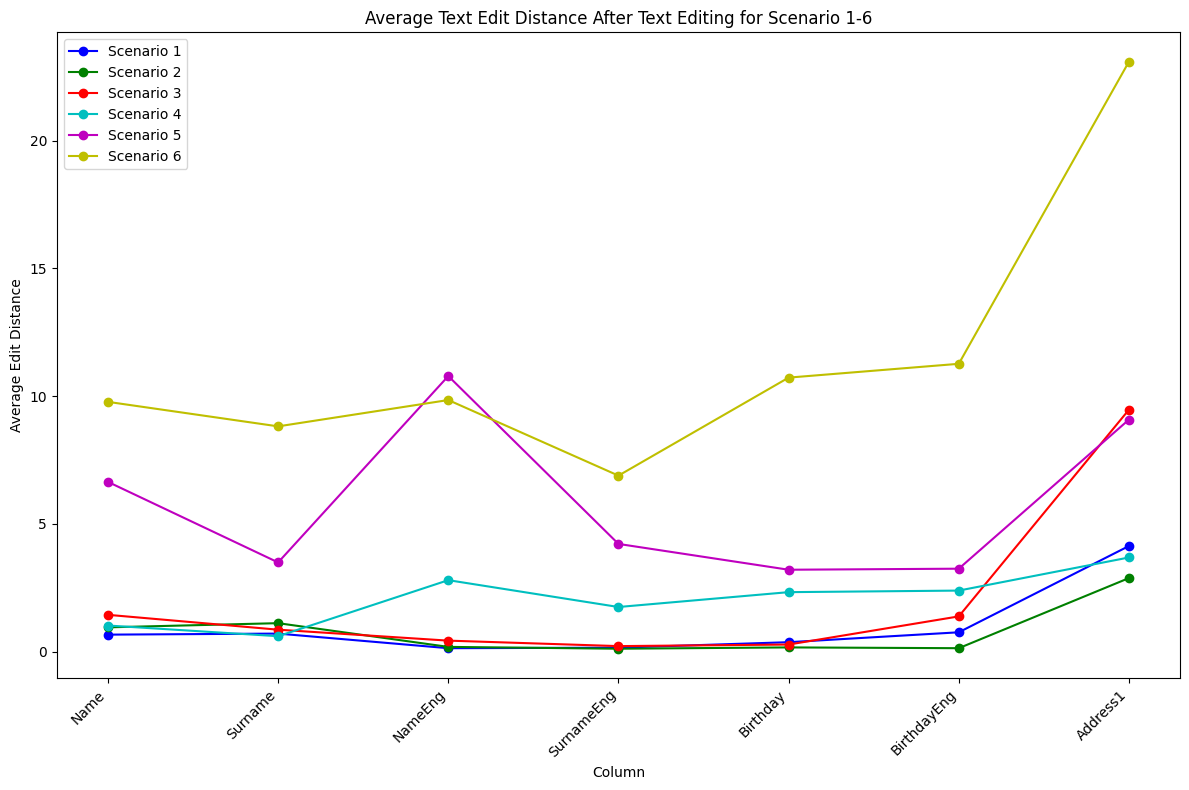

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# สร้าง DataFrame เพื่อรวมข้อมูลจากทั้งหก scenario
all_edit_distances = pd.DataFrame()

# วนลูป scenario1 - scenario6
for scenario_num in range(1, 7):
    # อ่านไฟล์ Excel
    file_path = f'(After)Text_Edit_Distance_Scenario{scenario_num}.xlsx'
    edit_distances = pd.read_excel(file_path)

    # เพิ่มคอลัมน์ 'Scenario' เพื่อระบุ scenario ที่ข้อมูลนี้มาจาก
    edit_distances['Scenario'] = f'Scenario {scenario_num}'

    # รวมข้อมูลลงใน DataFrame ที่สร้างขึ้น
    all_edit_distances = pd.concat([all_edit_distances, edit_distances])

# พล็อตกราฟเส้น
plt.figure(figsize=(12, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y']  # สีของแต่ละ scenario
for scenario_num, color in zip(range(1, 7), colors):
    scenario_data = all_edit_distances[all_edit_distances['Scenario'] == f'Scenario {scenario_num}']
    plt.plot(scenario_data['Column'], scenario_data['Average'], marker='o', linestyle='-', color=color, label=f'Scenario {scenario_num}')

plt.title('Average Text Edit Distance After Text Editing for Scenario 1-6')
plt.xlabel('Column')
plt.ylabel('Average Edit Distance')
plt.xticks(rotation=45, ha='right')  # หมุนแกน x 45 องศา
plt.legend()  # เพิ่มป้ายชื่อ scenario
plt.tight_layout()

# แสดงกราฟ
plt.show()

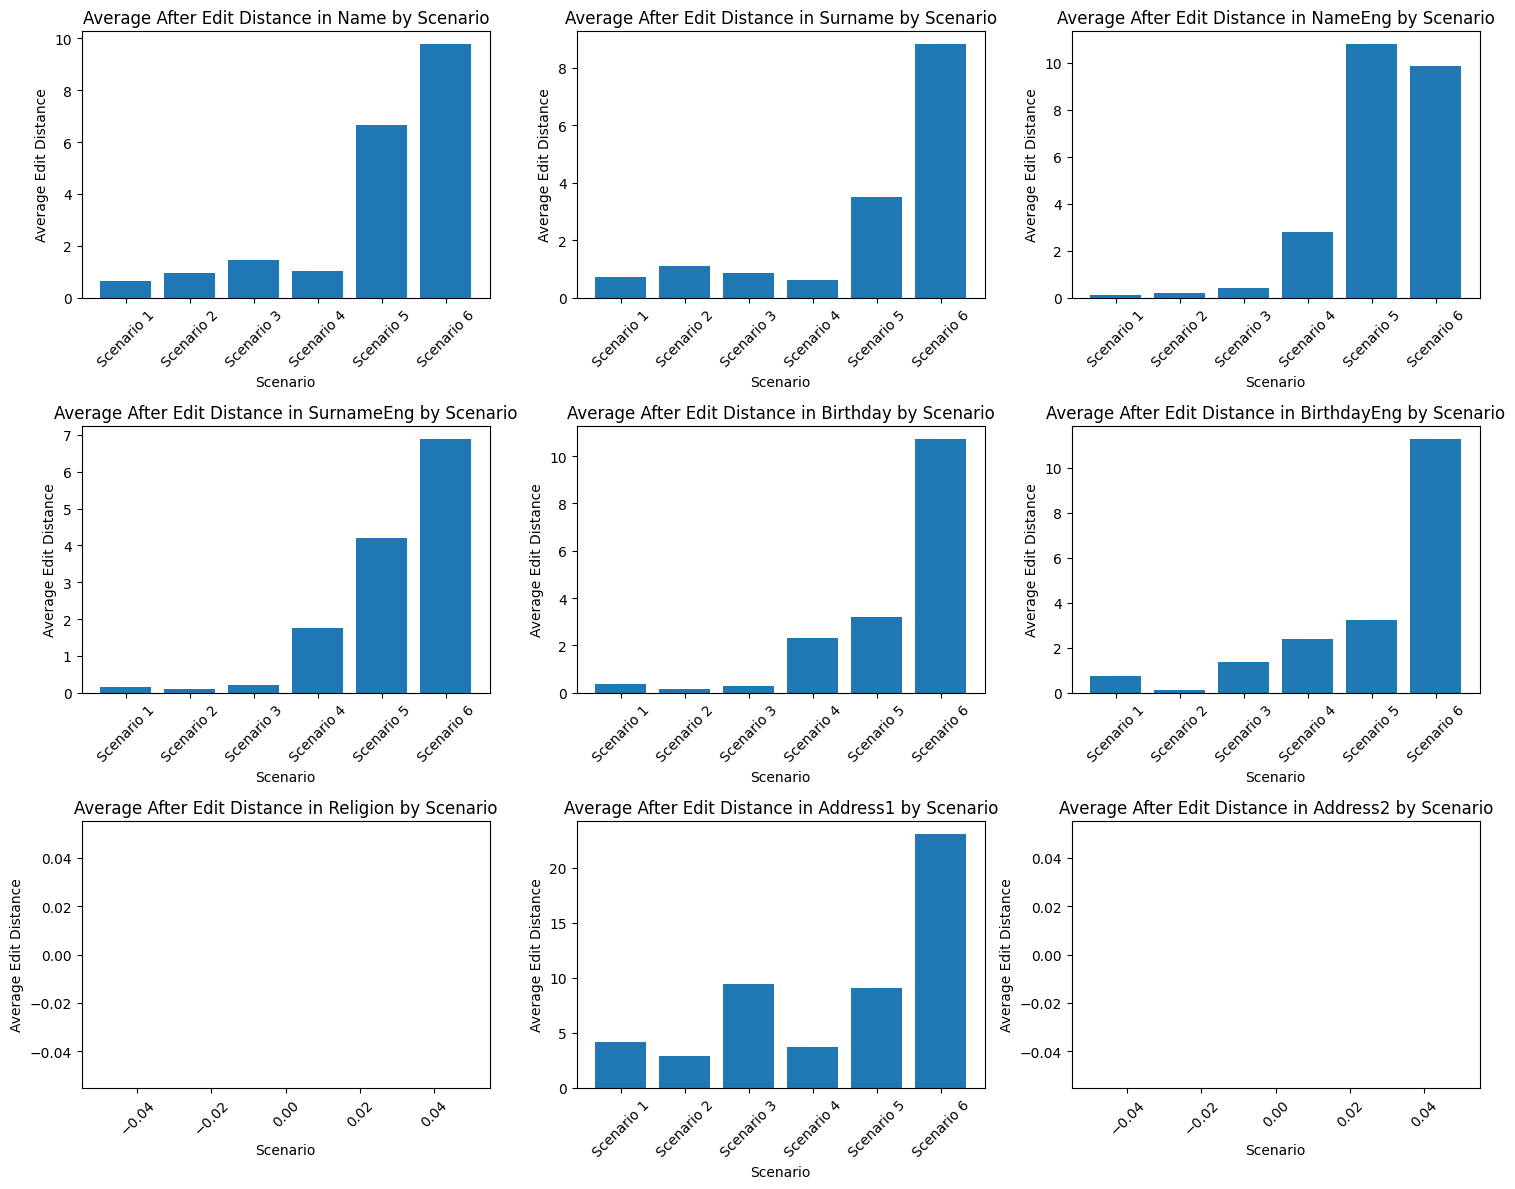

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# สร้าง DataFrame เพื่อรวมข้อมูลจากทั้งหก scenario
all_edit_distances = pd.DataFrame()

# วนลูป scenario1 - scenario6
for scenario_num in range(1, 7):
    # อ่านไฟล์ Excel
    file_path = f'(After)Text_Edit_Distance_Scenario{scenario_num}.xlsx'
    edit_distances = pd.read_excel(file_path)

    # เลือกข้อมูลที่เป็น 'Name' เท่านั้น
    name_edit_distances = edit_distances[edit_distances['Column'].isin(['Name', 'Surname', 'NameEng', 'SurnameEng', 'Birthday', 'BirthdayEng', 'Religion', 'Address1'])]

    # เพิ่มคอลัมน์ 'Scenario' เพื่อระบุ scenario ที่ข้อมูลนี้มาจาก
    name_edit_distances['Scenario'] = f'Scenario {scenario_num}'

    # รวมข้อมูลลงใน DataFrame ที่สร้างขึ้น
    all_edit_distances = pd.concat([all_edit_distances, name_edit_distances])

# พล็อตกราฟแท่งสำหรับแต่ละ Column
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12), sharex=False)

columns = ['Name', 'Surname', 'NameEng', 'SurnameEng', 'Birthday', 'BirthdayEng', 'Religion', 'Address1', 'Address2']
for ax, column in zip(axes.flatten(), columns):
    ax.bar(all_edit_distances[all_edit_distances['Column'] == column]['Scenario'], all_edit_distances[all_edit_distances['Column'] == column]['Average'])
    ax.set_title(f'Average After Edit Distance in {column} by Scenario')
    ax.set_xlabel('Scenario')
    ax.set_ylabel('Average Edit Distance')
    ax.tick_params(axis='x', rotation=45)  # แกน x หมุน 45 องศา

plt.tight_layout()
plt.show()

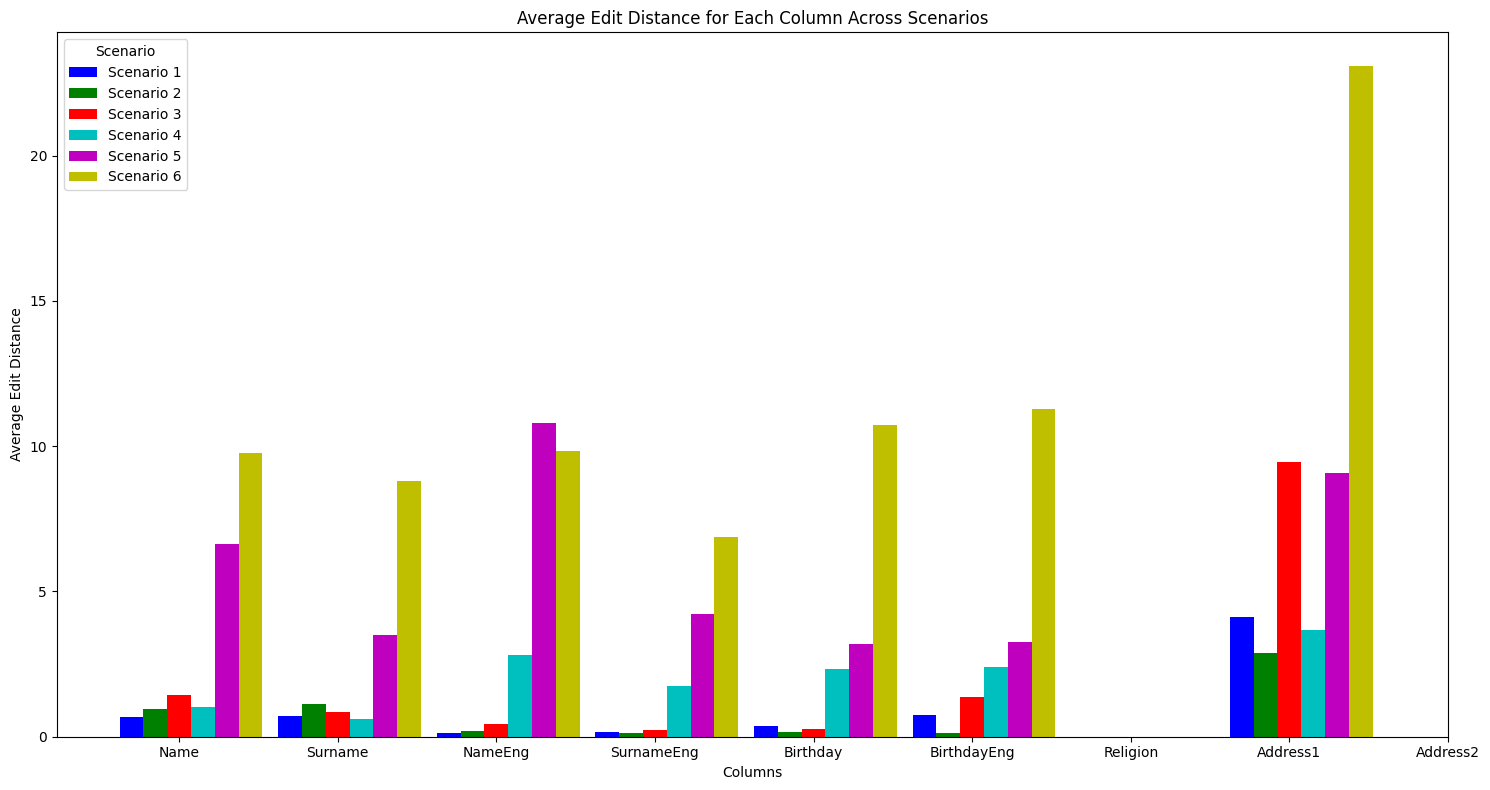

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame to combine data from all six scenarios
all_edit_distances = pd.DataFrame()

# Loop through scenario1 - scenario6
for scenario_num in range(1, 7):
    # Read Excel file
    file_path = f'(After)Text_Edit_Distance_Scenario{scenario_num}.xlsx'
    edit_distances = pd.read_excel(file_path)

    # Select data for 'Name' only
    name_edit_distances = edit_distances[edit_distances['Column'].isin(['Name', 'Surname', 'NameEng', 'SurnameEng', 'Birthday', 'BirthdayEng', 'Religion', 'Address1'])]

    # Add 'Scenario' column to specify the scenario from which this data comes
    name_edit_distances['Scenario'] = f'Scenario {scenario_num}'

    # Concatenate data into the created DataFrame
    all_edit_distances = pd.concat([all_edit_distances, name_edit_distances])

# Plot a single column chart for all columns
fig, ax = plt.subplots(figsize=(15, 8))

# Set color for each scenario
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Plot columns for each scenario
for j, scenario in enumerate(all_edit_distances['Scenario'].unique()):
    for i, column in enumerate(columns):
        scenario_data = all_edit_distances[(all_edit_distances['Column'] == column) & (all_edit_distances['Scenario'] == scenario)]
        ax.bar(x=i + j * 0.15, height=scenario_data['Average'], width=0.15, color=colors[j], label=f'{scenario}' if i == 0 else '')

# Set plot labels and title
ax.set_xticks([i + 0.3 for i in range(len(columns))])
ax.set_xticklabels(columns)
ax.set_xlabel('Columns')
ax.set_ylabel('Average Edit Distance')
ax.set_title('Average Edit Distance for Each Column Across Scenarios')
ax.legend(title='Scenario')

plt.tight_layout()
plt.show()

<ipython-input-48-11c3aa9399b9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_edit_distances['Scenario'] = f'Scenario {scenario_num}'
<ipython-input-48-11c3aa9399b9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_edit_distances['Scenario'] = f'Scenario {scenario_num}'
<ipython-input-48-11c3aa9399b9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

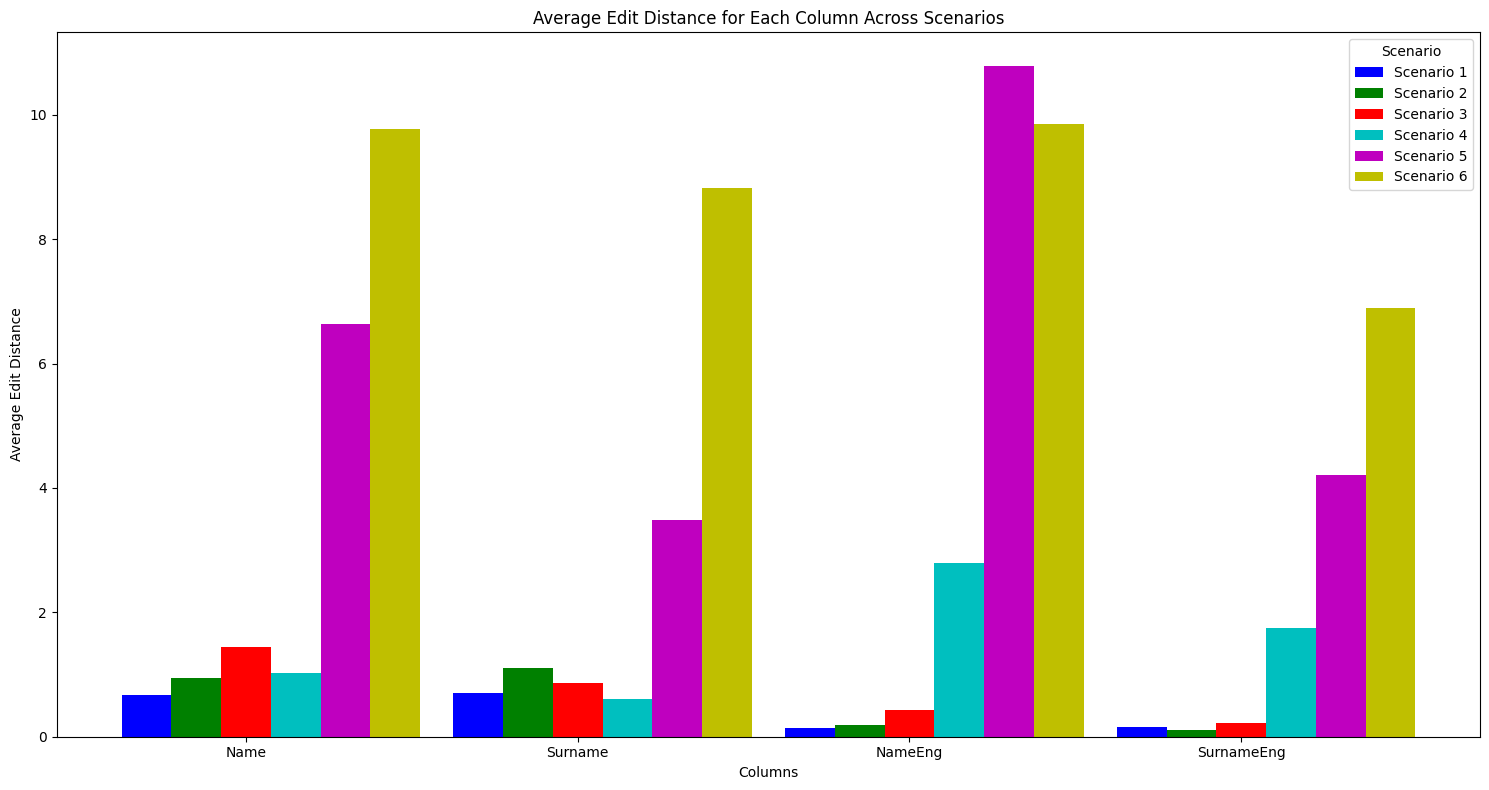

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame to combine data from all six scenarios
all_edit_distances = pd.DataFrame()

# Loop through scenario1 - scenario6
for scenario_num in range(1, 7):
    # Read Excel file
    file_path = f'(After)Text_Edit_Distance_Scenario{scenario_num}.xlsx'
    edit_distances = pd.read_excel(file_path)

    # Select data for 'Name' only
    name_edit_distances = edit_distances[edit_distances['Column'].isin(['Name', 'Surname', 'NameEng', 'SurnameEng'])]

    # Add 'Scenario' column to specify the scenario from which this data comes
    name_edit_distances['Scenario'] = f'Scenario {scenario_num}'

    # Concatenate data into the created DataFrame
    all_edit_distances = pd.concat([all_edit_distances, name_edit_distances])

# Define columns based on unique values in the 'Column' column
columns = all_edit_distances['Column'].unique()

# Plot a grouped bar chart for each column
fig, ax = plt.subplots(figsize=(15, 8))

# Set color for each scenario
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Plot columns for each scenario
for j, scenario in enumerate(all_edit_distances['Scenario'].unique()):
    for i, column in enumerate(columns):
        scenario_data = all_edit_distances[(all_edit_distances['Column'] == column) & (all_edit_distances['Scenario'] == scenario)]
        ax.bar(x=i + j * 0.15, height=scenario_data['Average'], width=0.15, color=colors[j], label=f'{scenario}' if i == 0 else '')

# Set plot labels and title
ax.set_xticks([i + 0.3 for i in range(len(columns))])
ax.set_xticklabels(columns)
ax.set_xlabel('Columns')
ax.set_ylabel('Average Edit Distance')
ax.set_title('Average Edit Distance for Each Column Across Scenarios')
ax.legend(title='Scenario')

plt.tight_layout()
plt.show()

<ipython-input-49-d2301c78076d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_edit_distances['Scenario'] = f'Scenario {scenario_num}'
<ipython-input-49-d2301c78076d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_edit_distances['Scenario'] = f'Scenario {scenario_num}'
<ipython-input-49-d2301c78076d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

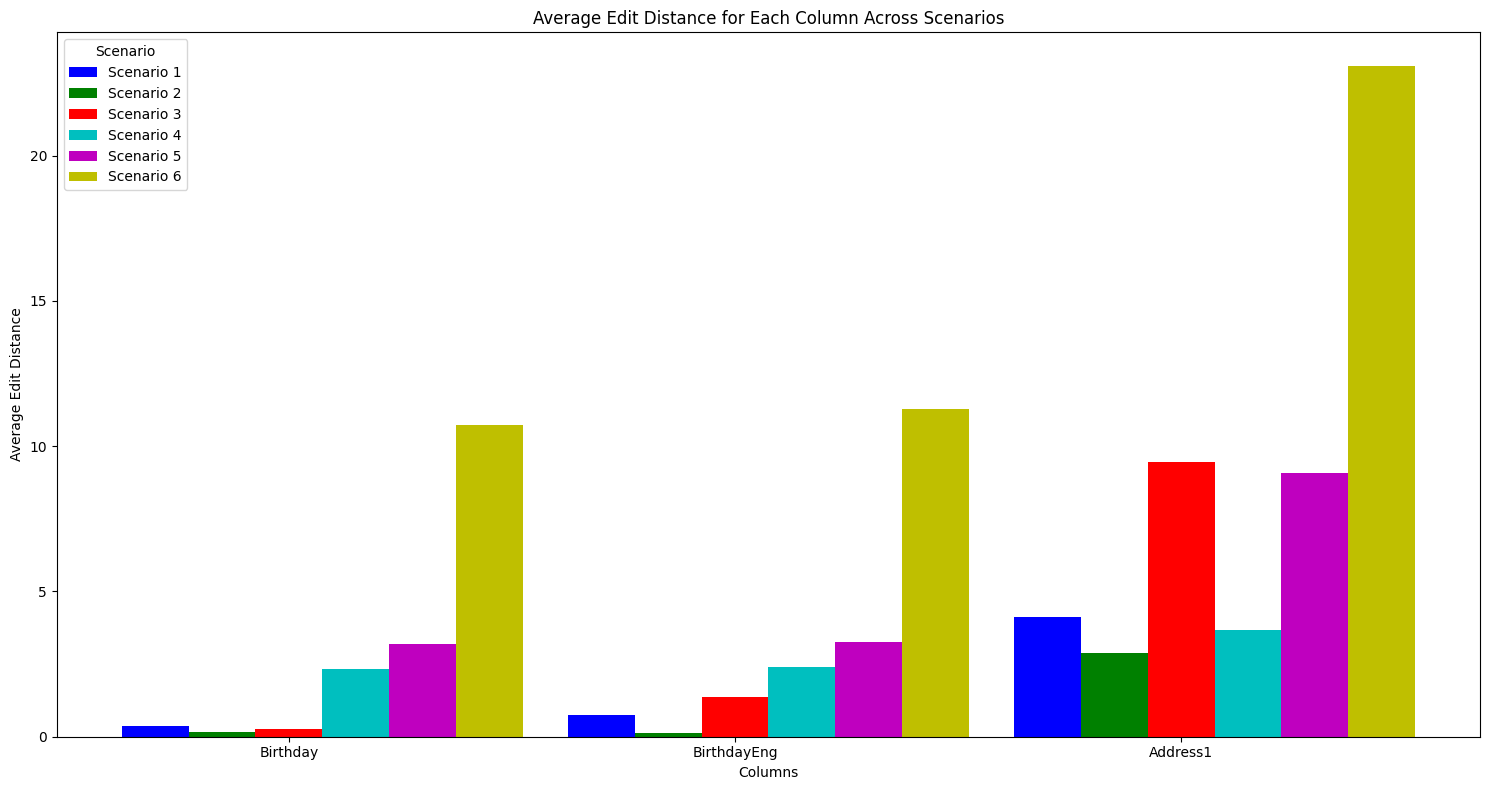

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame to combine data from all six scenarios
all_edit_distances = pd.DataFrame()

# Loop through scenario1 - scenario6
for scenario_num in range(1, 7):
    # Read Excel file
    file_path = f'(After)Text_Edit_Distance_Scenario{scenario_num}.xlsx'
    edit_distances = pd.read_excel(file_path)

    # Select data for 'Name' only
    name_edit_distances = edit_distances[edit_distances['Column'].isin(['Birthday', 'BirthdayEng', 'Religion', 'Address1'])]

    # Add 'Scenario' column to specify the scenario from which this data comes
    name_edit_distances['Scenario'] = f'Scenario {scenario_num}'

    # Concatenate data into the created DataFrame
    all_edit_distances = pd.concat([all_edit_distances, name_edit_distances])

# Define columns based on unique values in the 'Column' column
columns = all_edit_distances['Column'].unique()

# Plot a grouped bar chart for each column
fig, ax = plt.subplots(figsize=(15, 8))

# Set color for each scenario
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Plot columns for each scenario
for j, scenario in enumerate(all_edit_distances['Scenario'].unique()):
    for i, column in enumerate(columns):
        scenario_data = all_edit_distances[(all_edit_distances['Column'] == column) & (all_edit_distances['Scenario'] == scenario)]
        ax.bar(x=i + j * 0.15, height=scenario_data['Average'], width=0.15, color=colors[j], label=f'{scenario}' if i == 0 else '')

# Set plot labels and title
ax.set_xticks([i + 0.3 for i in range(len(columns))])
ax.set_xticklabels(columns)
ax.set_xlabel('Columns')
ax.set_ylabel('Average Edit Distance')
ax.set_title('Average Edit Distance for Each Column Across Scenarios')
ax.legend(title='Scenario')

plt.tight_layout()
plt.show()

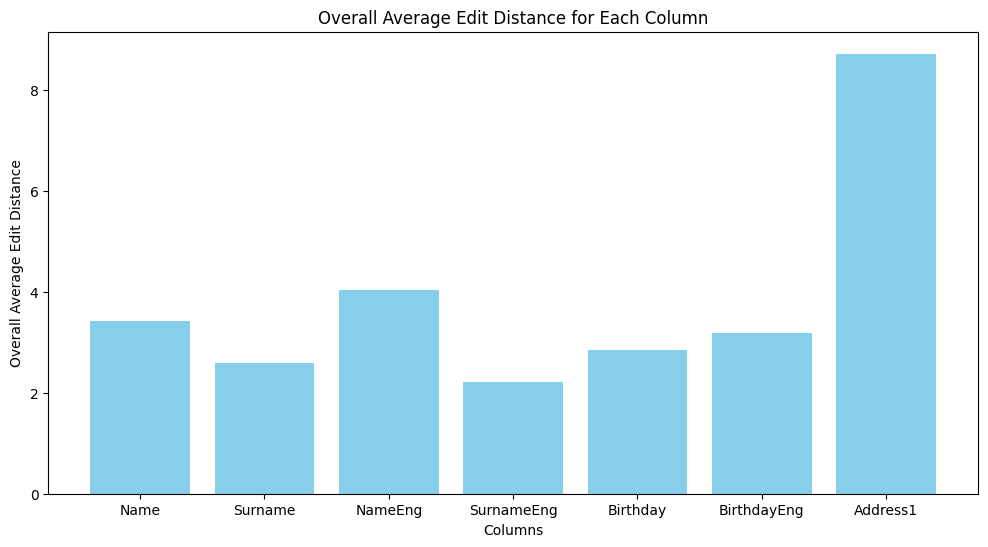

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the overall averages from the Excel file
overall_average_df = pd.read_excel('(After)Overall_Averages_Counts_scenario1-6.xlsx')

# Plot a bar graph
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(overall_average_df['Column'], overall_average_df['Overall Average'], color='skyblue')
ax.set_ylabel('Overall Average Edit Distance')
ax.set_xlabel('Columns')
ax.set_title('Overall Average Edit Distance for Each Column')

plt.show()

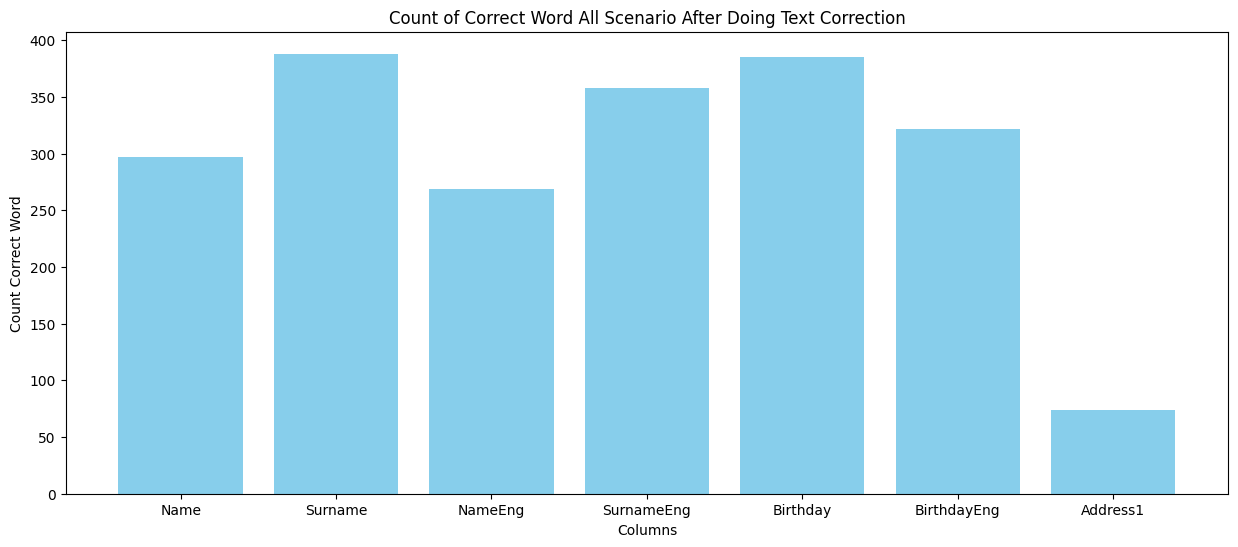

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the overall averages from the Excel file
overall_average_df = pd.read_excel('(After)Overall_Averages_Counts_scenario1-6.xlsx')

# Plot a bar graph
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(overall_average_df['Column'], overall_average_df['Count 0'], color='skyblue')
ax.set_ylabel('Count Correct Word')
ax.set_xlabel('Columns')
ax.set_title('Count of Correct Word All Scenario After Doing Text Correction')

plt.show()

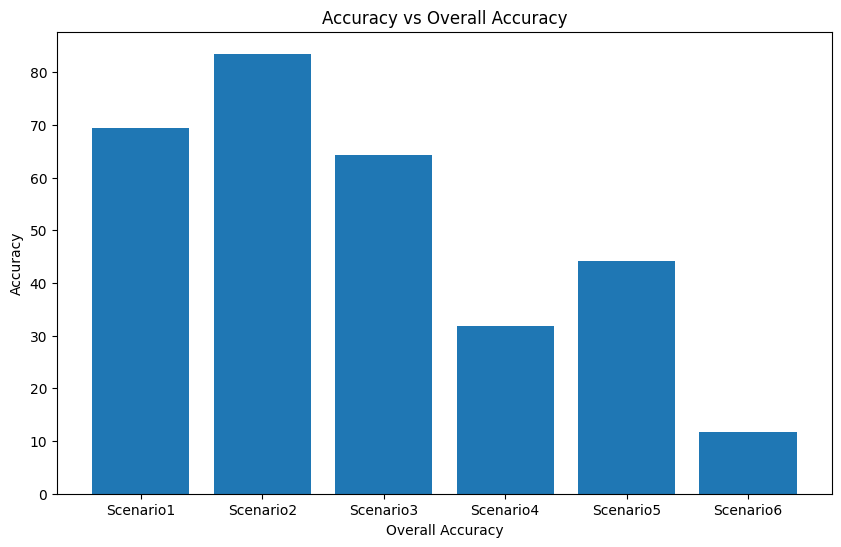

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดข้อมูลจาก Excel
df = pd.read_excel('(After)Accuracy.xlsx')

# สร้างกราฟแท่ง
plt.figure(figsize=(10, 6))
plt.bar(df['Scenario'], df['Overall_Accuracy'])
plt.xlabel('Overall Accuracy')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Overall Accuracy')
plt.grid(False)
plt.show()


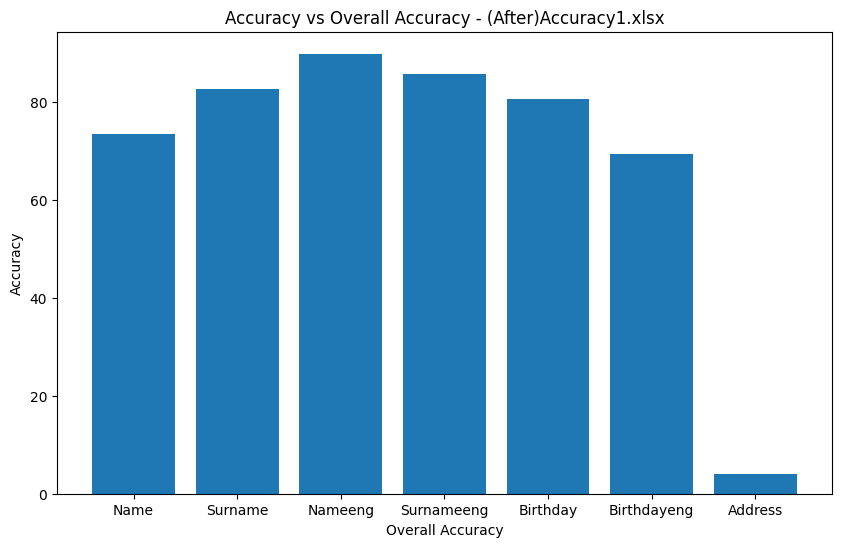

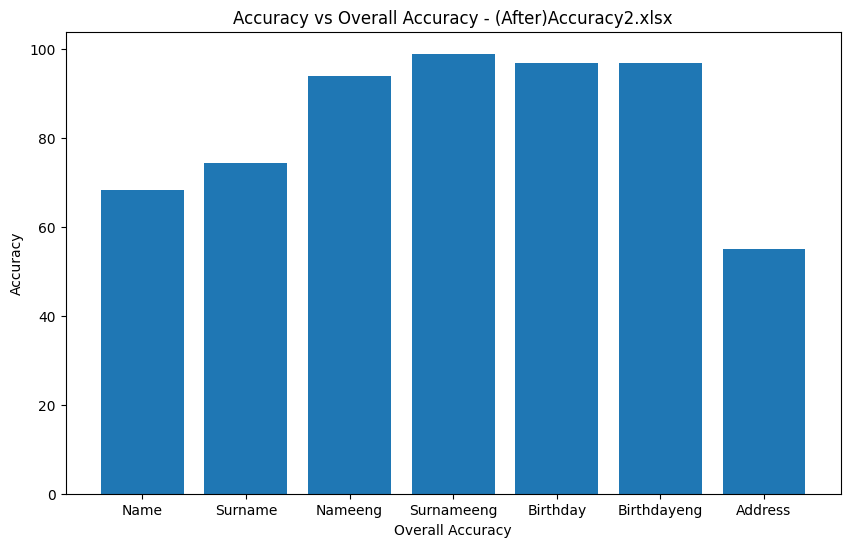

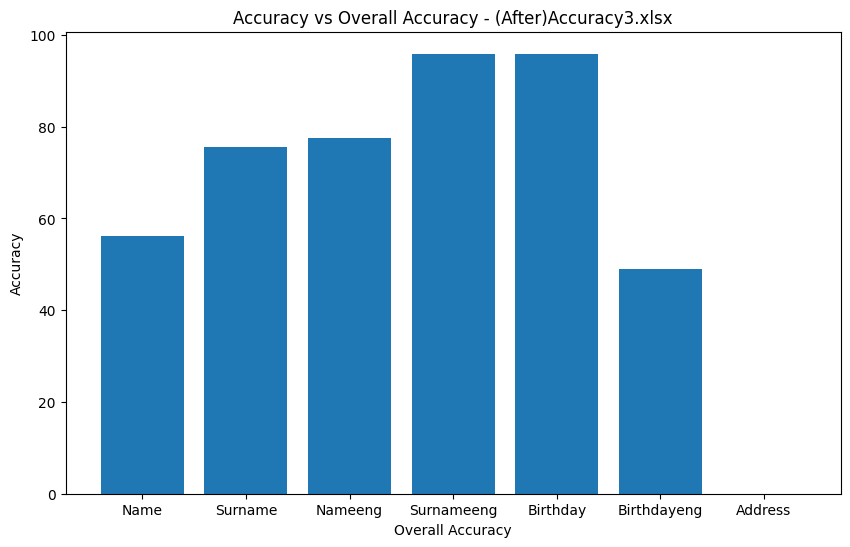

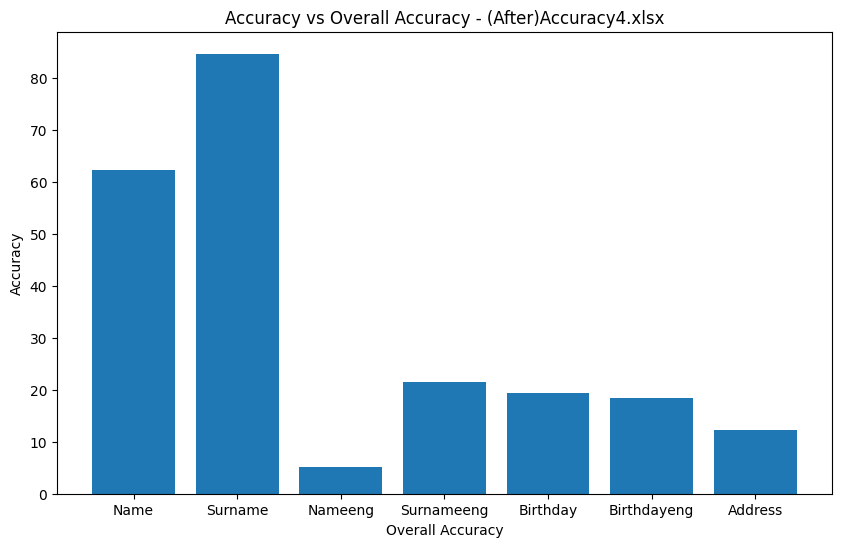

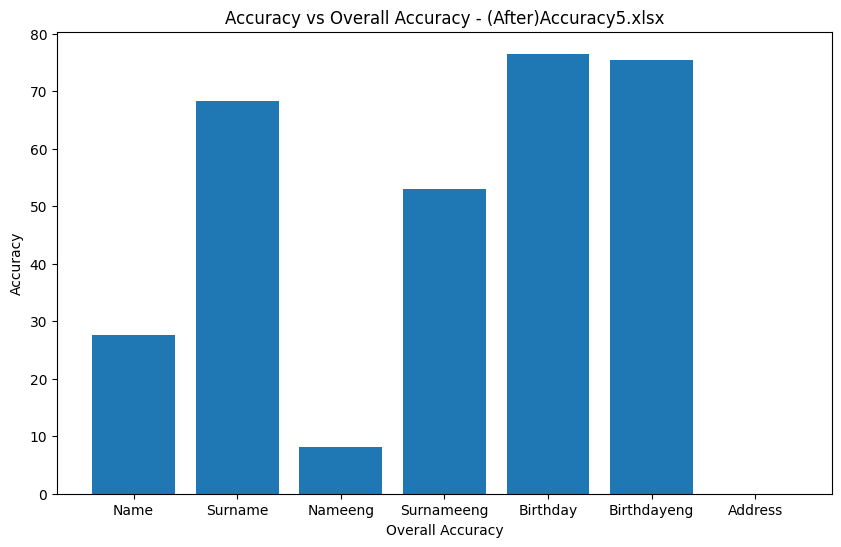

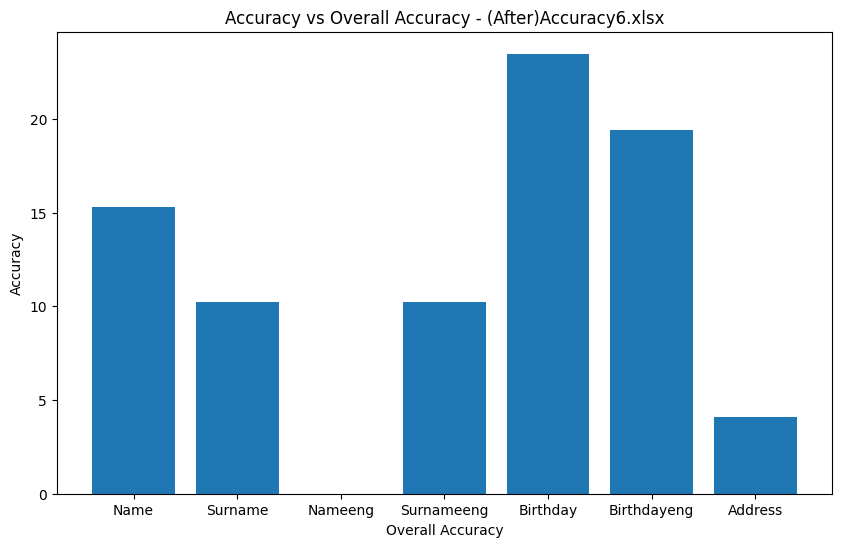

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

for i in range(1, 7):
    filename = f'(After)Accuracy{i}.xlsx'
    df = pd.read_excel(filename)

    plt.figure(figsize=(10, 6))
    plt.bar(df['Column'], df['Overall Accuracy'])
    plt.xlabel('Overall Accuracy')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs Overall Accuracy - {filename}')
    plt.grid(False)
    plt.show()

# **Compare Before and after**

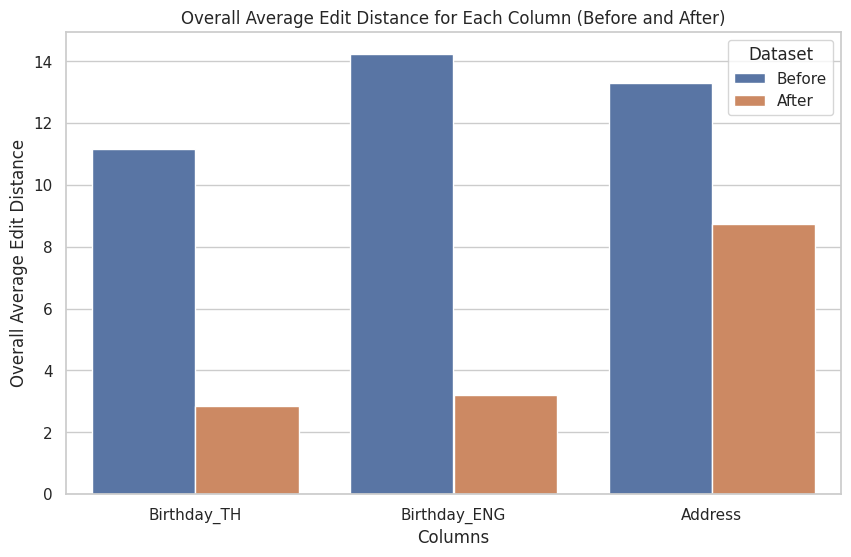

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the overall averages from the Excel files
overall_average_df_before = pd.read_excel('Overall_Averages_Counts_scenario1-6.xlsx')
overall_average_df_after = pd.read_excel('(After)Overall_Averages_Counts_scenario1-6.xlsx')

# Select only the desired columns
selected_columns = ['Name_TH', 'Surname_TH', 'Name_ENG', 'Surname_ENG', 'Birthday_TH', 'Birthday_ENG', 'Address']
overall_average_df_before_selected = overall_average_df_before[overall_average_df_before['Column'].isin(selected_columns)]
overall_average_df_after_selected = overall_average_df_after[overall_average_df_after['Column'].isin(selected_columns)]

# Combine the dataframes for plotting
combined_df = pd.concat([overall_average_df_before_selected.assign(dataset='Before'),
                        overall_average_df_after_selected.assign(dataset='After')])

# Set the style
sns.set(style="whitegrid")

# Plot the bar graph using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='Overall Average', hue='dataset', data=combined_df, palette='deep')

plt.ylabel('Overall Average Edit Distance')
plt.xlabel('Columns')
plt.title('Overall Average Edit Distance for Each Column (Before and After)')
plt.legend(title='Dataset')
plt.savefig('Overall Average Edit Distance for Each Column (Before and After)')
plt.show()


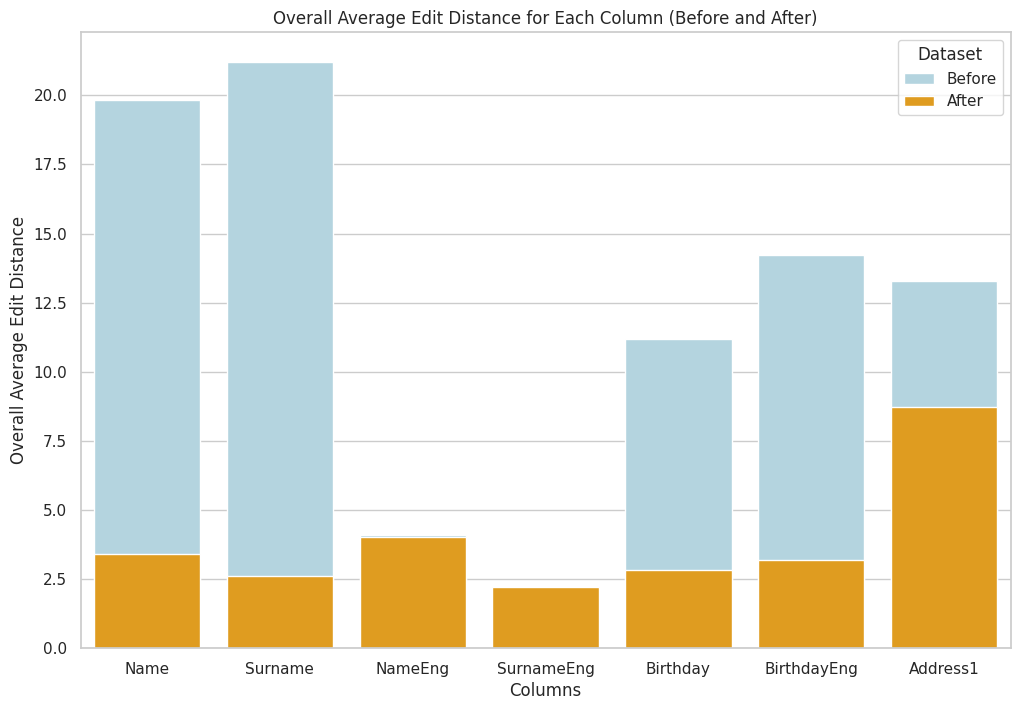

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the overall averages from the Excel files
overall_average_df_before = pd.read_excel('Overall_Averages_Counts_scenario1-6.xlsx')
overall_average_df_after = pd.read_excel('(After)Overall_Averages_Counts_scenario1-6.xlsx')

# Combine the dataframes
overall_average_df_before['Dataset'] = 'Before'
overall_average_df_after['Dataset'] = 'After'
combined_df = pd.concat([overall_average_df_before, overall_average_df_after])

# Set the Seaborn style
sns.set(style='whitegrid')

# Plot a combined stacked bar graph using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Column', y='Overall Average', hue='Dataset', data=combined_df, palette=['lightblue', 'orange'], dodge=False)

plt.ylabel('Overall Average Edit Distance')
plt.xlabel('Columns')
plt.title('Overall Average Edit Distance for Each Column (Before and After)')
plt.savefig('Overall Average Edit Distance for Each Column (Before and After)V2')
plt.show()

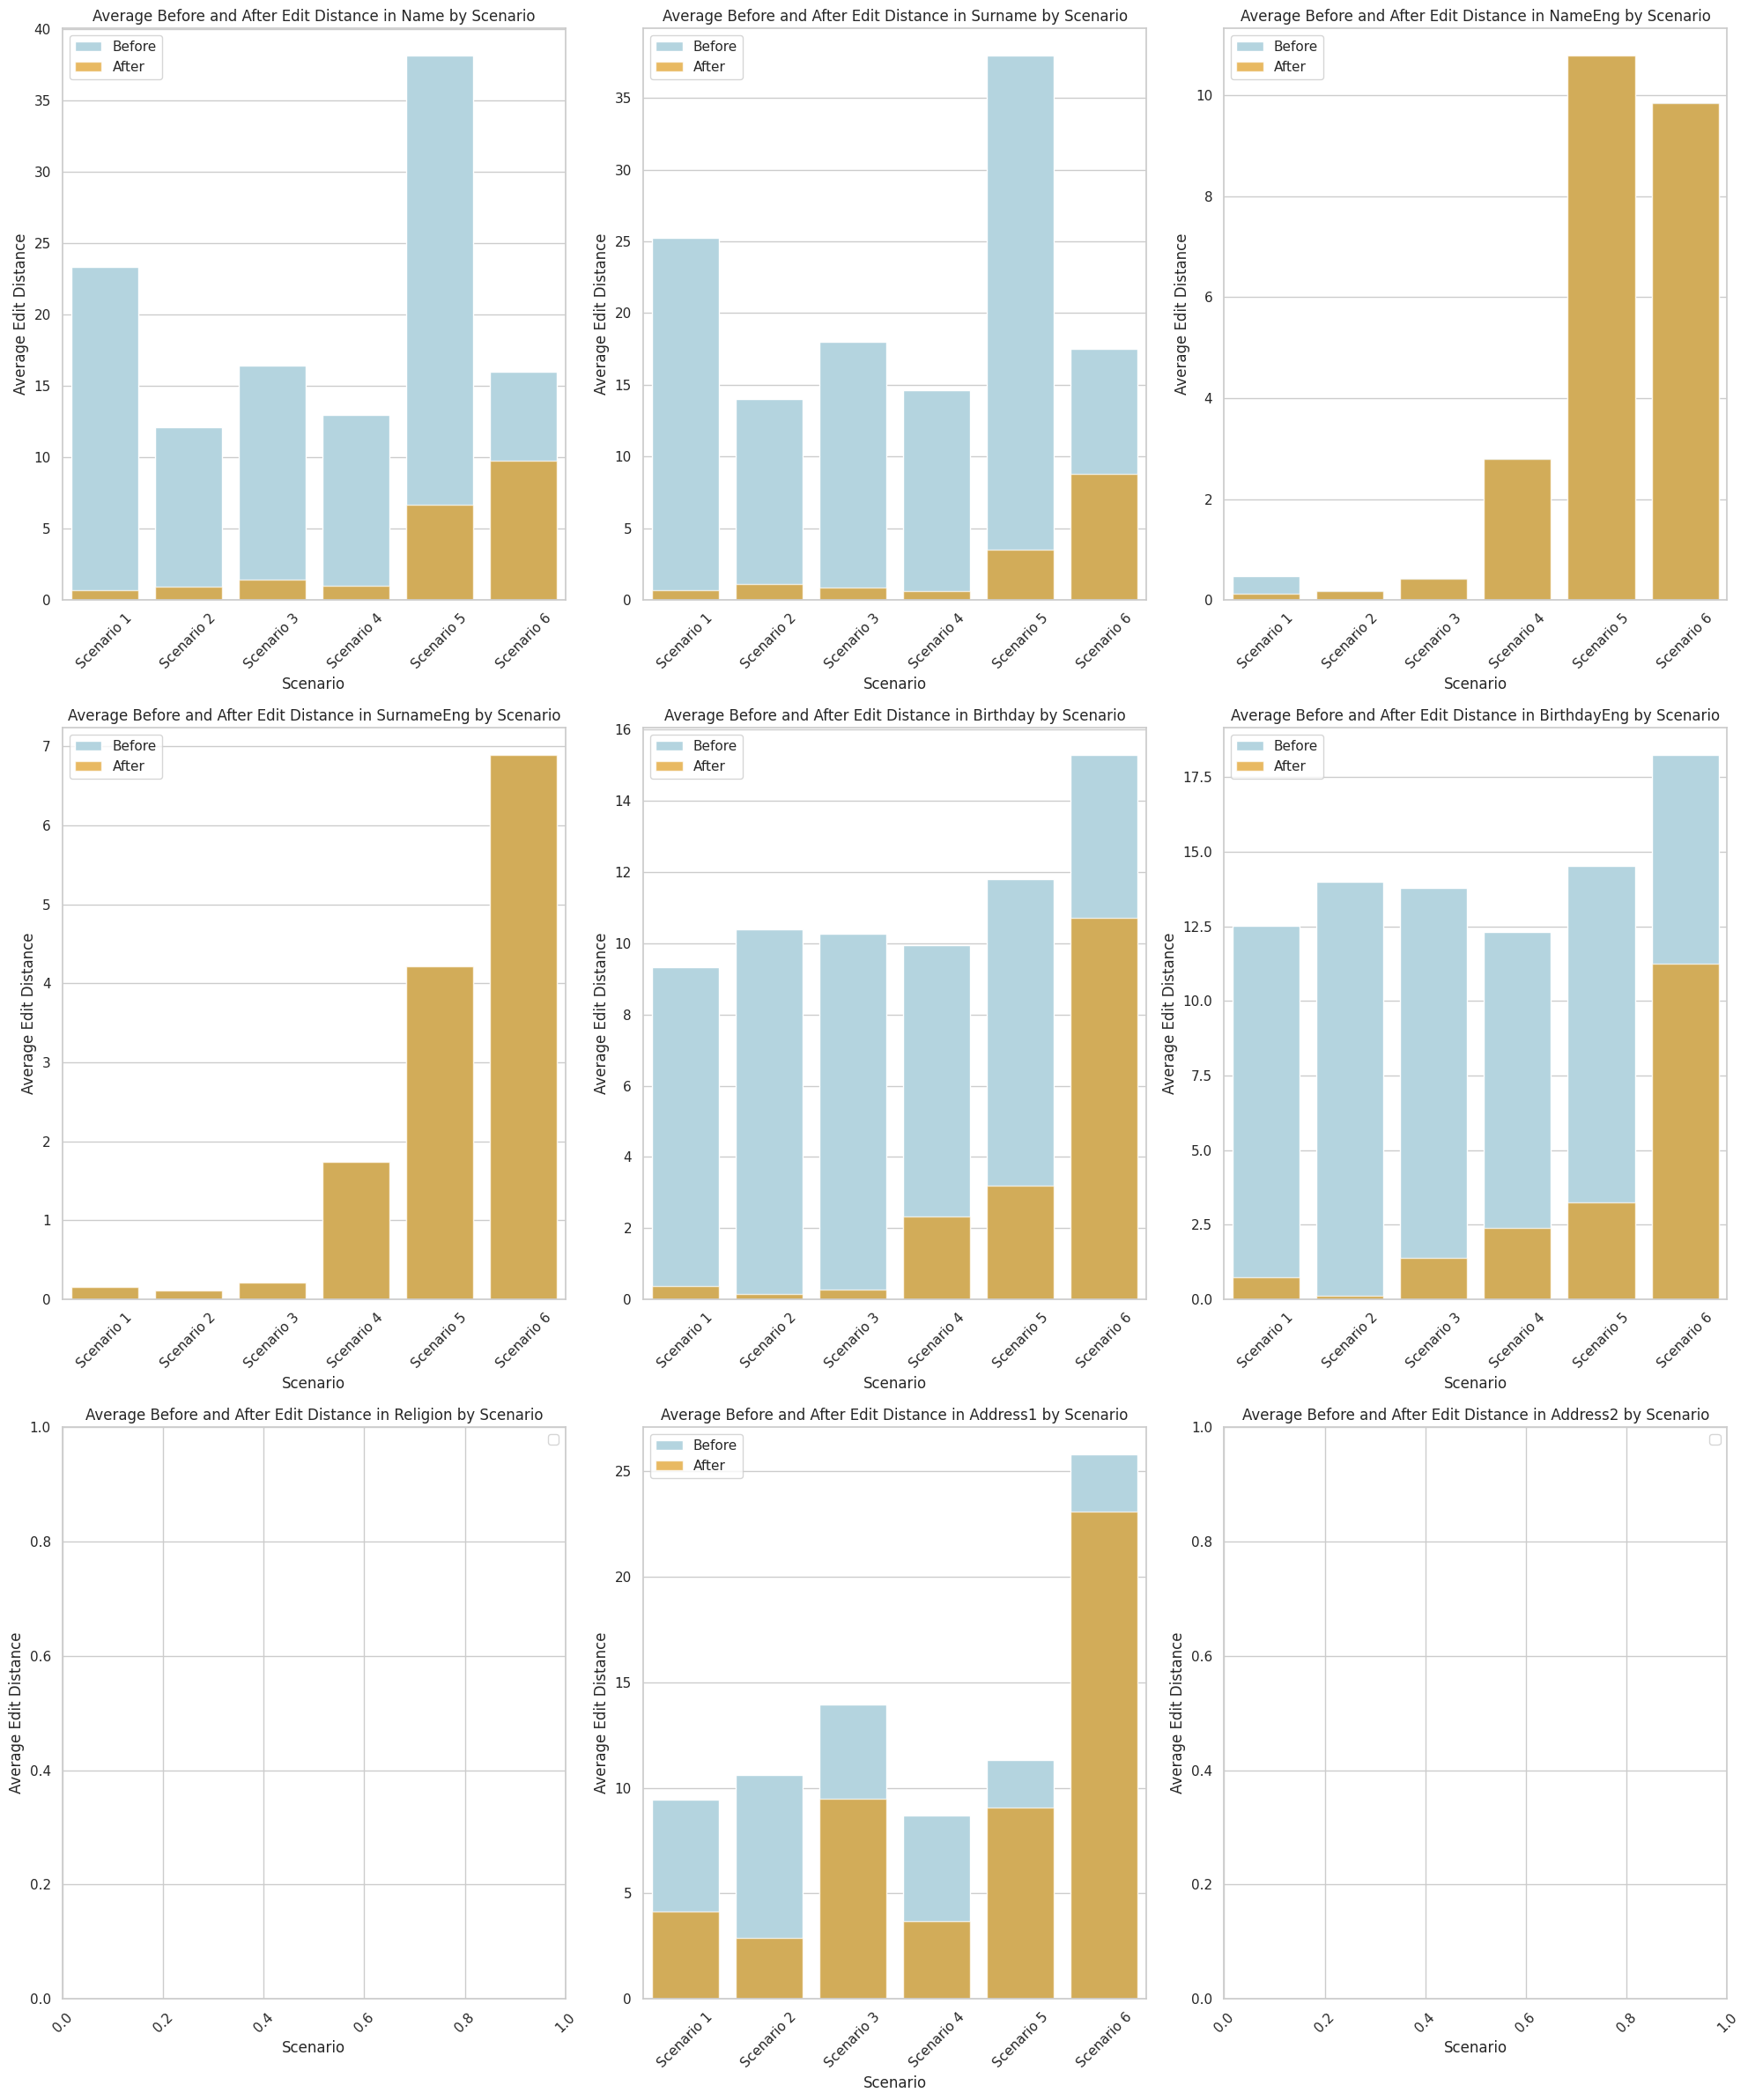

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# สร้าง DataFrame เพื่อรวมข้อมูลจากทั้งหก scenario
all_edit_distances_before = pd.DataFrame()
all_edit_distances_after = pd.DataFrame()

# วนลูป scenario1 - scenario6
for scenario_num in range(1, 7):
    # อ่านไฟล์ Excel Before
    file_path_before = f'Text_Edit_Distance_Scenario{scenario_num}.xlsx'
    edit_distances_before = pd.read_excel(file_path_before)

    # อ่านไฟล์ Excel After
    file_path_after = f'(After)Text_Edit_Distance_Scenario{scenario_num}.xlsx'
    edit_distances_after = pd.read_excel(file_path_after)

    # เลือกข้อมูลที่เป็น 'Name' เท่านั้น และเพิ่ม Column 'Scenario'
    name_edit_distances_before = edit_distances_before[edit_distances_before['Column'].isin(['Name', 'Surname', 'NameEng', 'SurnameEng', 'Birthday', 'BirthdayEng', 'Religion', 'Address1', 'Address2'])]
    name_edit_distances_before['Scenario'] = f'Scenario {scenario_num}'
    name_edit_distances_after = edit_distances_after[edit_distances_after['Column'].isin(['Name', 'Surname', 'NameEng', 'SurnameEng', 'Birthday', 'BirthdayEng', 'Religion', 'Address1', 'Address2'])]
    name_edit_distances_after['Scenario'] = f'Scenario {scenario_num}'

    # รวมข้อมูลลงใน DataFrame ที่สร้างขึ้น
    all_edit_distances_before = pd.concat([all_edit_distances_before, name_edit_distances_before])
    all_edit_distances_after = pd.concat([all_edit_distances_after, name_edit_distances_after])

# Plot a combined stacked bar graph
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 24), sharex=False)

columns = ['Name', 'Surname', 'NameEng', 'SurnameEng', 'Birthday', 'BirthdayEng', 'Religion', 'Address1', 'Address2']
for ax, column in zip(axes.flatten(), columns):
    # แยกข้อมูล Before และ After ในแต่ละ Column
    data_before = all_edit_distances_before[all_edit_distances_before['Column'] == column]
    data_after = all_edit_distances_after[all_edit_distances_after['Column'] == column]

    # Merge ข้อมูล Before และ After เข้าด้วยกัน
    merged_data = pd.merge(data_before, data_after, on=['Scenario'], suffixes=('_Before', '_After'))

    # พล็อตกราฟแท่งแบบซ้อนกัน (stacked bar graph)
    sns.barplot(x='Scenario', y='Average_Before', data=merged_data, color='lightblue', ax=ax, label='Before')
    sns.barplot(x='Scenario', y='Average_After', data=merged_data, color='orange', ax=ax, label='After', alpha=0.7)

    # ตั้งชื่อกราฟ
    ax.set_title(f'Average Before and After Edit Distance in {column} by Scenario')
    ax.set_xlabel('Scenario')
    ax.set_ylabel('Average Edit Distance')
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

plt.tight_layout()
plt.show()


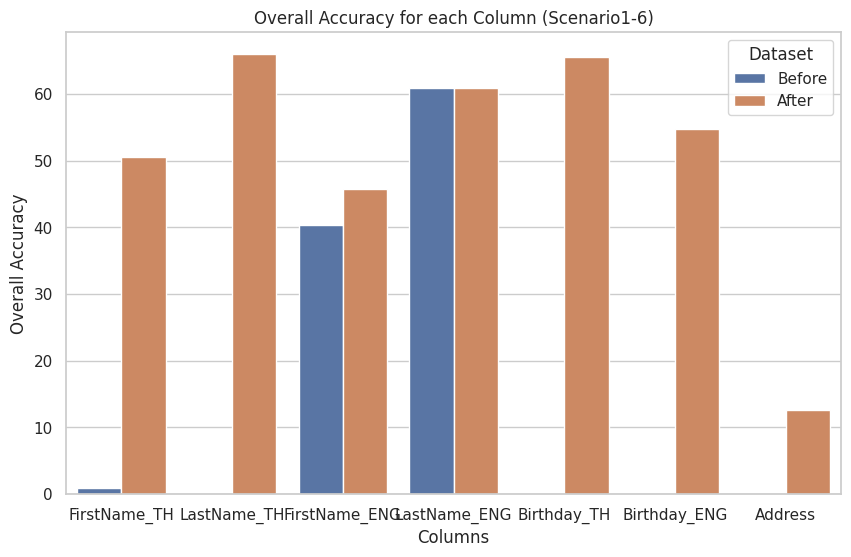

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the overall averages from the Excel files
overall_average_df_before = pd.read_excel('Overall_Averages_Counts_scenario1-6.xlsx')
overall_average_df_after = pd.read_excel('(After)Overall_Averages_Counts_scenario1-6.xlsx')

# Combine the "Before" and "After" dataframes for plotting
combined_df = pd.concat([overall_average_df_before.assign(dataset='Before'),
                        overall_average_df_after.assign(dataset='After')])

# Set the style
sns.set(style="whitegrid")

# Plot the combined bar graph using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='Percent', hue='dataset', data=combined_df, palette='deep')

# Set labels and title
plt.ylabel('Overall Accuracy')
plt.xlabel('Columns')
plt.title('Overall Accuracy for each Column (Scenario1-6)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add legend
plt.legend(title='Dataset')
plt.savefig('Overall Accuracy for each Column (Scenario1-6).png')
plt.show()


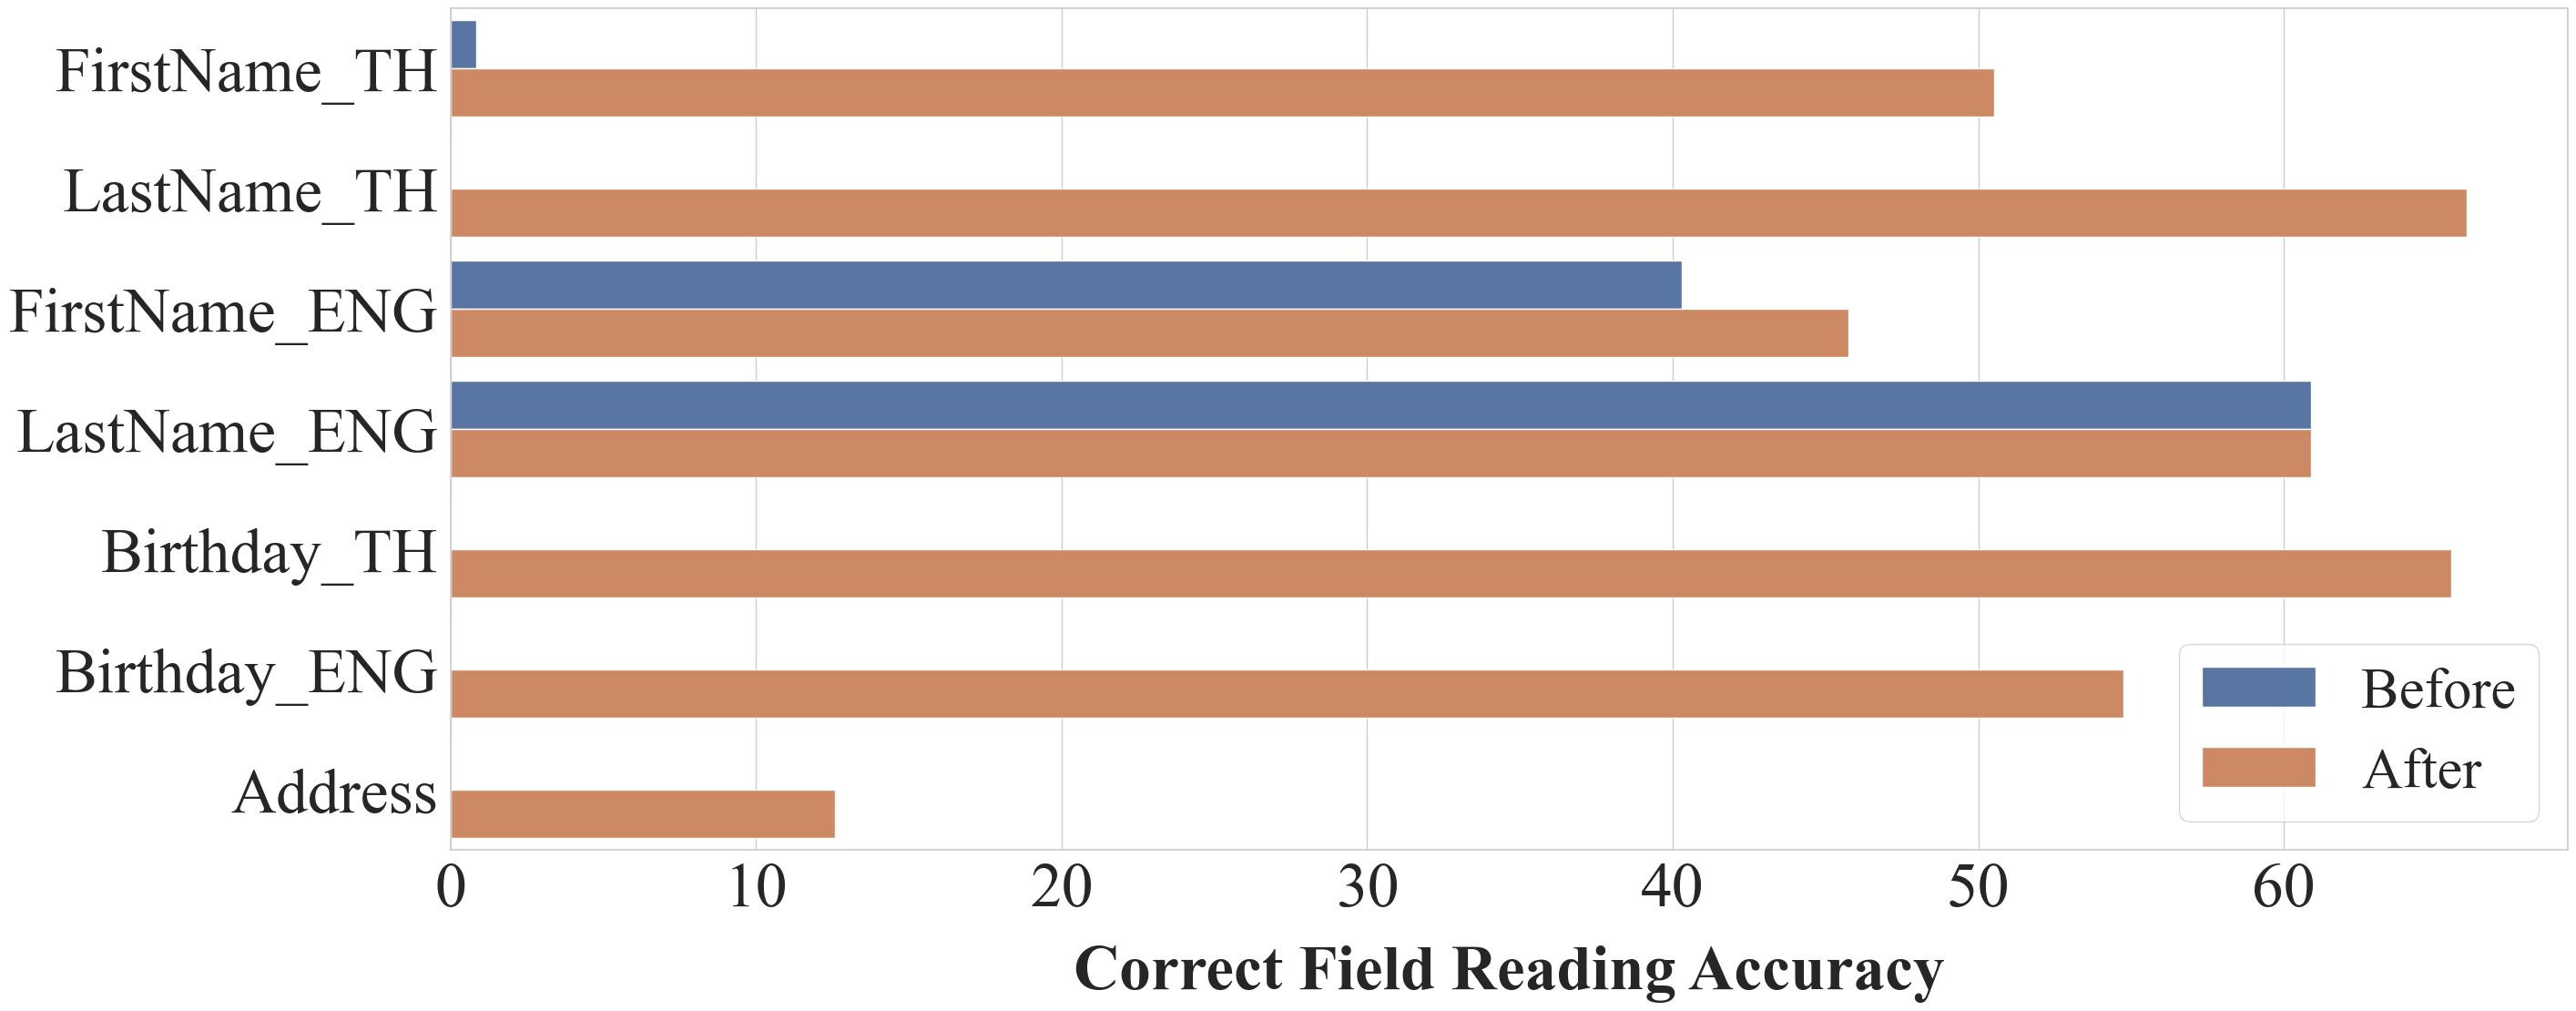

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.font_manager.fontManager.addfont('Times New Roman.ttf')
mpl.rc('font', family='Times New Roman')

mpl.font_manager.fontManager.addfont('/content/Times New Roman - Bold.ttf')
mpl.rc('font', family='Times New Roman')

# Read the overall averages from the Excel files
overall_average_df_before = pd.read_excel('Overall_Averages_Counts_scenario1-6.xlsx')
overall_average_df_after = pd.read_excel('(After)Overall_Averages_Counts_scenario1-6.xlsx')

# Combine the "Before" and "After" dataframes for plotting
combined_df = pd.concat([overall_average_df_before.assign(dataset='Before'),
                        overall_average_df_after.assign(dataset='After')])

# Set the style
sns.set(style="whitegrid")

# Plot the combined bar graph using Seaborn (horizontal bar plot)
plt.figure(figsize=(30, 12))
sns.barplot(x='Percent', y='Column', hue='dataset', data=combined_df, palette='deep')

# Set labels and title with increased font size and Times New Roman font family
plt.xlabel('Correct Field Reading Accuracy', fontsize=50, fontweight='bold', fontfamily='Times New Roman', labelpad=20)
plt.ylabel('', fontsize=50, fontweight='bold', fontfamily='Times New Roman')
# plt.title('Correct Field Reading Accuracy For Each Column (Scenario1-6)', fontsize=50, fontweight='bold', fontfamily='Times New Roman')

plt.xticks(fontsize=50, fontfamily='Times New Roman')
plt.yticks(fontsize=50, fontfamily='Times New Roman')

# Add legend with increased font size and Times New Roman font family
legend = plt.legend(fontsize=45, loc='lower right')
legend.get_title().set_fontfamily('Times New Roman')  # Set font family for legend title
for text in legend.texts:  # Set font family for legend items
    text.set_fontfamily('Times New Roman')

# Save the plot with a larger font size
plt.savefig('Overall Accuracy for each Column (Scenario1-6).png')

# Show the plot
plt.show()


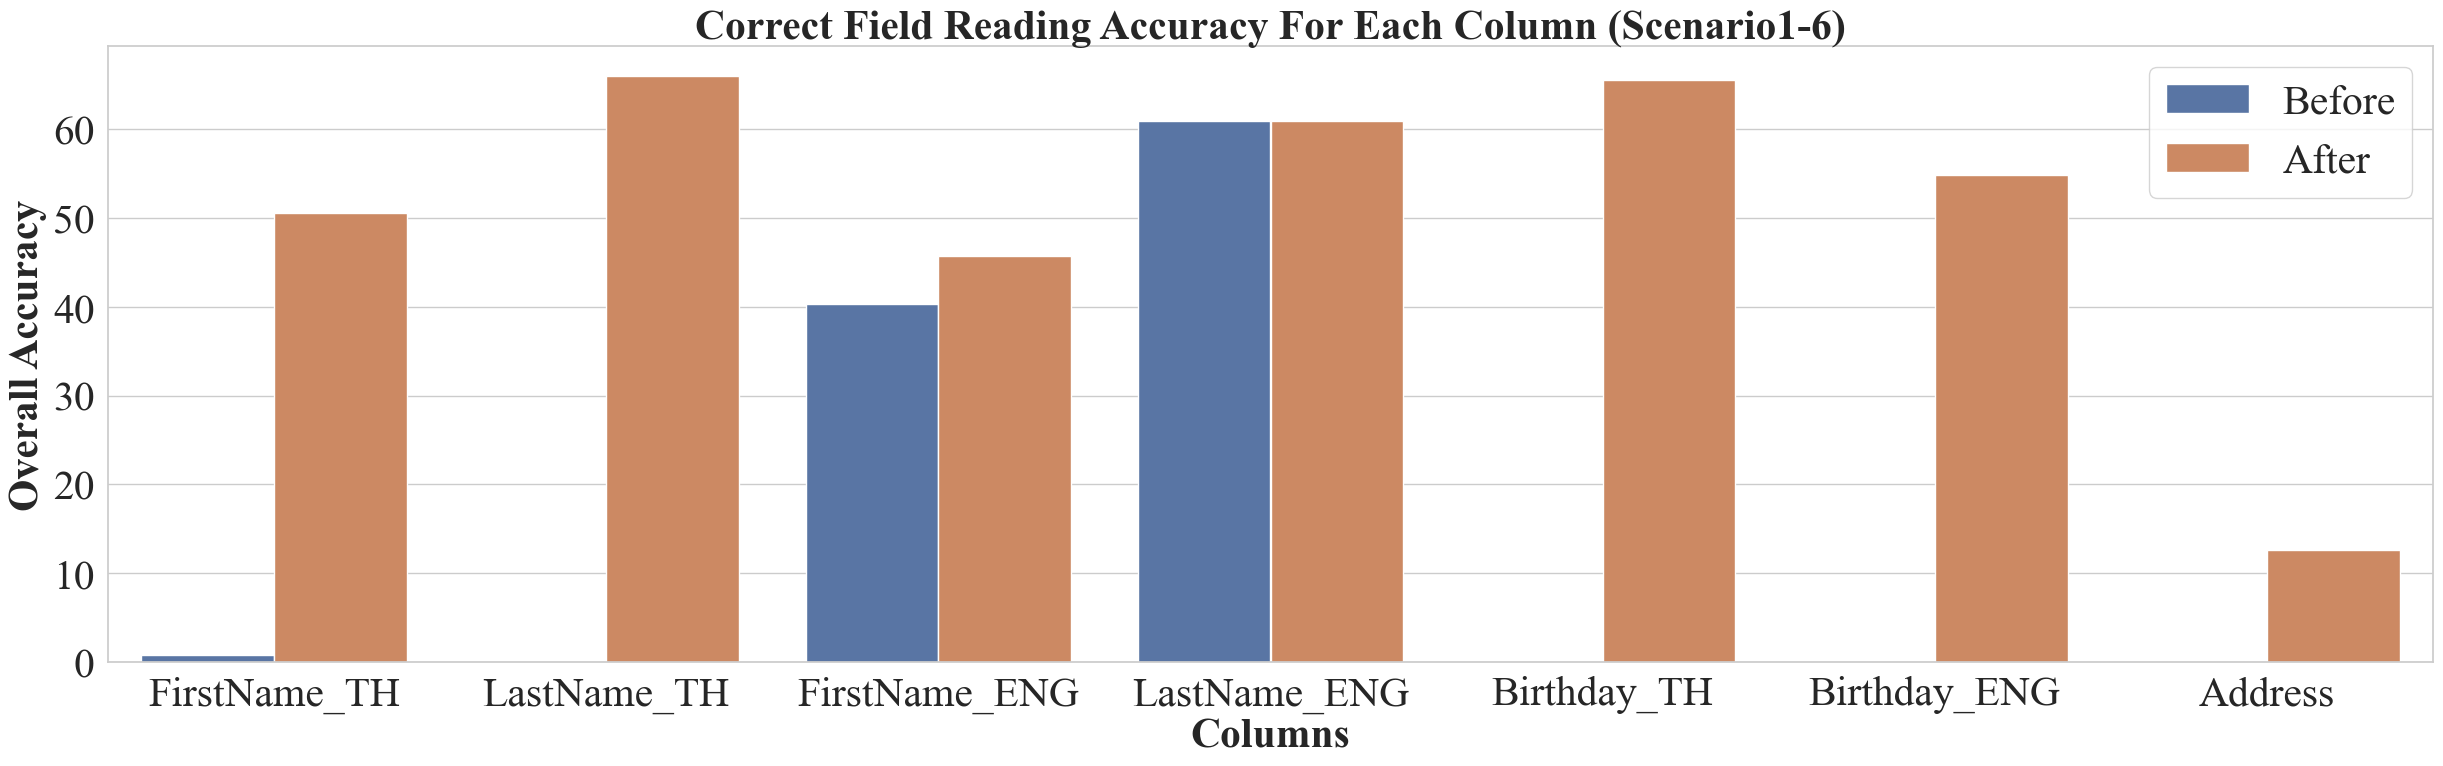

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Set the font family to Times New Roman
mpl.rc('font', family='Times New Roman')

# Read the overall averages from the Excel files
overall_average_df_before = pd.read_excel('Overall_Averages_Counts_scenario1-6.xlsx')
overall_average_df_after = pd.read_excel('(After)Overall_Averages_Counts_scenario1-6.xlsx')

# Combine the "Before" and "After" dataframes for plotting
combined_df = pd.concat([overall_average_df_before.assign(dataset='Before'),
                        overall_average_df_after.assign(dataset='After')])

# Set the style
sns.set(style="whitegrid")

# Plot the combined bar graph using Seaborn
plt.figure(figsize=(30, 8))
sns.barplot(x='Column', y='Percent', hue='dataset', data=combined_df, palette='deep')

# Set labels and title with increased font size
plt.ylabel('Overall Accuracy', fontsize=30, fontweight='bold', fontfamily='Times New Roman')
plt.xlabel('Columns', fontsize=30, fontweight='bold', fontfamily='Times New Roman')
plt.title('Correct Field Reading Accuracy For Each Column (Scenario1-6)', fontsize=30, fontweight='bold', fontfamily='Times New Roman')

plt.xticks(fontsize=30, fontfamily='Times New Roman')
plt.yticks(fontsize=30, fontfamily='Times New Roman')

# Add legend with increased font size
legend = plt.legend(fontsize=30, loc='upper right')
legend.get_title().set_fontfamily('Times New Roman')  # Set font family for legend title
for text in legend.texts:  # Set font family for legend items
    text.set_fontfamily('Times New Roman')

# Save the plot with a larger font size
plt.savefig('Overall Accuracy for each Column (Scenario1-6).png', dpi=300)

# Show the plot
plt.show()


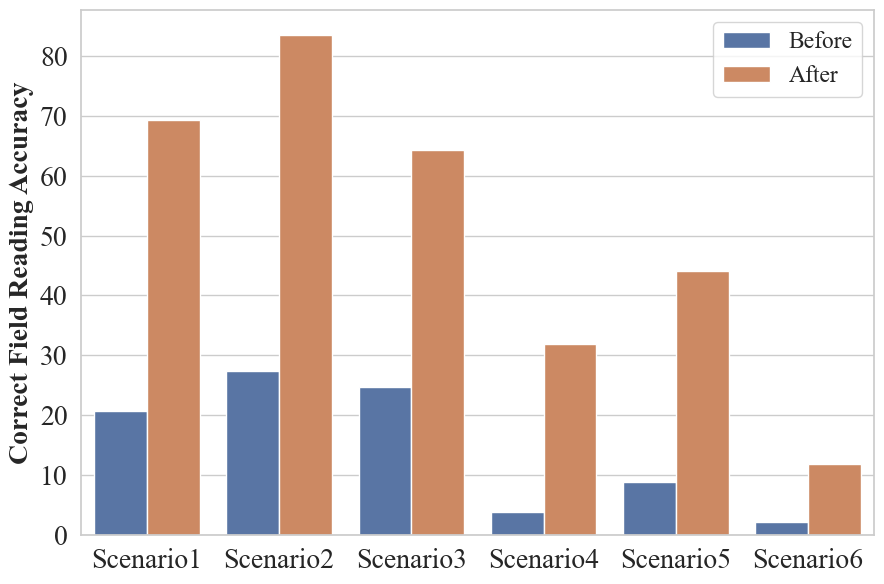

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('font', family='Times New Roman')
# Load data from Excel
df1 = pd.read_excel('Accuracy.xlsx')
df2 = pd.read_excel('(After)Accuracy.xlsx')

# Combine the dataframes
df1['Dataset'] = 'Before'
df2['Dataset'] = 'After'
combined_df = pd.concat([df1, df2])

# Create the plot using seaborn
plt.figure(figsize=(9, 6))
sns.barplot(data=combined_df, x='Scenario', y='Overall_Accuracy', hue='Dataset', palette='deep')
plt.xlabel('')
plt.ylabel('Correct Field Reading Accuracy', fontsize=20, fontweight='bold')
# plt.title('Overall Accuracy for each Scenario')
plt.xticks(fontsize=20, fontfamily='Times New Roman')
plt.yticks(fontsize=20, fontfamily='Times New Roman')
plt.xticks(rotation=0)
legend = plt.legend(fontsize=17, loc='upper right')
plt.tight_layout()
plt.savefig('Overall Accuracy for each Scenario.png')
plt.show()

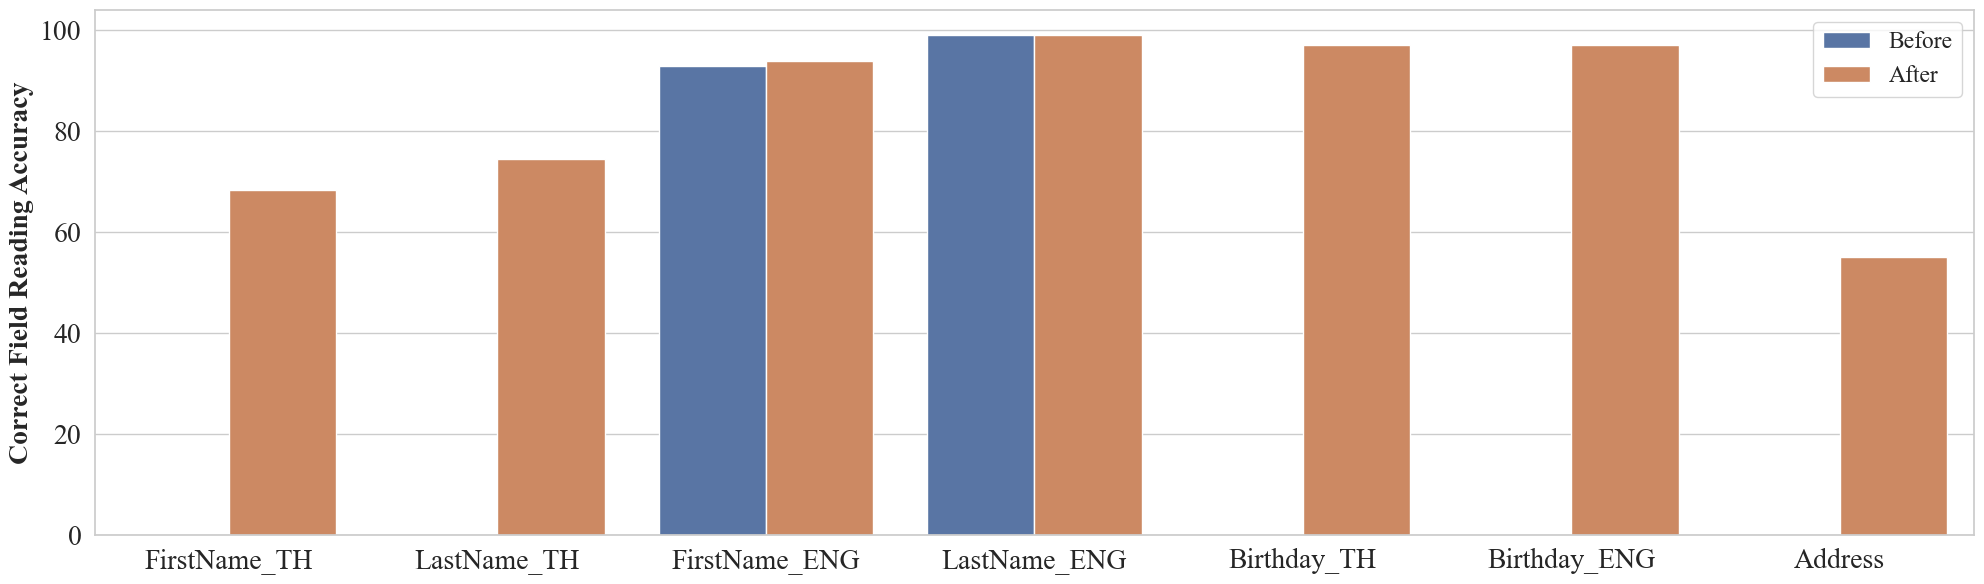

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('font', family='Times New Roman')
# Load data from Excel
filename = f'(Overall)Accuracy2.xlsx'
df = pd.read_excel(filename)

# Melt the DataFrame to combine (Before)Overall Accuracy and (After)Overall Accuracy into a single column
df_melted = df.melt(id_vars=['Column'], value_vars=['Before', 'After'],
                    var_name='Accuracy Type', value_name='Overall Accuracy')

# Create a figure to hold the combined plot
plt.figure(figsize=(20, 6))

# Plot the combined bar graph
sns.barplot(x='Column', y='Overall Accuracy', hue='Accuracy Type', data=df_melted, palette='deep')
# plt.title(f'Overall Accuracy For Each Column (Scenario2)')
plt.xlabel('')
plt.ylabel('Correct Field Reading Accuracy', fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontfamily='Times New Roman')
plt.yticks(fontsize=20, fontfamily='Times New Roman')
legend = plt.legend(fontsize=17, loc='upper right')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('Overall Accuracy for each Scenario2.png')
plt.show()

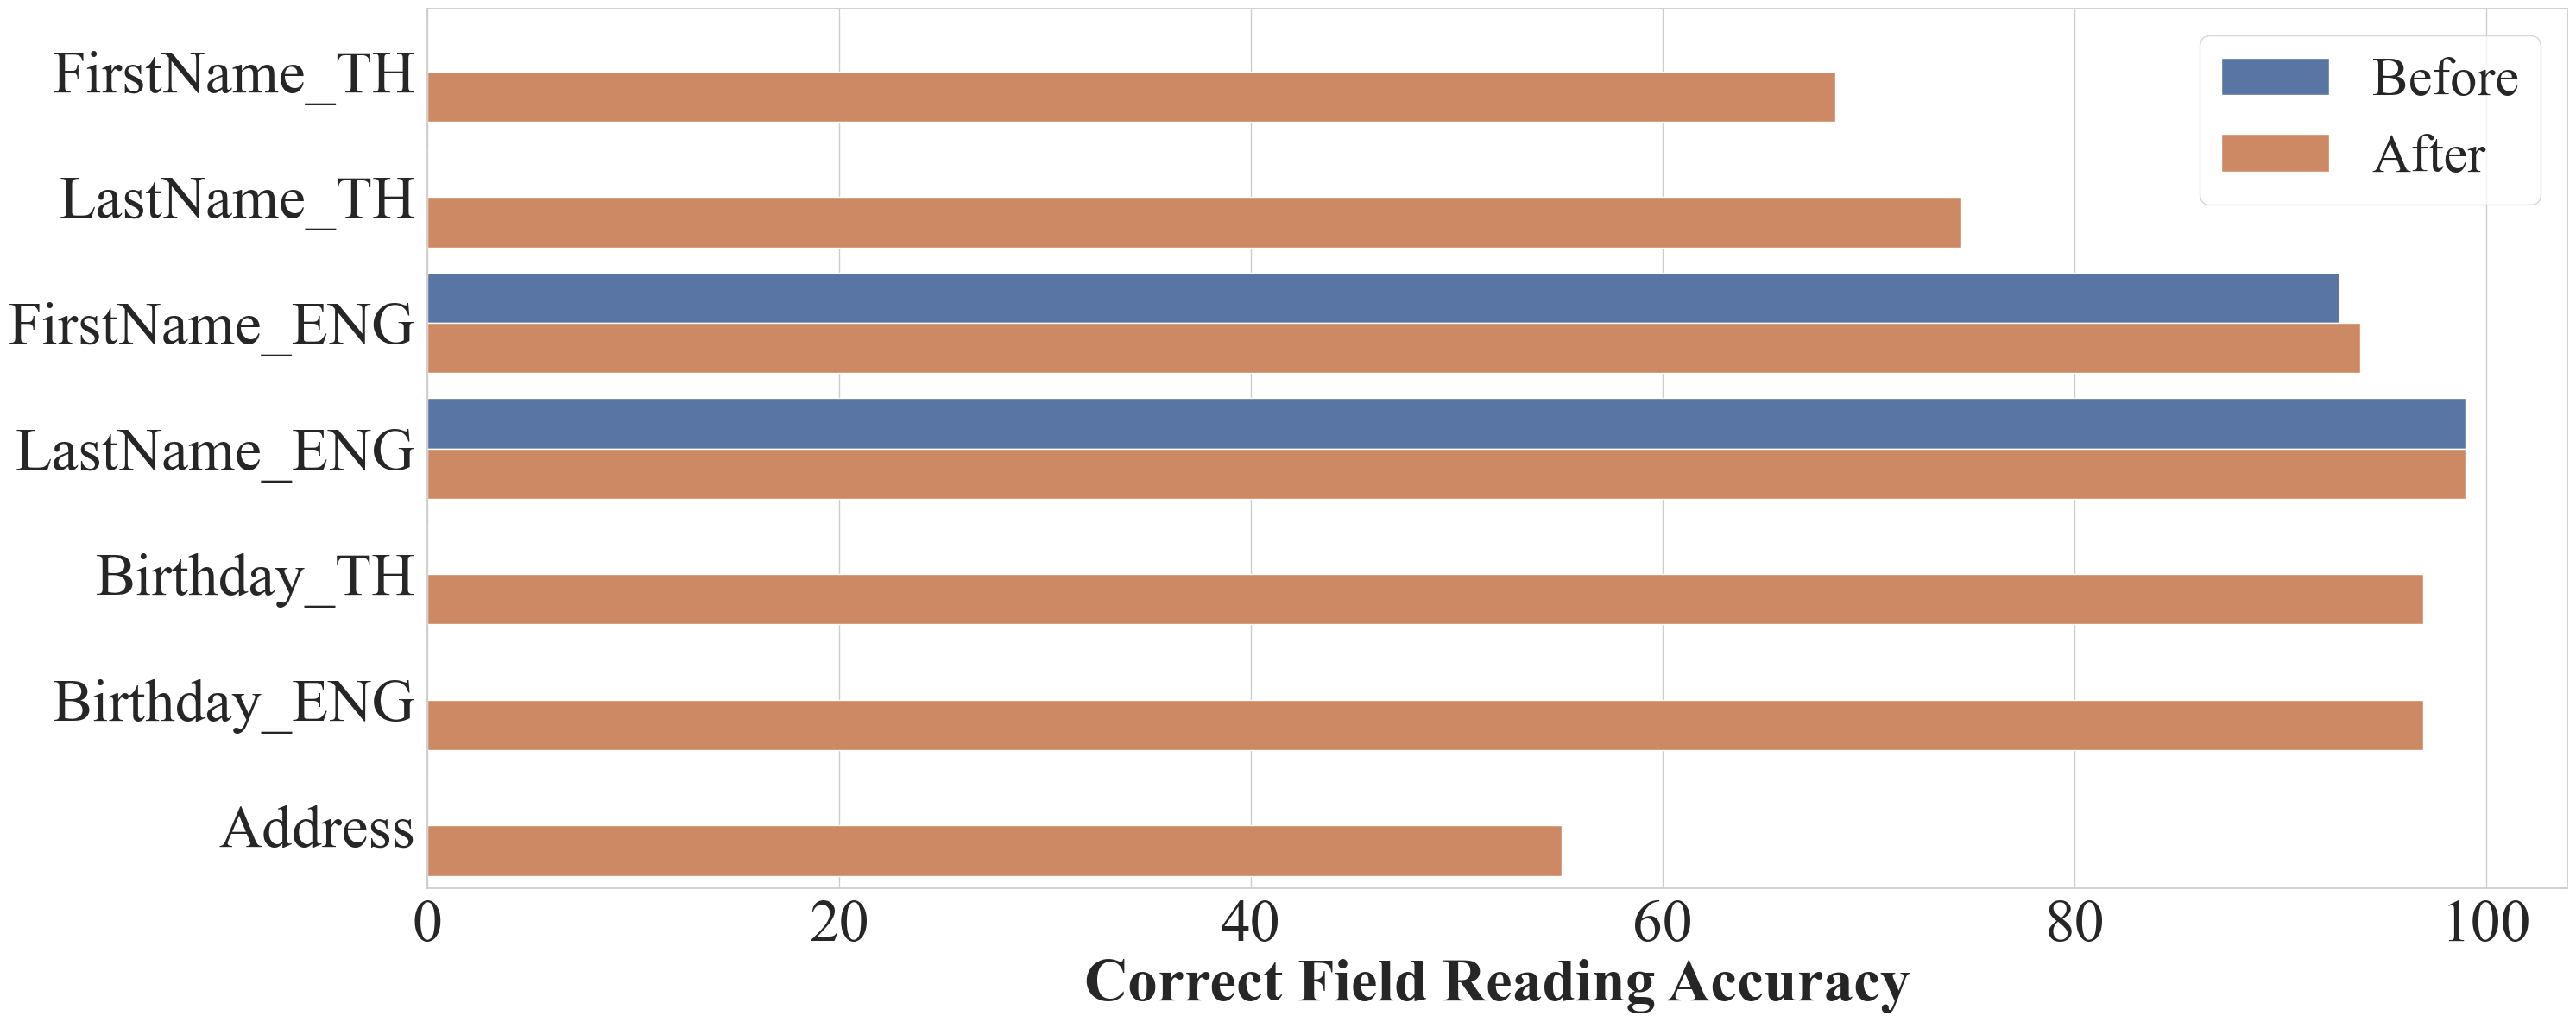

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('font', family='Times New Roman')
# Load data from Excel
filename = f'(Overall)Accuracy2.xlsx'
df = pd.read_excel(filename)

# Melt the DataFrame to combine (Before)Overall Accuracy and (After)Overall Accuracy into a single column
df_melted = df.melt(id_vars=['Column'], value_vars=['Before', 'After'],
                    var_name='Accuracy Type', value_name='Overall Accuracy')

# Create a figure to hold the combined plot
plt.figure(figsize=(30, 12))  # Adjust the figsize for a horizontal layout

# Plot the horizontal bar graph
sns.barplot(y='Column', x='Overall Accuracy', hue='Accuracy Type', data=df_melted, palette='deep', orient='h')
plt.ylabel('')
plt.xlabel('Correct Field Reading Accuracy', fontsize=50, fontweight='bold')
plt.xticks(fontsize=50, fontfamily='Times New Roman')
plt.yticks(fontsize=50, fontfamily='Times New Roman')
legend = plt.legend(fontsize=45, loc='upper right')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('Overall Accuracy for each Scenario2_horizontal.png')  # Save as a horizontal plot
plt.show()


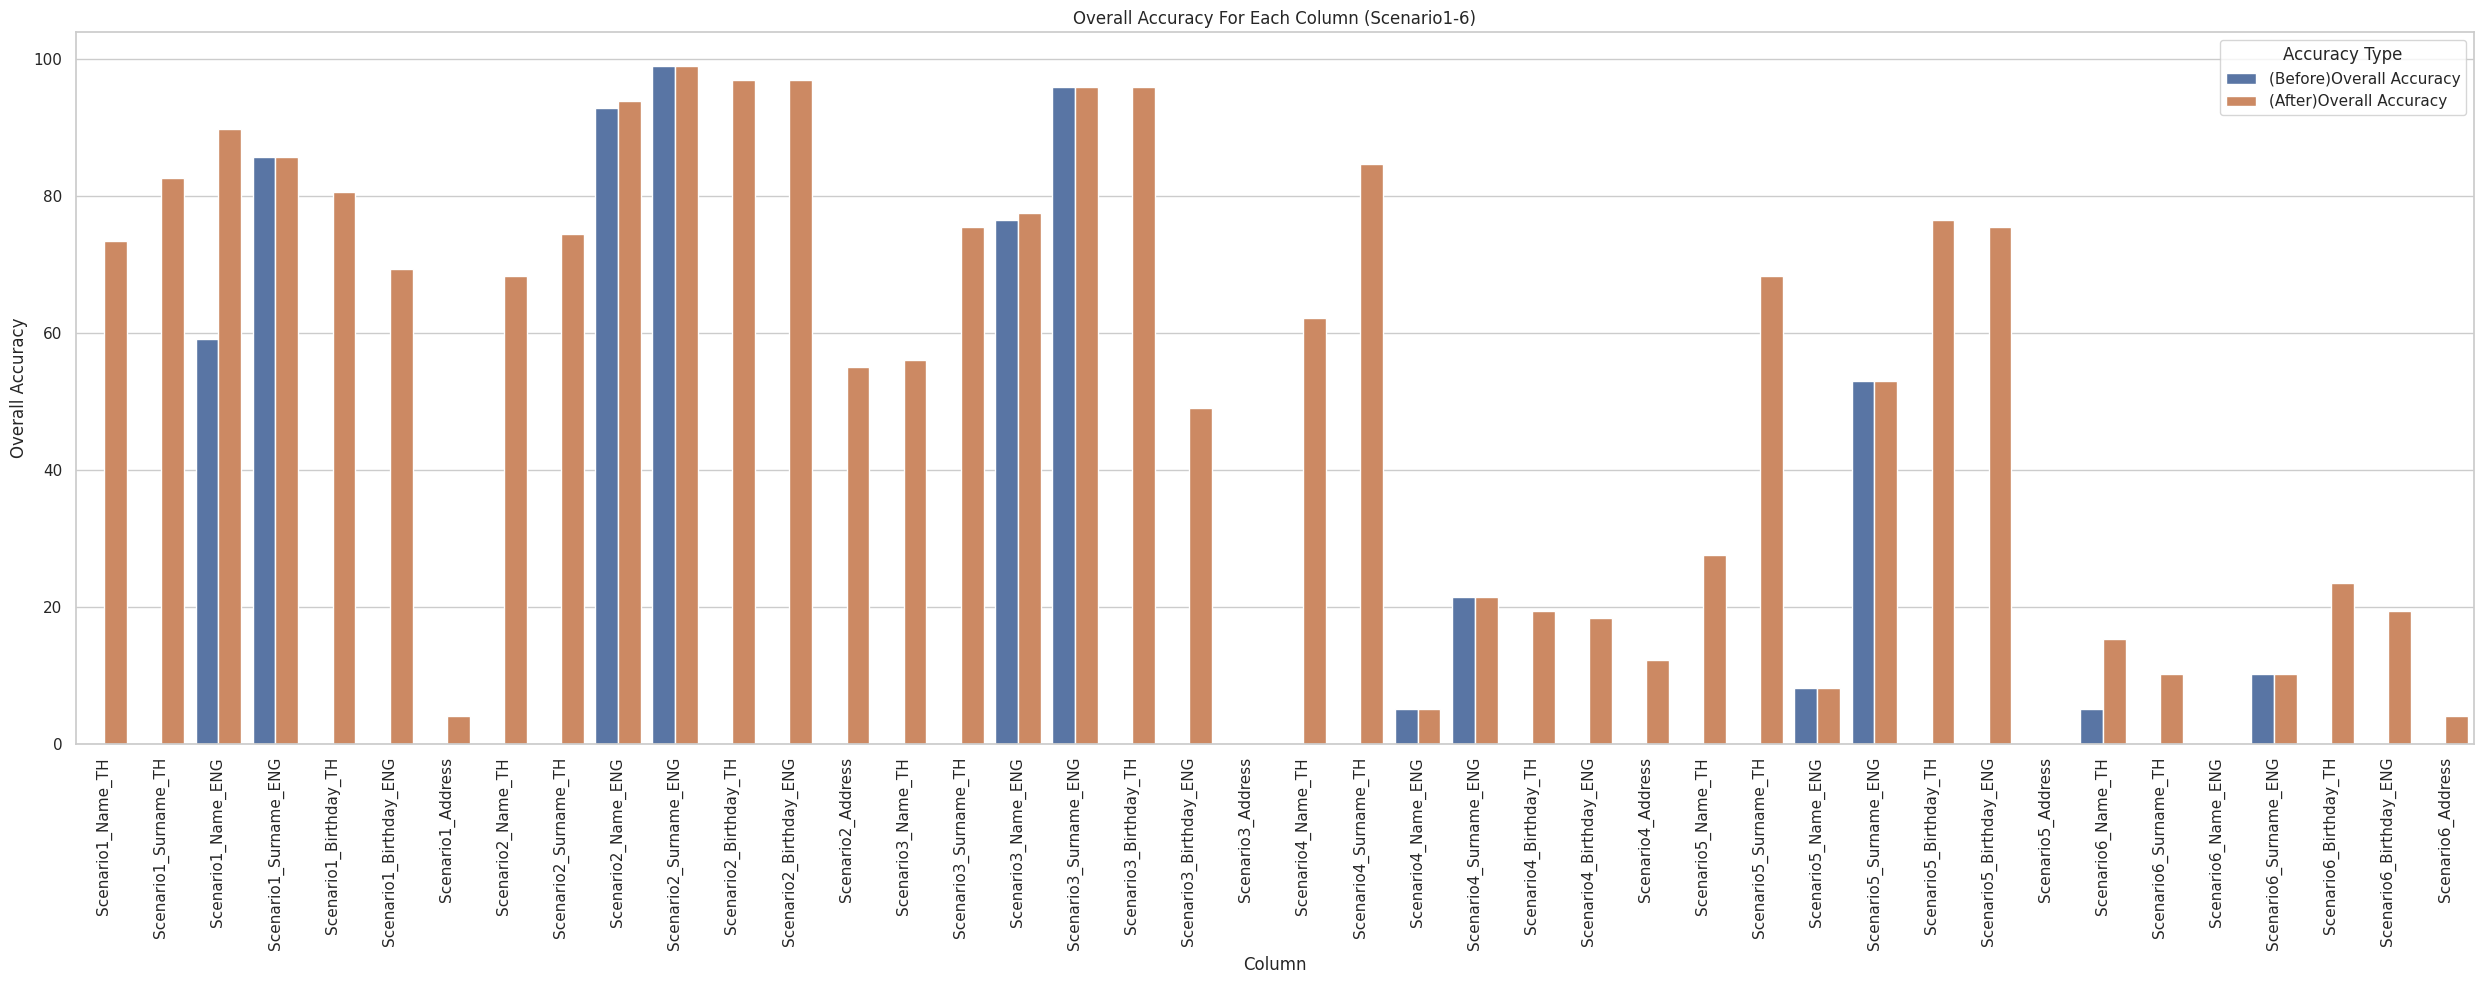

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load data from Excel
filename = f'(Overall)Accuracy1-6.xlsx'
df = pd.read_excel(filename)

# Melt the DataFrame to combine (Before)Overall Accuracy and (After)Overall Accuracy into a single column
df_melted = df.melt(id_vars=['Column'], value_vars=['(Before)Overall Accuracy', '(After)Overall Accuracy'],
                    var_name='Accuracy Type', value_name='Overall Accuracy')

# Create a figure to hold the combined plot
plt.figure(figsize=(25, 10))

# Plot the combined bar graph
sns.barplot(x='Column', y='Overall Accuracy', hue='Accuracy Type', data=df_melted, palette='deep')
plt.title(f'Overall Accuracy For Each Column (Scenario1-6)')
plt.xlabel('Column')
plt.ylabel('Overall Accuracy')
plt.legend(title='Accuracy Type')
plt.xticks(rotation=90)

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('(Overall)Accuracy1-6.png')
plt.show()

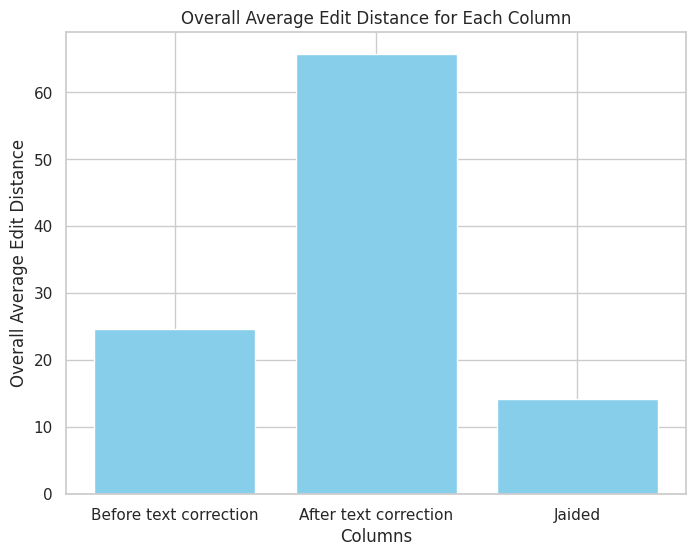

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the overall averages from the Excel file
overall_average_df = pd.read_excel('Compare_Result_Realimage.xlsx')

# Plot a bar graph
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(overall_average_df['Scenario'], overall_average_df['Overall accuracy'], color='skyblue')
ax.set_ylabel('Overall Average Edit Distance')
ax.set_xlabel('Columns')
ax.set_title('Overall Average Edit Distance for Each Column')

plt.show()